<a href="https://colab.research.google.com/github/Rakib911Hossan/Al_Project/blob/main/ML_Lab_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **1. Import Libraries**

Import the required libraries for data manipulation, visualization, preprocessing, and model building.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

### **2. Download and Load the Dataset**

Download the `train.xl` and `test.xl` from the [zenodo](https://zenodo.org/records/45735) dataset. Load the training and test datasets into pandas DataFrames. Display the first few rows of the training dataset and print the list of columns present in the dataset.

**Note:** Make sure the path is correct while loading the dataset


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!ls /content/drive/MyDrive/ML/train.xlsx

Mounted at /content/drive
/content/drive/MyDrive/ML/train.xlsx


In [ ]:
# Load the datasets
train_df = pd.read_excel('/content/drive/MyDrive/ML/train.xlsx')
test_df = pd.read_excel('/content/drive/MyDrive/ML/test.xlsx')

print("Original Training Data Shape:", train_df.shape)
print("Original Test Data Shape:", test_df.shape)

### 3.1 Drop Unnecessary Columns

# Drop 'Unnamed: 0' from both datasets if it exists
if 'Unnamed: 0' in train_df.columns:
    train_df = train_df.drop('Unnamed: 0', axis=1)
    print("\nDropped 'Unnamed: 0' from training dataset")

if 'Unnamed: 0' in test_df.columns:
    test_df = test_df.drop('Unnamed: 0', axis=1)
    print("Dropped 'Unnamed: 0' from test dataset")

# Drop columns from training dataset that are not in test dataset
columns_to_drop_train = ['DOJ', 'DOL', 'Designation', 'JobCity']
train_df = train_df.drop(columns=columns_to_drop_train, axis=1)
print(f"\nDropped {columns_to_drop_train} from training dataset")

# Drop 'Salary' column from test dataset (contains only '?')
if 'Salary' in test_df.columns:
    test_df = test_df.drop('Salary', axis=1)
    print("Dropped 'Salary' from test dataset")

print("\nCleaned Training Data Shape:", train_df.shape)
print("Cleaned Test Data Shape:", test_df.shape)

# Display first few rows to verify
print("\nTraining Dataset (first 3 rows):")
print(train_df.head(3))
print("\nTest Dataset (first 3 rows):")
print(test_df.head(3))

# Check column alignment
print("\nTraining columns:", train_df.columns.tolist())
print("\nTest columns:", test_df.columns.tolist())

# Verify both datasets have the same columns (except Salary in train)
train_cols_without_salary = [col for col in train_df.columns if col != 'Salary']
test_cols = test_df.columns.tolist()
print("\nColumns match (excluding Salary):", set(train_cols_without_salary) == set(test_cols))

Original Training Data Shape: (3998, 39)
Original Test Data Shape: (1500, 39)

Dropped 'Unnamed: 0' from training dataset
Dropped 'Unnamed: 0' from test dataset

Dropped ['DOJ', 'DOL', 'Designation', 'JobCity'] from training dataset
Dropped 'Salary' from test dataset

Cleaned Training Data Shape: (3998, 34)
Cleaned Test Data Shape: (1500, 37)

Training Dataset (first 3 rows):
       ID  Salary Gender        DOB  10percentage  \
0  203097  420000      f 1990-02-19          84.3   
1  579905  500000      m 1989-10-04          85.4   
2  810601  325000      f 1992-08-03          85.0   

                          10board  12graduation  12percentage  \
0  board ofsecondary education,ap          2007          95.8   
1                            cbse          2007          85.0   
2                            cbse          2010          68.2   

                              12board  CollegeID  ...  ComputerScience  \
0  board of intermediate education,ap       1141  ...               -1   

In [ ]:
### 3.2 Remove Non-Predictive Columns

# Define columns to drop (non-predictive features)
non_predictive_columns = [
    '10board',
    '12board',
    'CollegeID',
    'CollegeTier',
    'CollegeCityID',
    'CollegeCityTier',
    'CollegeState'
]

# Drop from training dataset
train_df = train_df.drop(columns=non_predictive_columns, axis=1)
print(f"Dropped non-predictive columns from training dataset: {non_predictive_columns}")

# Drop from test dataset
test_df = test_df.drop(columns=non_predictive_columns, axis=1)
print(f"Dropped non-predictive columns from test dataset: {non_predictive_columns}")

print("\nTraining Data Shape after removing non-predictive columns:", train_df.shape)
print("Test Data Shape after removing non-predictive columns:", test_df.shape)

# Display remaining columns
print("\nRemaining columns in training dataset:")
print(train_df.columns.tolist())

print("\nRemaining columns in test dataset:")
print(test_df.columns.tolist())

# Display summary statistics
print("\nTraining Dataset Info:")
print(train_df.info())

print("\nFirst few rows of cleaned training data:")
print(train_df.head())

print("\nFirst few rows of cleaned test data:")
print(test_df.head())

Dropped non-predictive columns from training dataset: ['10board', '12board', 'CollegeID', 'CollegeTier', 'CollegeCityID', 'CollegeCityTier', 'CollegeState']
Dropped non-predictive columns from test dataset: ['10board', '12board', 'CollegeID', 'CollegeTier', 'CollegeCityID', 'CollegeCityTier', 'CollegeState']

Training Data Shape after removing non-predictive columns: (3998, 27)
Test Data Shape after removing non-predictive columns: (1500, 30)

Remaining columns in training dataset:
['ID', 'Salary', 'Gender', 'DOB', '10percentage', '12graduation', '12percentage', 'Degree', 'Specialization', 'collegeGPA', 'GraduationYear', 'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience']

Remaining columns in test dataset:
['ID', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB', '10pe

In [ ]:
### 3.3 Set Index

# Set 'ID' as the index for training dataset
train_df = train_df.set_index('ID')
print("Set 'ID' as index for training dataset")

# Set 'ID' as the index for test dataset
test_df = test_df.set_index('ID')
print("Set 'ID' as index for test dataset")

print("\nTraining Data Shape:", train_df.shape)
print("Test Data Shape:", test_df.shape)

# Display the datasets with new index
print("\nTraining Dataset (first 5 rows):")
print(train_df.head())

print("\nTest Dataset (first 5 rows):")
print(test_df.head())

# Verify that ID is now the index
print("\nTraining dataset index name:", train_df.index.name)
print("Test dataset index name:", test_df.index.name)

# Check for duplicate IDs (should be 0)
print("\nDuplicate IDs in training dataset:", train_df.index.duplicated().sum())
print("Duplicate IDs in test dataset:", test_df.index.duplicated().sum())

Set 'ID' as index for training dataset
Set 'ID' as index for test dataset

Training Data Shape: (3998, 26)
Test Data Shape: (1500, 29)

Training Dataset (first 5 rows):
         Salary Gender        DOB  10percentage  12graduation  12percentage  \
ID                                                                            
203097   420000      f 1990-02-19          84.3          2007          95.8   
579905   500000      m 1989-10-04          85.4          2007          85.0   
810601   325000      f 1992-08-03          85.0          2010          68.2   
267447  1100000      m 1989-12-05          85.6          2007          83.6   
343523   200000      m 1991-02-27          78.0          2008          76.8   

             Degree                             Specialization  collegeGPA  \
ID                                                                           
203097  B.Tech/B.E.                       computer engineering       78.00   
579905  B.Tech/B.E.  electronics and commun

In [ ]:
### 3.4 Handle Missing Values

# First, let's check the current state of the data
print("Initial Data Summary:")
print("\nTraining dataset shape:", train_df.shape)
print("Test dataset shape:", test_df.shape)

# Check for invalid values in GraduationYear
print("\nGraduationYear - Count of 0 values in training:", (train_df['GraduationYear'] == 0).sum())
print("GraduationYear - Count of 0 values in test:", (test_df['GraduationYear'] == 0).sum())

# Check for -1 values in domain-related columns
domain_columns = ['Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
                  'ComputerScience', 'MechanicalEngg', 'ElectricalEngg',
                  'TelecomEngg', 'CivilEngg']

print("\nCount of -1 values in domain-related columns (Training):")
for col in domain_columns:
    if col in train_df.columns:
        print(f"{col}: {(train_df[col] == -1).sum()}")

print("\nCount of -1 values in domain-related columns (Test):")
for col in domain_columns:
    if col in test_df.columns:
        print(f"{col}: {(test_df[col] == -1).sum()}")

# ---- Step 1: Handle GraduationYear (Replace 0 with mode) ----
print("\n" + "="*60)
print("Step 1: Handling GraduationYear")
print("="*60)

# Replace 0 with NaN for imputation
train_df['GraduationYear'] = train_df['GraduationYear'].replace(0, np.nan)
test_df['GraduationYear'] = test_df['GraduationYear'].replace(0, np.nan)

# Use SimpleImputer with mode strategy
imputer_mode = SimpleImputer(strategy='most_frequent')

# Fit and transform on training data
train_df['GraduationYear'] = imputer_mode.fit_transform(train_df[['GraduationYear']]).ravel()

# Transform test data using the same imputer
test_df['GraduationYear'] = imputer_mode.transform(test_df[['GraduationYear']]).ravel()

print(f"Replaced 0 values in GraduationYear with mode: {imputer_mode.statistics_[0]}")
print(f"Remaining 0 values in training GraduationYear: {(train_df['GraduationYear'] == 0).sum()}")
print(f"Remaining 0 values in test GraduationYear: {(test_df['GraduationYear'] == 0).sum()}")

# ---- Step 2: Drop domain-related columns (keep only Domain) ----
print("\n" + "="*60)
print("Step 2: Dropping domain-related columns")
print("="*60)

columns_to_drop = ['ComputerProgramming', 'ElectronicsAndSemicon',
                   'ComputerScience', 'MechanicalEngg', 'ElectricalEngg',
                   'TelecomEngg', 'CivilEngg']

train_df = train_df.drop(columns=columns_to_drop, axis=1)
test_df = test_df.drop(columns=columns_to_drop, axis=1)

print(f"Dropped columns: {columns_to_drop}")
print(f"Training shape after dropping: {train_df.shape}")
print(f"Test shape after dropping: {test_df.shape}")

# ---- Step 3: Handle -1 values in Domain column ----
print("\n" + "="*60)
print("Step 3: Handling -1 values in Domain column")
print("="*60)

print(f"\nCount of -1 values in Domain (Training): {(train_df['Domain'] == -1).sum()}")
print(f"Count of -1 values in Domain (Test): {(test_df['Domain'] == -1).sum()}")

# Method 1: Replace -1 with median (recommended for this case)
# Replace -1 with NaN
train_df['Domain'] = train_df['Domain'].replace(-1, np.nan)
test_df['Domain'] = test_df['Domain'].replace(-1, np.nan)

# Use SimpleImputer with median strategy
imputer_median = SimpleImputer(strategy='median')

# Fit and transform on training data
train_df['Domain'] = imputer_median.fit_transform(train_df[['Domain']]).ravel()

# Transform test data using the same imputer
test_df['Domain'] = imputer_median.transform(test_df[['Domain']]).ravel()

print(f"Replaced -1 values in Domain with median: {imputer_median.statistics_[0]:.4f}")
print(f"Remaining -1 values in training Domain: {(train_df['Domain'] == -1).sum()}")
print(f"Remaining -1 values in test Domain: {(test_df['Domain'] == -1).sum()}")

# ---- Final Summary ----
print("\n" + "="*60)
print("Final Data Summary")
print("="*60)

print(f"\nTraining dataset shape: {train_df.shape}")
print(f"Test dataset shape: {test_df.shape}")

print("\nTraining dataset columns:")
print(train_df.columns.tolist())

print("\nTraining dataset info:")
print(train_df.info())

print("\nTraining dataset - First 5 rows:")
print(train_df.head())

print("\nTest dataset - First 5 rows:")
print(test_df.head())

# Check for any remaining missing values
print("\nMissing values in training dataset:")
print(train_df.isnull().sum())

print("\nMissing values in test dataset:")
print(test_df.isnull().sum())

Initial Data Summary:

Training dataset shape: (3998, 26)
Test dataset shape: (1500, 29)

GraduationYear - Count of 0 values in training: 1
GraduationYear - Count of 0 values in test: 0

Count of -1 values in domain-related columns (Training):
Domain: 246
ComputerProgramming: 868
ElectronicsAndSemicon: 2854
ComputerScience: 3096
MechanicalEngg: 3763
ElectricalEngg: 3837
TelecomEngg: 3624
CivilEngg: 3956

Count of -1 values in domain-related columns (Test):
Domain: 86
ComputerProgramming: 312
ElectronicsAndSemicon: 1070
ComputerScience: 1182
MechanicalEngg: 1414
ElectricalEngg: 1428
TelecomEngg: 1344
CivilEngg: 1479

Step 1: Handling GraduationYear
Replaced 0 values in GraduationYear with mode: 2013.0
Remaining 0 values in training GraduationYear: 0
Remaining 0 values in test GraduationYear: 0

Step 2: Dropping domain-related columns
Dropped columns: ['ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg']
Traini

Step 1: Extract Birth Year from DOB

Sample DOB values (Training):
ID
203097   1990-02-19
579905   1989-10-04
810601   1992-08-03
267447   1989-12-05
343523   1991-02-27
Name: DOB, dtype: datetime64[ns]

DOB data type: datetime64[ns]

BirthYear created successfully
Training - BirthYear range: 1977 to 1997
Test - BirthYear range: 1984 to 1995

Dropped DOB column from both datasets

Step 2: Calculate Age at 12th Graduation and College Graduation

12GradAge (Age at High School graduation) created
Training - 12GradAge range: 13 to 25
Training - 12GradAge mean: 17.66

GradAge (Age at College graduation) created
Training - GradAge range: 17.0 to 34.0
Training - GradAge mean: 22.18

Checking for Anomalies

Training - Unusual 12GradAge values (< 15 or > 25):
  Count < 15: 2
  Count > 25: 0

Training - Unusual GradAge values (< 18 or > 30):
  Count < 18: 1
  Count > 30: 1

Step 3: Drop Original Year Columns
Dropped columns: ['BirthYear', '12graduation', 'GraduationYear']

Final Summary

Trainin

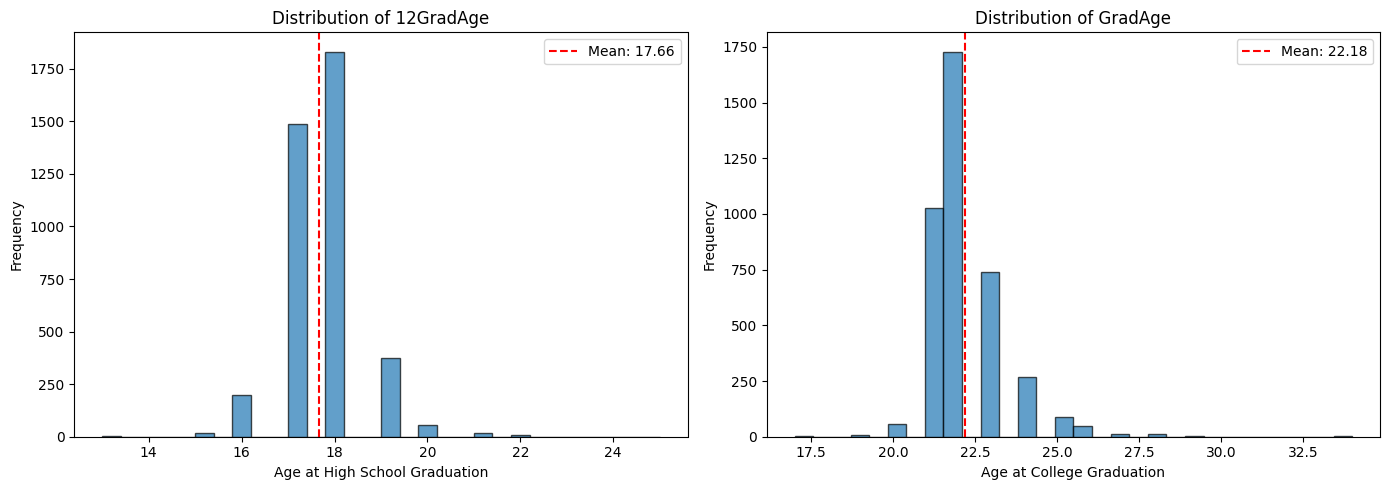


Correlation of new features with Salary:
12GradAge correlation: 0.0015
GradAge correlation: -0.0095


In [ ]:
### 3.5 Derive New Features

print("="*60)
print("Step 1: Extract Birth Year from DOB")
print("="*60)

# Check the current DOB column
print("\nSample DOB values (Training):")
print(train_df['DOB'].head())
print("\nDOB data type:", train_df['DOB'].dtype)

# Convert DOB to datetime if it's not already
train_df['DOB'] = pd.to_datetime(train_df['DOB'], errors='coerce')
test_df['DOB'] = pd.to_datetime(test_df['DOB'], errors='coerce')

# Extract year from DOB to create BirthYear column
train_df['BirthYear'] = train_df['DOB'].dt.year
test_df['BirthYear'] = test_df['DOB'].dt.year

print("\nBirthYear created successfully")
print(f"Training - BirthYear range: {train_df['BirthYear'].min()} to {train_df['BirthYear'].max()}")
print(f"Test - BirthYear range: {test_df['BirthYear'].min()} to {test_df['BirthYear'].max()}")

# Drop DOB column
train_df = train_df.drop('DOB', axis=1)
test_df = test_df.drop('DOB', axis=1)
print("\nDropped DOB column from both datasets")

print("\n" + "="*60)
print("Step 2: Calculate Age at 12th Graduation and College Graduation")
print("="*60)

# Calculate 12GradAge (Age when graduated from High School)
# 12GradAge = 12graduation - BirthYear
train_df['12GradAge'] = train_df['12graduation'] - train_df['BirthYear']
test_df['12GradAge'] = test_df['12graduation'] - test_df['BirthYear']

print("\n12GradAge (Age at High School graduation) created")
print(f"Training - 12GradAge range: {train_df['12GradAge'].min()} to {train_df['12GradAge'].max()}")
print(f"Training - 12GradAge mean: {train_df['12GradAge'].mean():.2f}")

# Calculate GradAge (Age when graduated from College)
# GradAge = GraduationYear - BirthYear
train_df['GradAge'] = train_df['GraduationYear'] - train_df['BirthYear']
test_df['GradAge'] = test_df['GraduationYear'] - test_df['BirthYear']

print("\nGradAge (Age at College graduation) created")
print(f"Training - GradAge range: {train_df['GradAge'].min()} to {train_df['GradAge'].max()}")
print(f"Training - GradAge mean: {train_df['GradAge'].mean():.2f}")

# Check for any anomalies in the derived features
print("\n" + "="*60)
print("Checking for Anomalies")
print("="*60)

print(f"\nTraining - Unusual 12GradAge values (< 15 or > 25):")
print(f"  Count < 15: {(train_df['12GradAge'] < 15).sum()}")
print(f"  Count > 25: {(train_df['12GradAge'] > 25).sum()}")

print(f"\nTraining - Unusual GradAge values (< 18 or > 30):")
print(f"  Count < 18: {(train_df['GradAge'] < 18).sum()}")
print(f"  Count > 30: {(train_df['GradAge'] > 30).sum()}")

print("\n" + "="*60)
print("Step 3: Drop Original Year Columns")
print("="*60)

# Drop BirthYear, 12graduation, and GraduationYear columns
columns_to_drop = ['BirthYear', '12graduation', 'GraduationYear']

train_df = train_df.drop(columns=columns_to_drop, axis=1)
test_df = test_df.drop(columns=columns_to_drop, axis=1)

print(f"Dropped columns: {columns_to_drop}")

print("\n" + "="*60)
print("Final Summary")
print("="*60)

print(f"\nTraining dataset shape: {train_df.shape}")
print(f"Test dataset shape: {test_df.shape}")

print("\nRemaining columns in training dataset:")
print(train_df.columns.tolist())

print("\nTraining dataset - First 5 rows:")
print(train_df.head())

print("\nTest dataset - First 5 rows:")
print(test_df.head())

print("\nTraining dataset statistics for new features:")
print(train_df[['12GradAge', 'GradAge']].describe())

print("\nTest dataset statistics for new features:")
print(test_df[['12GradAge', 'GradAge']].describe())

# Visualize the distribution of new features
print("\n" + "="*60)
print("Visualizing New Features")
print("="*60)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 12GradAge distribution
axes[0].hist(train_df['12GradAge'], bins=30, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Age at High School Graduation')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of 12GradAge')
axes[0].axvline(train_df['12GradAge'].mean(), color='red', linestyle='--',
                label=f'Mean: {train_df["12GradAge"].mean():.2f}')
axes[0].legend()

# Plot GradAge distribution
axes[1].hist(train_df['GradAge'], bins=30, edgecolor='black', alpha=0.7)
axes[1].set_xlabel('Age at College Graduation')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of GradAge')
axes[1].axvline(train_df['GradAge'].mean(), color='red', linestyle='--',
                label=f'Mean: {train_df["GradAge"].mean():.2f}')
axes[1].legend()

plt.tight_layout()
plt.show()

# Correlation with Salary
print("\nCorrelation of new features with Salary:")
print(f"12GradAge correlation: {train_df['12GradAge'].corr(train_df['Salary']):.4f}")
print(f"GradAge correlation: {train_df['GradAge'].corr(train_df['Salary']):.4f}")

Simplifying Specialization Column

Unique Specializations in Training Dataset (Before Mapping):
Count: 46
Specialization
electronics and communication engineering      880
computer science & engineering                 744
information technology                         660
computer engineering                           600
computer application                           244
mechanical engineering                         201
electronics and electrical engineering         196
electronics & telecommunications               121
electrical engineering                          82
electronics & instrumentation eng               32
civil engineering                               29
information science engineering                 27
electronics and instrumentation engineering     27
instrumentation and control engineering         20
electronics engineering                         19
biotechnology                                   15
other                                           13
industrial &

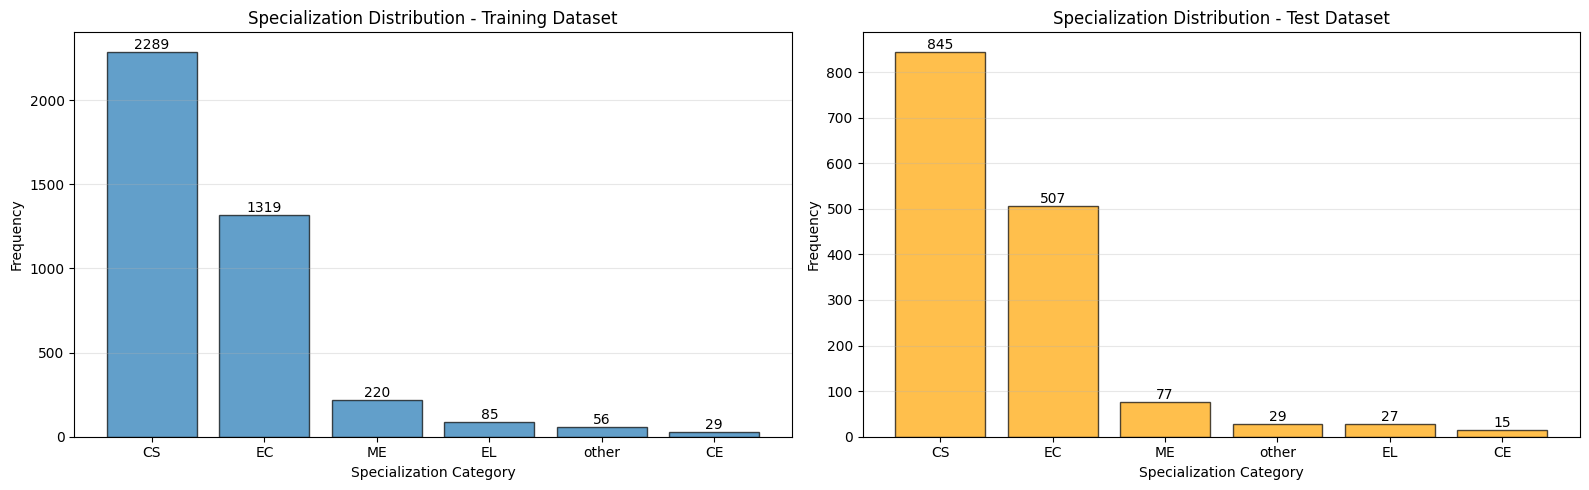


Salary Statistics by Specialization
                         mean    median            std  count
Specialization                                               
CE              381206.896552  320000.0  190528.659132     29
other           317946.428571  317500.0  162941.084684     56
CS              312020.532984  300000.0  226690.839919   2289
ME              310836.363636  267500.0  206893.219200    220
EC              298798.332070  300000.0  189421.430328   1319
EL              289529.411765  265000.0  213651.116823     85


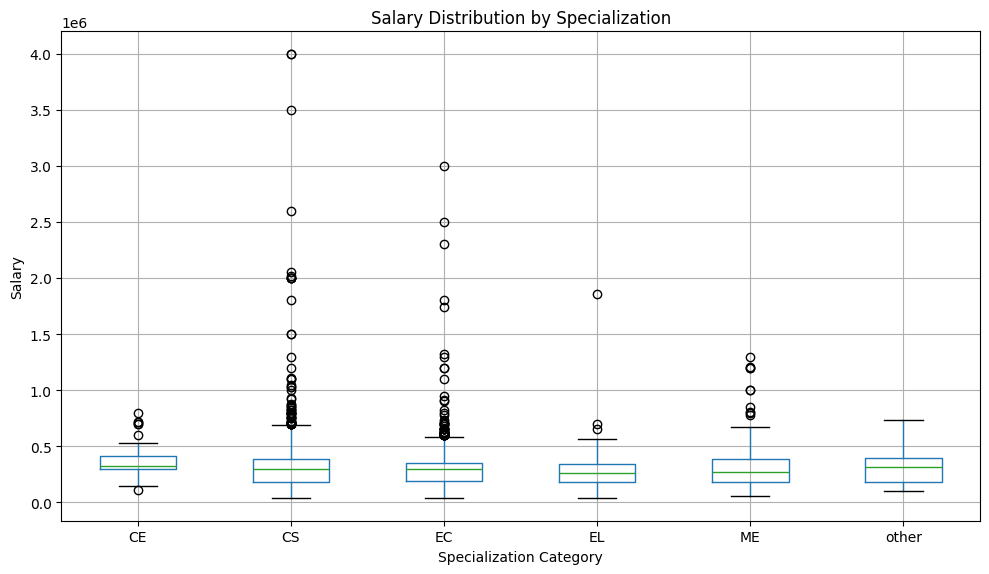


Final Dataset Summary

Training dataset shape: (3998, 18)
Test dataset shape: (1500, 21)

Training dataset - First 5 rows:
         Salary Gender  10percentage  12percentage       Degree  \
ID                                                                
203097   420000      f          84.3          95.8  B.Tech/B.E.   
579905   500000      m          85.4          85.0  B.Tech/B.E.   
810601   325000      f          85.0          68.2  B.Tech/B.E.   
267447  1100000      m          85.6          83.6  B.Tech/B.E.   
343523   200000      m          78.0          76.8  B.Tech/B.E.   

       Specialization  collegeGPA  English  Logical  Quant    Domain  \
ID                                                                     
203097             CS       78.00      515      585    525  0.635979   
579905             EC       70.06      695      610    780  0.960603   
810601             CS       70.00      615      545    370  0.450877   
267447             CS       74.64      635    

In [ ]:
### 3.6 Simplify Categorical Data

print("="*60)
print("Simplifying Specialization Column")
print("="*60)

# Define the specialization mapping dictionary
specialization_map = {
    "electronics and communication engineering": "EC",
    "computer science & engineering": "CS",
    "information technology": "CS",
    "computer engineering": "CS",
    "computer application": "CS",
    "mechanical engineering": "ME",
    "electronics and electrical engineering": "EC",
    "electronics & telecommunications": "EC",
    "electrical engineering": "EL",
    "electronics & instrumentation eng": "EC",
    "civil engineering": "CE",
    "electronics and instrumentation engineering": "EC",
    "information science engineering": "CS",
    "instrumentation and control engineering": "EC",
    "electronics engineering": "EC",
    "biotechnology": "other",
    "other": "other",
    "industrial & production engineering": "other",
    "chemical engineering": "other",
    "applied electronics and instrumentation": "EC",
    "computer science and technology": "CS",
    "telecommunication engineering": "EC",
    "mechanical and automation": "ME",
    "automobile/automotive engineering": "ME",
    "instrumentation engineering": "EC",
    "mechatronics": "ME",
    "electronics and computer engineering": "CS",
    "aeronautical engineering": "ME",
    "computer science": "CS",
    "metallurgical engineering": "other",
    "biomedical engineering": "other",
    "industrial engineering": "other",
    "information & communication technology": "EC",
    "electrical and power engineering": "EL",
    "industrial & management engineering": "other",
    "computer networking": "CS",
    "embedded systems technology": "EC",
    "power systems and automation": "EL",
    "computer and communication engineering": "CS",
    "information science": "CS",
    "internal combustion engine": "ME",
    "ceramic engineering": "other",
    "mechanical & production engineering": "ME",
    "control and instrumentation engineering": "EC",
    "polymer technology": "other",
    "electronics": "EC",
}

# Check unique specializations before mapping
print("\nUnique Specializations in Training Dataset (Before Mapping):")
print(f"Count: {train_df['Specialization'].nunique()}")
print(train_df['Specialization'].value_counts())

print("\nUnique Specializations in Test Dataset (Before Mapping):")
print(f"Count: {test_df['Specialization'].nunique()}")

# Convert to lowercase for consistent mapping
train_df['Specialization'] = train_df['Specialization'].str.lower().str.strip()
test_df['Specialization'] = test_df['Specialization'].str.lower().str.strip()

# Map the specializations to categories
train_df['Specialization'] = train_df['Specialization'].map(specialization_map)
test_df['Specialization'] = test_df['Specialization'].map(specialization_map)

# Check for any unmapped values (will be NaN)
print("\n" + "="*60)
print("Checking for Unmapped Values")
print("="*60)

unmapped_train = train_df['Specialization'].isna().sum()
unmapped_test = test_df['Specialization'].isna().sum()

print(f"\nUnmapped values in Training: {unmapped_train}")
print(f"Unmapped values in Test: {unmapped_test}")

# If there are unmapped values, fill them with 'other'
if unmapped_train > 0:
    train_df['Specialization'] = train_df['Specialization'].fillna('other')
    print("Filled unmapped training values with 'other'")

if unmapped_test > 0:
    test_df['Specialization'] = test_df['Specialization'].fillna('other')
    print("Filled unmapped test values with 'other'")

# Display the simplified categories
print("\n" + "="*60)
print("After Mapping")
print("="*60)

print("\nSpecialization Categories in Training Dataset:")
print(train_df['Specialization'].value_counts())

print("\nSpecialization Categories in Test Dataset:")
print(test_df['Specialization'].value_counts())

print("\nPercentage Distribution in Training:")
print(train_df['Specialization'].value_counts(normalize=True) * 100)

# Visualize the distribution
print("\n" + "="*60)
print("Visualizing Specialization Distribution")
print("="*60)

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Training dataset distribution
train_spec_counts = train_df['Specialization'].value_counts()
axes[0].bar(train_spec_counts.index, train_spec_counts.values, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Specialization Category')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Specialization Distribution - Training Dataset')
axes[0].grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, (cat, count) in enumerate(train_spec_counts.items()):
    axes[0].text(i, count, str(count), ha='center', va='bottom')

# Test dataset distribution
test_spec_counts = test_df['Specialization'].value_counts()
axes[1].bar(test_spec_counts.index, test_spec_counts.values, edgecolor='black', alpha=0.7, color='orange')
axes[1].set_xlabel('Specialization Category')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Specialization Distribution - Test Dataset')
axes[1].grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, (cat, count) in enumerate(test_spec_counts.items()):
    axes[1].text(i, count, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Analyze salary by specialization
print("\n" + "="*60)
print("Salary Statistics by Specialization")
print("="*60)

salary_by_spec = train_df.groupby('Specialization')['Salary'].agg(['mean', 'median', 'std', 'count'])
salary_by_spec = salary_by_spec.sort_values('mean', ascending=False)
print(salary_by_spec)

# Visualize salary by specialization
fig, ax = plt.subplots(figsize=(10, 6))
train_df.boxplot(column='Salary', by='Specialization', ax=ax)
plt.xticks(rotation=0)
plt.xlabel('Specialization Category')
plt.ylabel('Salary')
plt.title('Salary Distribution by Specialization')
plt.suptitle('')  # Remove the default title
plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("Final Dataset Summary")
print("="*60)

print(f"\nTraining dataset shape: {train_df.shape}")
print(f"Test dataset shape: {test_df.shape}")

print("\nTraining dataset - First 5 rows:")
print(train_df.head())

print("\nTest dataset - First 5 rows:")
print(test_df.head())

Standardizing College GPA Scale

College GPA Statistics (Before Standardization):

Training Dataset:
count    3998.000000
mean       71.486171
std         8.167338
min         6.450000
25%        66.407500
50%        71.720000
75%        76.327500
max        99.930000
Name: collegeGPA, dtype: float64

Test Dataset:
count    1500.000000
mean       71.615147
std         8.747405
min         7.000000
25%        67.147500
50%        72.000000
75%        76.662500
max        95.000000
Name: collegeGPA, dtype: float64

Identifying GPA Scales

Training Dataset:
  GPAs on 10-point scale (≤10): 12
  GPAs on 100-point scale (>10): 3986

Test Dataset:
  GPAs on 10-point scale (≤10): 9
  GPAs on 100-point scale (>10): 1491


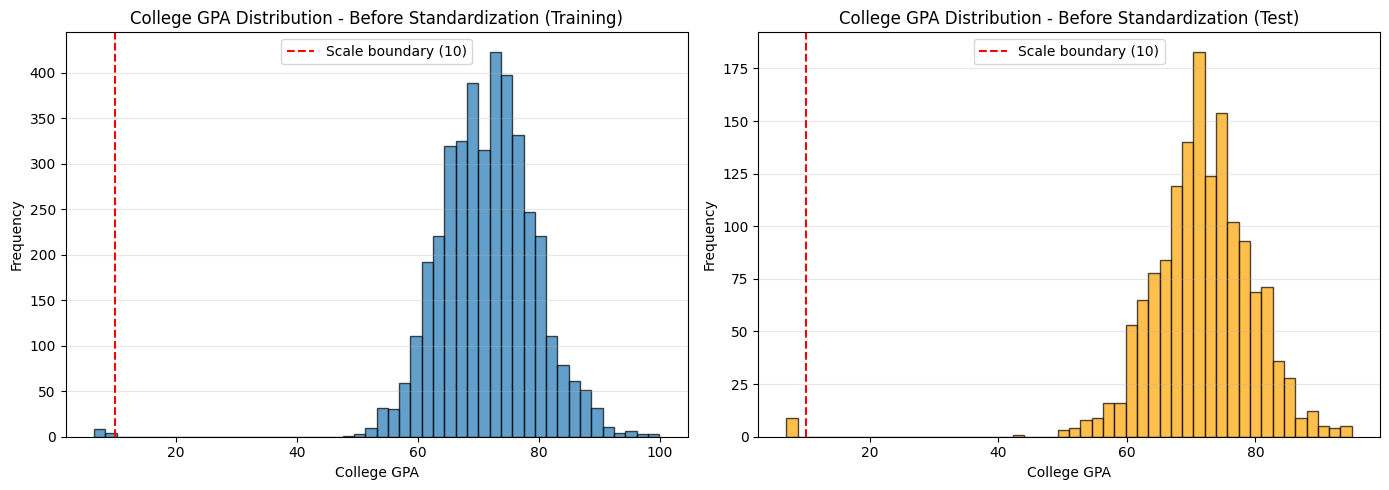


Converting GPAs to 100-point Scale
GPA standardization complete!

After Standardization

College GPA Statistics (After Standardization):

Training Dataset:
count    3998.000000
mean       71.695728
std         7.406631
min        49.070000
25%        66.505000
50%        71.800000
75%        76.400000
max        99.930000
Name: collegeGPA, dtype: float64

Test Dataset:
count    1500.000000
mean       72.037307
std         7.236933
min        43.900000
25%        67.320000
50%        72.000000
75%        76.800000
max        95.000000
Name: collegeGPA, dtype: float64

Remaining GPAs ≤ 10 in Training: 0
Remaining GPAs ≤ 10 in Test: 0


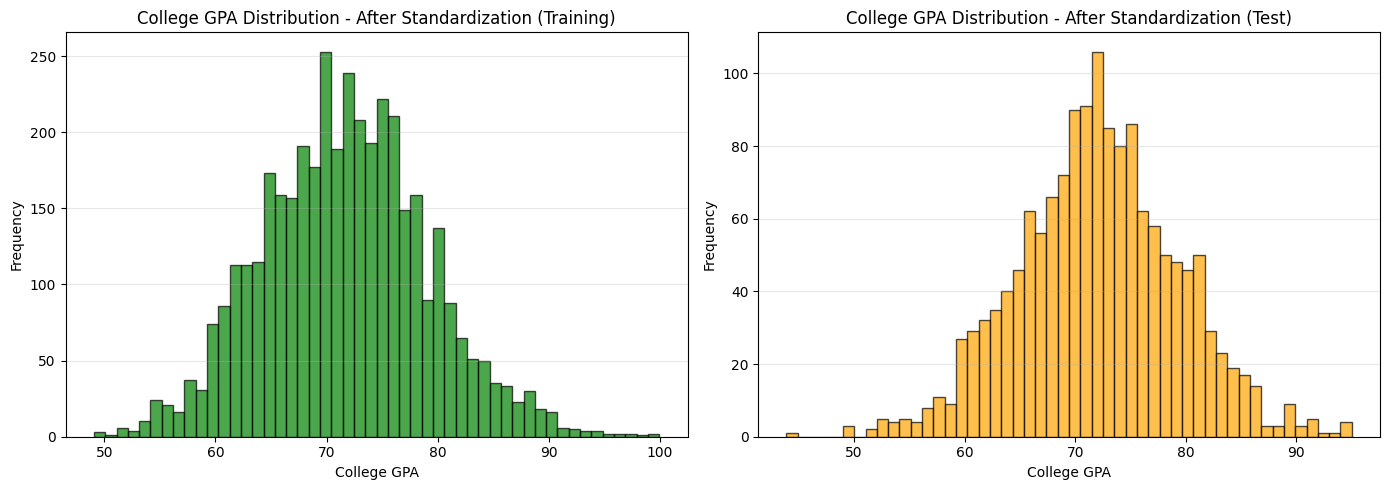


Example Data

Training Dataset - First 10 rows with collegeGPA:
         collegeGPA   Salary
ID                          
203097        78.00   420000
579905        70.06   500000
810601        70.00   325000
267447        74.64  1100000
343523        73.90   200000
1027655       76.32   300000
947847        72.98   300000
912934        85.80   400000
552574        85.03   600000
1203363       78.00   230000

Test Dataset - First 10 rows with collegeGPA:
ID
664736     67.20
1123290    71.10
1062444    80.50
1072028    70.38
267259     71.00
283564     70.24
1264575    70.90
1091378    73.00
361658     84.10
1119280    77.00
Name: collegeGPA, dtype: float64

Correlation Analysis

Correlation between collegeGPA and Salary: 0.1483


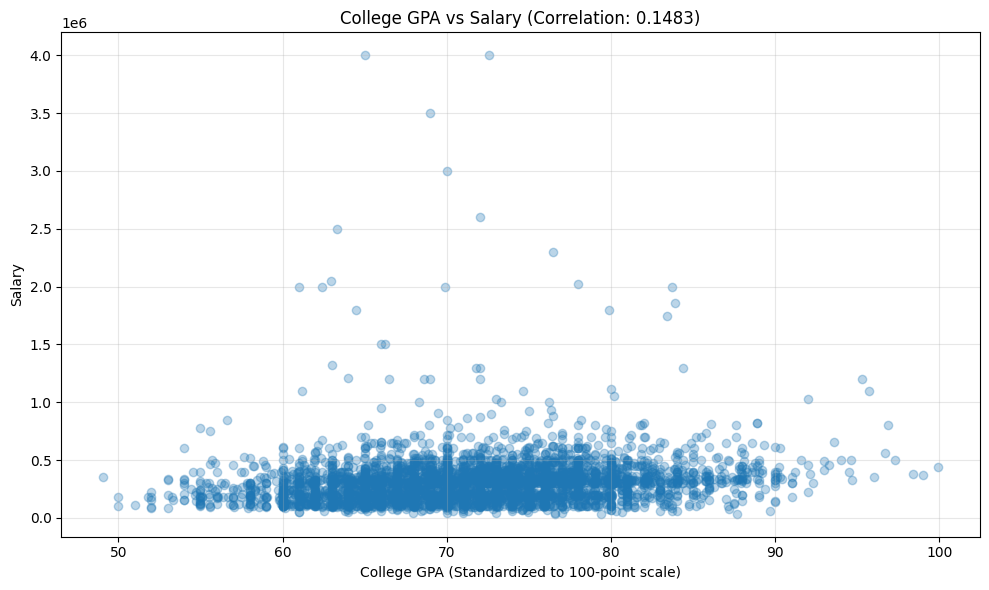


Standardization Complete!


In [ ]:
### 3.7 Standardize the GPA Scale

print("="*60)
print("Standardizing College GPA Scale")
print("="*60)

# Check the current GPA distribution
print("\nCollege GPA Statistics (Before Standardization):")
print("\nTraining Dataset:")
print(train_df['collegeGPA'].describe())

print("\nTest Dataset:")
print(test_df['collegeGPA'].describe())

# Count how many GPAs are on different scales
print("\n" + "="*60)
print("Identifying GPA Scales")
print("="*60)

train_gpa_less_10 = (train_df['collegeGPA'] <= 10).sum()
train_gpa_greater_10 = (train_df['collegeGPA'] > 10).sum()

test_gpa_less_10 = (test_df['collegeGPA'] <= 10).sum()
test_gpa_greater_10 = (test_df['collegeGPA'] > 10).sum()

print(f"\nTraining Dataset:")
print(f"  GPAs on 10-point scale (≤10): {train_gpa_less_10}")
print(f"  GPAs on 100-point scale (>10): {train_gpa_greater_10}")

print(f"\nTest Dataset:")
print(f"  GPAs on 10-point scale (≤10): {test_gpa_less_10}")
print(f"  GPAs on 100-point scale (>10): {test_gpa_greater_10}")

# Visualize before standardization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(train_df['collegeGPA'], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('College GPA')
axes[0].set_ylabel('Frequency')
axes[0].set_title('College GPA Distribution - Before Standardization (Training)')
axes[0].axvline(10, color='red', linestyle='--', label='Scale boundary (10)')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

axes[1].hist(test_df['collegeGPA'], bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[1].set_xlabel('College GPA')
axes[1].set_ylabel('Frequency')
axes[1].set_title('College GPA Distribution - Before Standardization (Test)')
axes[1].axvline(10, color='red', linestyle='--', label='Scale boundary (10)')
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Standardize GPA to 100-point scale using binary indexing
print("\n" + "="*60)
print("Converting GPAs to 100-point Scale")
print("="*60)

# Training dataset: Multiply GPAs ≤ 10 by 10
train_df.loc[train_df['collegeGPA'] <= 10, 'collegeGPA'] = train_df.loc[train_df['collegeGPA'] <= 10, 'collegeGPA'] * 10

# Test dataset: Multiply GPAs ≤ 10 by 10
test_df.loc[test_df['collegeGPA'] <= 10, 'collegeGPA'] = test_df.loc[test_df['collegeGPA'] <= 10, 'collegeGPA'] * 10

print("GPA standardization complete!")

# Verify the standardization
print("\n" + "="*60)
print("After Standardization")
print("="*60)

print("\nCollege GPA Statistics (After Standardization):")
print("\nTraining Dataset:")
print(train_df['collegeGPA'].describe())

print("\nTest Dataset:")
print(test_df['collegeGPA'].describe())

# Check if any GPAs are still ≤ 10
train_gpa_less_10_after = (train_df['collegeGPA'] <= 10).sum()
test_gpa_less_10_after = (test_df['collegeGPA'] <= 10).sum()

print(f"\nRemaining GPAs ≤ 10 in Training: {train_gpa_less_10_after}")
print(f"Remaining GPAs ≤ 10 in Test: {test_gpa_less_10_after}")

# Visualize after standardization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(train_df['collegeGPA'], bins=50, edgecolor='black', alpha=0.7, color='green')
axes[0].set_xlabel('College GPA')
axes[0].set_ylabel('Frequency')
axes[0].set_title('College GPA Distribution - After Standardization (Training)')
axes[0].grid(axis='y', alpha=0.3)

axes[1].hist(test_df['collegeGPA'], bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[1].set_xlabel('College GPA')
axes[1].set_ylabel('Frequency')
axes[1].set_title('College GPA Distribution - After Standardization (Test)')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Show some example conversions
print("\n" + "="*60)
print("Example Data")
print("="*60)

print("\nTraining Dataset - First 10 rows with collegeGPA:")
print(train_df[['collegeGPA', 'Salary']].head(10))

print("\nTest Dataset - First 10 rows with collegeGPA:")
print(test_df['collegeGPA'].head(10))

# Analyze correlation with Salary
print("\n" + "="*60)
print("Correlation Analysis")
print("="*60)

correlation = train_df['collegeGPA'].corr(train_df['Salary'])
print(f"\nCorrelation between collegeGPA and Salary: {correlation:.4f}")

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(train_df['collegeGPA'], train_df['Salary'], alpha=0.3)
plt.xlabel('College GPA (Standardized to 100-point scale)')
plt.ylabel('Salary')
plt.title(f'College GPA vs Salary (Correlation: {correlation:.4f})')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("Standardization Complete!")
print("="*60)

Analyzing and Removing Outliers from Salary

Training Dataset Shape (Before removing outliers): (3998, 18)

Salary Statistics (Before removing outliers):
count    3.998000e+03
mean     3.076998e+05
std      2.127375e+05
min      3.500000e+04
25%      1.800000e+05
50%      3.000000e+05
75%      3.700000e+05
max      4.000000e+06
Name: Salary, dtype: float64


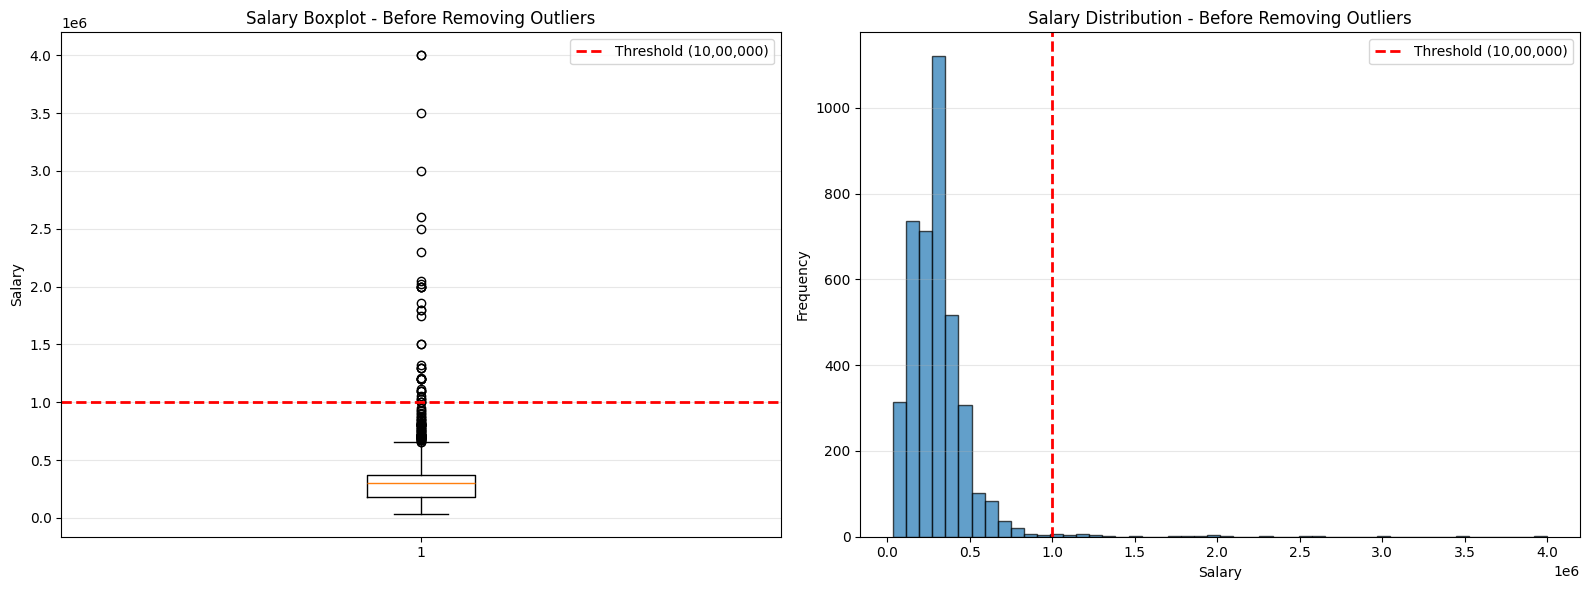


Outlier Analysis

Number of data points with Salary > 10,00,000: 36
Percentage of outliers: 0.90%

Sample of outlier data points (Salary > 10,00,000):
          Salary Gender        Degree Specialization  collegeGPA
ID                                                              
325412   3500000      f   B.Tech/B.E.             CS       69.00
260866   2600000      m   B.Tech/B.E.             CS       72.00
323894   1860000      f  M.Tech./M.E.             EL       83.90
1250429  1500000      m   B.Tech/B.E.             CS       66.00
134963   1300000      m   B.Tech/B.E.             EC       84.40
312164   1200000      m   B.Tech/B.E.             ME       68.63
30706    1200000      m   B.Tech/B.E.             EC       66.49
53921    1110000      m   B.Tech/B.E.             CS       80.00
267447   1100000      m   B.Tech/B.E.             CS       74.64
1174291  1025000      f   B.Tech/B.E.             CS       73.00

Removing Outliers

Removed 36 data points with Salary > 10,00,000
T

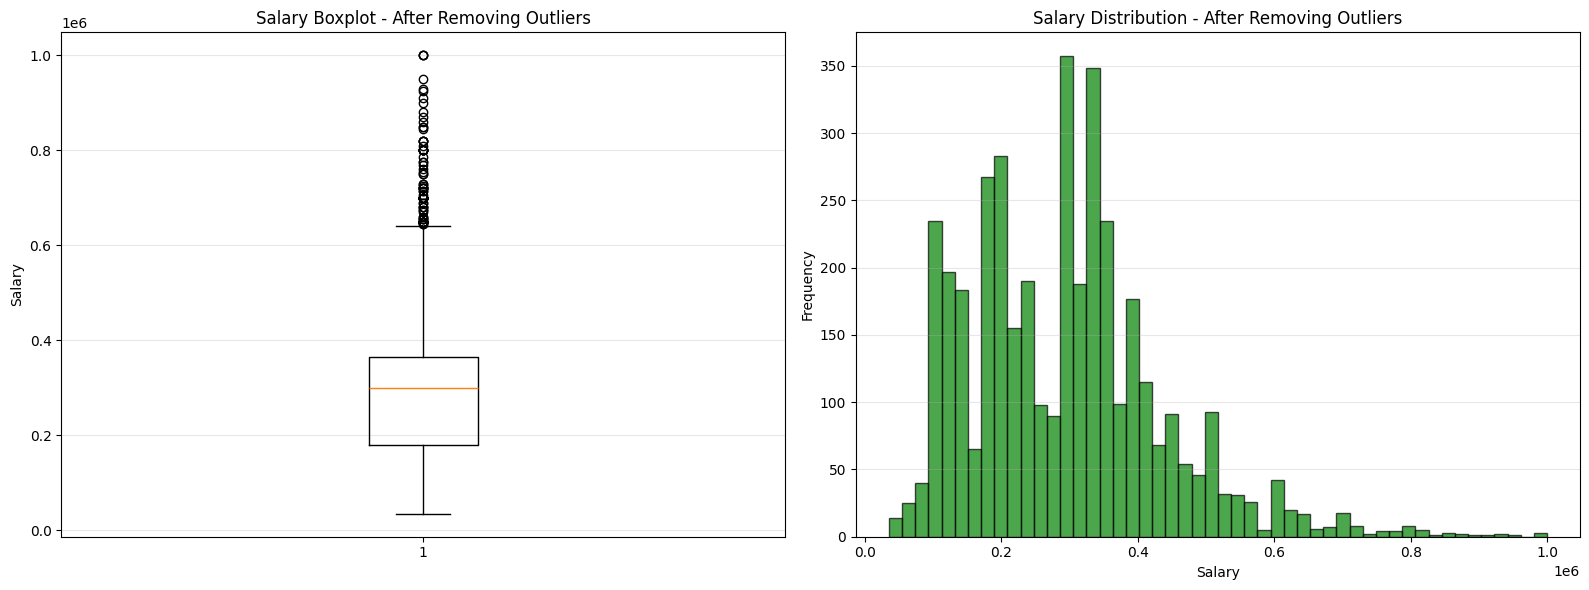


Distribution Comparison


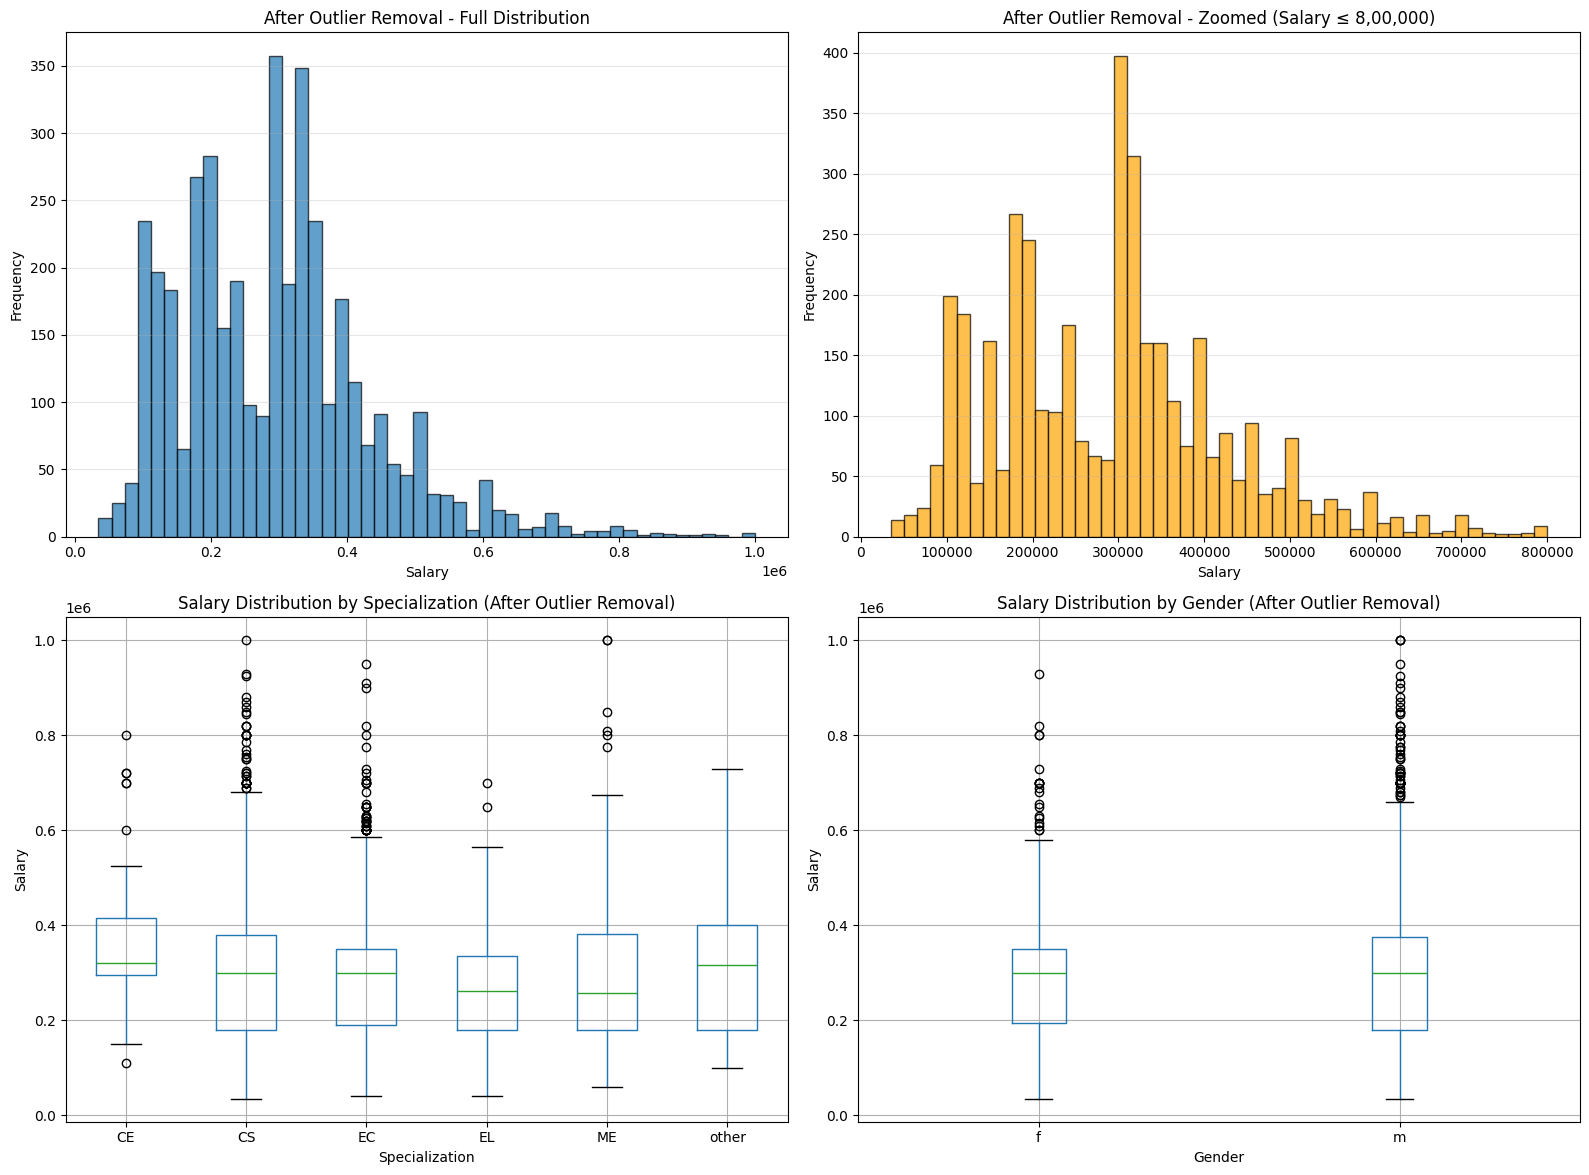


Quartile Analysis:
Q1 (25th percentile): ₹180,000.00
Q2 (50th percentile/Median): ₹300,000.00
Q3 (75th percentile): ₹365,000.00
IQR (Interquartile Range): ₹185,000.00
Lower Fence (Q1 - 1.5*IQR): ₹-97,500.00
Upper Fence (Q3 + 1.5*IQR): ₹642,500.00

Outlier Removal Complete!

Final Training Dataset Shape: (3962, 18)
Test Dataset Shape (unchanged): (1500, 21)


In [ ]:
### 3.8 Remove Outliers

print("="*60)
print("Analyzing and Removing Outliers from Salary")
print("="*60)

# Check current shape and salary statistics
print("\nTraining Dataset Shape (Before removing outliers):", train_df.shape)
print("\nSalary Statistics (Before removing outliers):")
print(train_df['Salary'].describe())

# Visualize salary distribution before removing outliers
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Boxplot
axes[0].boxplot(train_df['Salary'], vert=True)
axes[0].set_ylabel('Salary')
axes[0].set_title('Salary Boxplot - Before Removing Outliers')
axes[0].grid(axis='y', alpha=0.3)
axes[0].axhline(y=1000000, color='red', linestyle='--', linewidth=2, label='Threshold (10,00,000)')
axes[0].legend()

# Histogram
axes[1].hist(train_df['Salary'], bins=50, edgecolor='black', alpha=0.7)
axes[1].set_xlabel('Salary')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Salary Distribution - Before Removing Outliers')
axes[1].axvline(x=1000000, color='red', linestyle='--', linewidth=2, label='Threshold (10,00,000)')
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Count outliers
print("\n" + "="*60)
print("Outlier Analysis")
print("="*60)

outliers_count = (train_df['Salary'] > 1000000).sum()
outliers_percentage = (outliers_count / len(train_df)) * 100

print(f"\nNumber of data points with Salary > 10,00,000: {outliers_count}")
print(f"Percentage of outliers: {outliers_percentage:.2f}%")

# Show some examples of outliers
print("\nSample of outlier data points (Salary > 10,00,000):")
outlier_samples = train_df[train_df['Salary'] > 1000000].head(10)
print(outlier_samples[['Salary', 'Gender', 'Degree', 'Specialization', 'collegeGPA']].sort_values('Salary', ascending=False))

# Remove outliers
print("\n" + "="*60)
print("Removing Outliers")
print("="*60)

# Filter out rows where Salary > 10,00,000
train_df = train_df[train_df['Salary'] <= 1000000]

print(f"\nRemoved {outliers_count} data points with Salary > 10,00,000")
print(f"Training Dataset Shape (After removing outliers): {train_df.shape}")

# Verify removal
remaining_outliers = (train_df['Salary'] > 1000000).sum()
print(f"Remaining data points with Salary > 10,00,000: {remaining_outliers}")

# Statistics after removing outliers
print("\n" + "="*60)
print("After Removing Outliers")
print("="*60)

print("\nSalary Statistics (After removing outliers):")
print(train_df['Salary'].describe())

# Visualize salary distribution after removing outliers
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Boxplot
axes[0].boxplot(train_df['Salary'], vert=True)
axes[0].set_ylabel('Salary')
axes[0].set_title('Salary Boxplot - After Removing Outliers')
axes[0].grid(axis='y', alpha=0.3)

# Histogram
axes[1].hist(train_df['Salary'], bins=50, edgecolor='black', alpha=0.7, color='green')
axes[1].set_xlabel('Salary')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Salary Distribution - After Removing Outliers')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Additional visualizations
print("\n" + "="*60)
print("Distribution Comparison")
print("="*60)

# Create a figure with before/after comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Before - Full view
axes[0, 0].hist(train_df['Salary'], bins=50, edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Salary')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('After Outlier Removal - Full Distribution')
axes[0, 0].grid(axis='y', alpha=0.3)

# After - Zoomed view (up to 8,00,000 for better visibility)
axes[0, 1].hist(train_df[train_df['Salary'] <= 800000]['Salary'], bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[0, 1].set_xlabel('Salary')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('After Outlier Removal - Zoomed (Salary ≤ 8,00,000)')
axes[0, 1].grid(axis='y', alpha=0.3)

# Box plot comparison by specialization
train_df.boxplot(column='Salary', by='Specialization', ax=axes[1, 0])
axes[1, 0].set_xlabel('Specialization')
axes[1, 0].set_ylabel('Salary')
axes[1, 0].set_title('Salary Distribution by Specialization (After Outlier Removal)')
axes[1, 0].get_figure().suptitle('')

# Box plot comparison by gender
train_df.boxplot(column='Salary', by='Gender', ax=axes[1, 1])
axes[1, 1].set_xlabel('Gender')
axes[1, 1].set_ylabel('Salary')
axes[1, 1].set_title('Salary Distribution by Gender (After Outlier Removal)')
axes[1, 1].get_figure().suptitle('')

plt.tight_layout()
plt.show()

# Quartile analysis
print("\nQuartile Analysis:")
Q1 = train_df['Salary'].quantile(0.25)
Q2 = train_df['Salary'].quantile(0.50)
Q3 = train_df['Salary'].quantile(0.75)
IQR = Q3 - Q1

print(f"Q1 (25th percentile): ₹{Q1:,.2f}")
print(f"Q2 (50th percentile/Median): ₹{Q2:,.2f}")
print(f"Q3 (75th percentile): ₹{Q3:,.2f}")
print(f"IQR (Interquartile Range): ₹{IQR:,.2f}")
print(f"Lower Fence (Q1 - 1.5*IQR): ₹{Q1 - 1.5*IQR:,.2f}")
print(f"Upper Fence (Q3 + 1.5*IQR): ₹{Q3 + 1.5*IQR:,.2f}")

print("\n" + "="*60)
print("Outlier Removal Complete!")
print("="*60)
print(f"\nFinal Training Dataset Shape: {train_df.shape}")
print(f"Test Dataset Shape (unchanged): {test_df.shape}")

In [ ]:
### 4. Data Preprocessing

print("="*80)
print("4.1 ENCODING CATEGORICAL COLUMNS")
print("="*80)

# First, let's check the categorical columns
print("\nCategorical Columns in the Dataset:")
categorical_cols = train_df.select_dtypes(include=['object']).columns.tolist()
print(f"Columns: {categorical_cols}")

print("\n" + "="*80)
print("Step 1: Encoding Gender using LabelEncoder")
print("="*80)

# Check unique values in Gender column
print("\nUnique values in Gender column (Training):")
print(train_df['Gender'].value_counts())

print("\nUnique values in Gender column (Test):")
print(test_df['Gender'].value_counts())

# Initialize LabelEncoder
gender_encoder = LabelEncoder()

# Fit on training data and transform both datasets
train_df['Gender'] = gender_encoder.fit_transform(train_df['Gender'])
test_df['Gender'] = gender_encoder.transform(test_df['Gender'])

# Show the encoding mapping
print("\nGender Encoding Mapping:")
for i, label in enumerate(gender_encoder.classes_):
    print(f"  {label} -> {i}")

print("\nGender column after encoding (Training):")
print(train_df['Gender'].value_counts().sort_index())

print("\nGender column after encoding (Test):")
print(test_df['Gender'].value_counts().sort_index())

print("\n" + "="*80)
print("Step 2: One-Hot Encoding Degree and Specialization")
print("="*80)

# Check unique values before encoding
print("\nUnique values in Degree (Training):")
print(train_df['Degree'].value_counts())

print("\nUnique values in Specialization (Training):")
print(train_df['Specialization'].value_counts())

print("\nUnique values in Degree (Test):")
print(test_df['Degree'].value_counts())

print("\nUnique values in Specialization (Test):")
print(test_df['Specialization'].value_counts())

# Store the shape before encoding
print(f"\nDataset shapes before one-hot encoding:")
print(f"Training: {train_df.shape}")
print(f"Test: {test_df.shape}")

# Separate target variable (Salary) from features
y_train = train_df['Salary'].copy()
X_train = train_df.drop('Salary', axis=1)

# One-hot encode Degree and Specialization for training data
X_train = pd.get_dummies(X_train, columns=['Degree', 'Specialization'], drop_first=False)

# One-hot encode Degree and Specialization for test data
X_test = pd.get_dummies(test_df, columns=['Degree', 'Specialization'], drop_first=False)

print(f"\nDataset shapes after one-hot encoding:")
print(f"Training (X): {X_train.shape}")
print(f"Training (y): {y_train.shape}")
print(f"Test: {X_test.shape}")

# Check the new column names
print("\n" + "="*80)
print("New Columns Created")
print("="*80)

# Get the new dummy columns
degree_columns = [col for col in X_train.columns if col.startswith('Degree_')]
specialization_columns = [col for col in X_train.columns if col.startswith('Specialization_')]

print(f"\nDegree columns created ({len(degree_columns)}):")
print(degree_columns)

print(f"\nSpecialization columns created ({len(specialization_columns)}):")
print(specialization_columns)

# Align columns between training and test datasets
print("\n" + "="*80)
print("Step 3: Aligning Columns Between Training and Test Sets")
print("="*80)

# Get columns that are in training but not in test
missing_in_test = set(X_train.columns) - set(X_test.columns)
# Get columns that are in test but not in training
missing_in_train = set(X_test.columns) - set(X_train.columns)

print(f"\nColumns in Training but not in Test: {len(missing_in_test)}")
if missing_in_test:
    print(missing_in_test)

print(f"\nColumns in Test but not in Training: {len(missing_in_train)}")
if missing_in_train:
    print(missing_in_train)

# Add missing columns to test set with 0 values
for col in missing_in_test:
    X_test[col] = 0

# Add missing columns to training set with 0 values
for col in missing_in_train:
    X_train[col] = 0

# Reorder test columns to match training columns
X_test = X_test[X_train.columns]

print(f"\nAfter alignment:")
print(f"Training (X): {X_train.shape}")
print(f"Test: {X_test.shape}")
print(f"Column match: {list(X_train.columns) == list(X_test.columns)}")

# Display sample of encoded data
print("\n" + "="*80)
print("Sample of Encoded Data")
print("="*80)

print("\nTraining data (first 5 rows):")
print(X_train.head())

print("\nTest data (first 5 rows):")
print(X_test.head())

# Show data types
print("\n" + "="*80)
print("Data Types After Encoding")
print("="*80)

print("\nTraining data types:")
print(X_train.dtypes.value_counts())

print("\nTest data types:")
print(X_test.dtypes.value_counts())

# Summary statistics
print("\n" + "="*80)
print("Summary")
print("="*80)

print(f"\nTotal features after encoding: {X_train.shape[1]}")
print(f"  - Numerical features: {len([col for col in X_train.columns if not col.startswith(('Degree_', 'Specialization_'))])}")
print(f"  - Degree dummy features: {len(degree_columns)}")
print(f"  - Specialization dummy features: {len(specialization_columns)}")

print(f"\nTraining samples: {X_train.shape[0]}")
print(f"Test samples: {X_test.shape[0]}")

print("\nColumn names in final dataset:")
print(X_train.columns.tolist())

# Verify no missing values were introduced
print("\n" + "="*80)
print("Checking for Missing Values")
print("="*80)

print(f"\nMissing values in Training (X): {X_train.isnull().sum().sum()}")
print(f"Missing values in Training (y): {y_train.isnull().sum()}")
print(f"Missing values in Test: {X_test.isnull().sum().sum()}")

print("\n" + "="*80)
print("Encoding Complete!")
print("="*80)

4.1 ENCODING CATEGORICAL COLUMNS

Categorical Columns in the Dataset:
Columns: ['Gender', 'Degree', 'Specialization']

Step 1: Encoding Gender using LabelEncoder

Unique values in Gender column (Training):
Gender
m    3012
f     950
Name: count, dtype: int64

Unique values in Gender column (Test):
Gender
m    1117
f     383
Name: count, dtype: int64

Gender Encoding Mapping:
  f -> 0
  m -> 1

Gender column after encoding (Training):
Gender
0     950
1    3012
Name: count, dtype: int64

Gender column after encoding (Test):
Gender
0     383
1    1117
Name: count, dtype: int64

Step 2: One-Hot Encoding Degree and Specialization

Unique values in Degree (Training):
Degree
B.Tech/B.E.      3669
MCA               240
M.Tech./M.E.       51
M.Sc. (Tech.)       2
Name: count, dtype: int64

Unique values in Specialization (Training):
Specialization
CS       2268
EC       1309
ME        216
EL         84
other      56
CE         29
Name: count, dtype: int64

Unique values in Degree (Test):
Degre

4.2 SCALING NUMERICAL COLUMNS

Checking for '?' values in datasets

Checking Training Data:

Checking Test Data:
  Designation: 1500 '?' values found
  JobCity: 1500 '?' values found
  DOL: 1500 '?' values found
  DOJ: 1500 '?' values found

Handling '?' values and converting to numeric
Converted '?' to NaN and columns to numeric type

NaN values in Training data:
Series([], dtype: int64)

NaN values in Test data:
Designation    1500
JobCity        1500
DOL            1500
DOJ            1500
dtype: int64

Imputing NaN values with median

Numerical columns to be scaled

Numerical columns to be scaled (19):
['Gender', '10percentage', '12percentage', 'collegeGPA', 'English', 'Logical', 'Quant', 'Domain', 'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience', '12GradAge', 'GradAge', 'Designation', 'JobCity', 'DOL', 'DOJ']

Statistics Before Scaling (Training Data)

Training data - Numerical columns statistics:
            Gender  10percentage  12perc

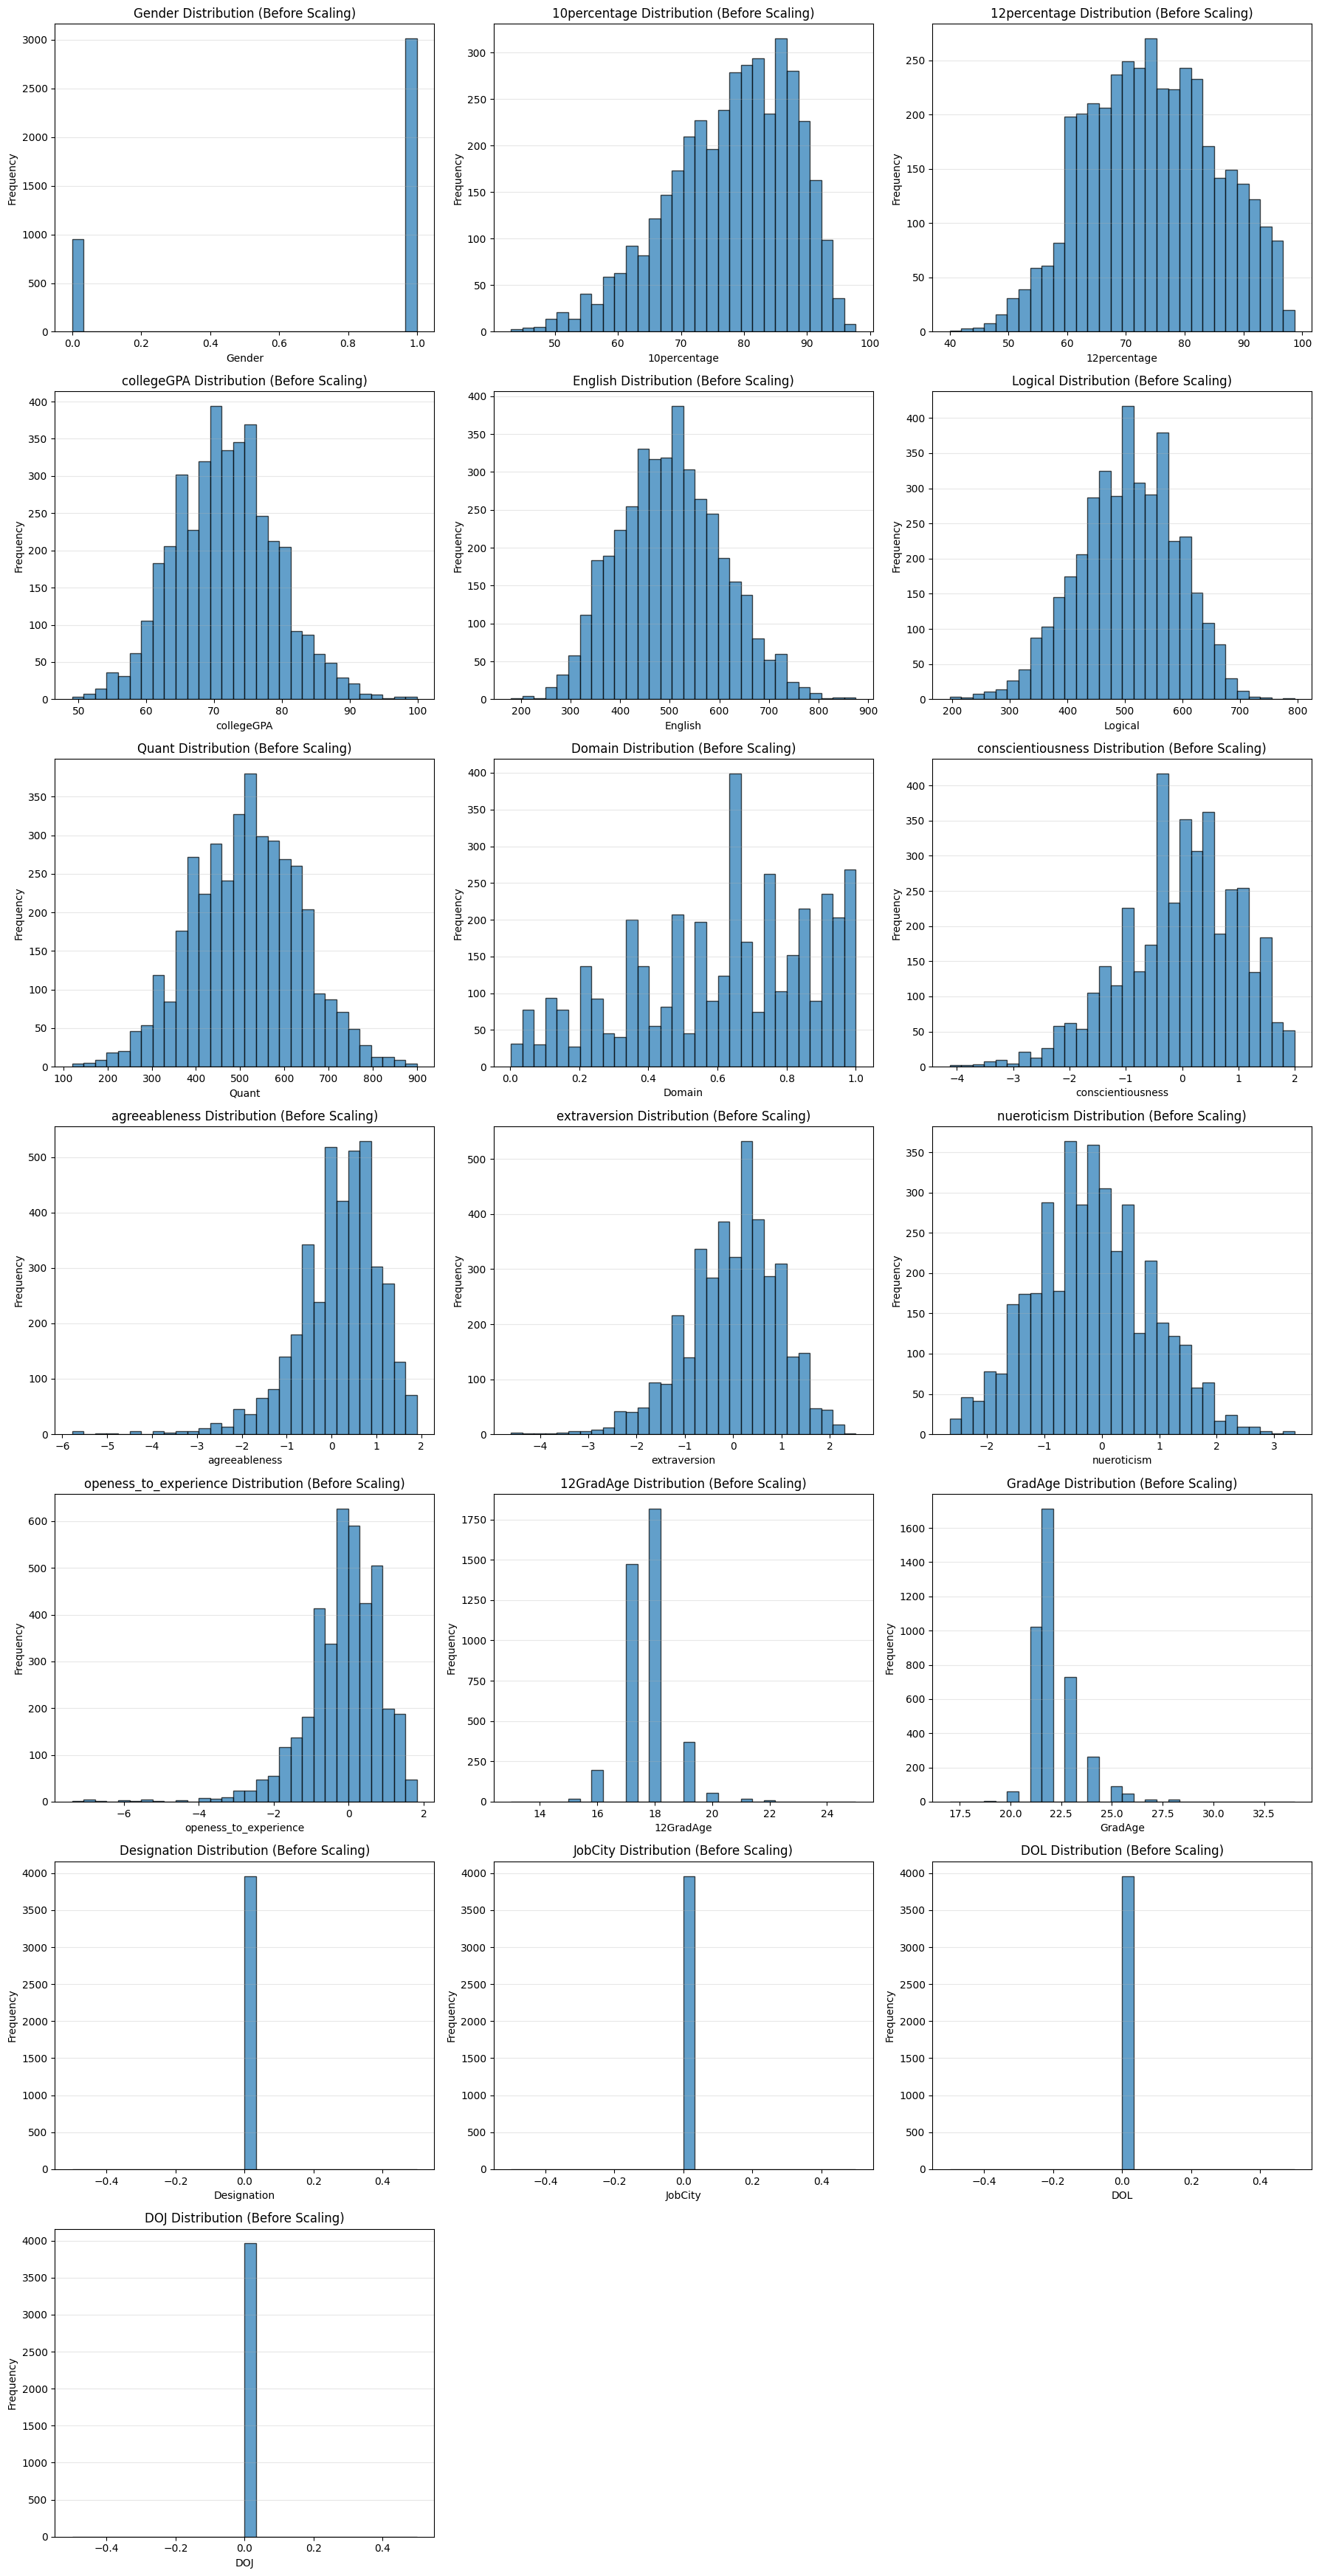


Applying Standard Scaling

Scaling complete!
Training data shape: (3962, 29)
Test data shape: (1500, 29)

Scaling Parameters

Mean values used for scaling (from training data):
  Gender: 0.7602
  10percentage: 77.9264
  12percentage: 74.4711
  collegeGPA: 71.6824
  English: 501.5066
  Logical: 501.4493
  Quant: 513.2625
  Domain: 0.6116
  conscientiousness: -0.0360
  agreeableness: 0.1441
  extraversion: 0.0007
  nueroticism: -0.1658
  openess_to_experience: -0.1384
  12GradAge: 17.6603
  GradAge: 22.1797
  Designation: 0.0000
  JobCity: 0.0000
  DOL: 0.0000
  DOJ: 0.0000

Standard deviation values used for scaling (from training data):
  Gender: 0.4269
  10percentage: 9.8365
  12percentage: 11.0018
  collegeGPA: 7.3843
  English: 104.7845
  Logical: 86.5615
  Quant: 121.8758
  Domain: 0.2649
  conscientiousness: 1.0272
  agreeableness: 0.9415
  extraversion: 0.9522
  nueroticism: 1.0080
  openess_to_experience: 1.0085
  12GradAge: 0.8688
  GradAge: 1.1786
  Designation: 1.0000
  JobC

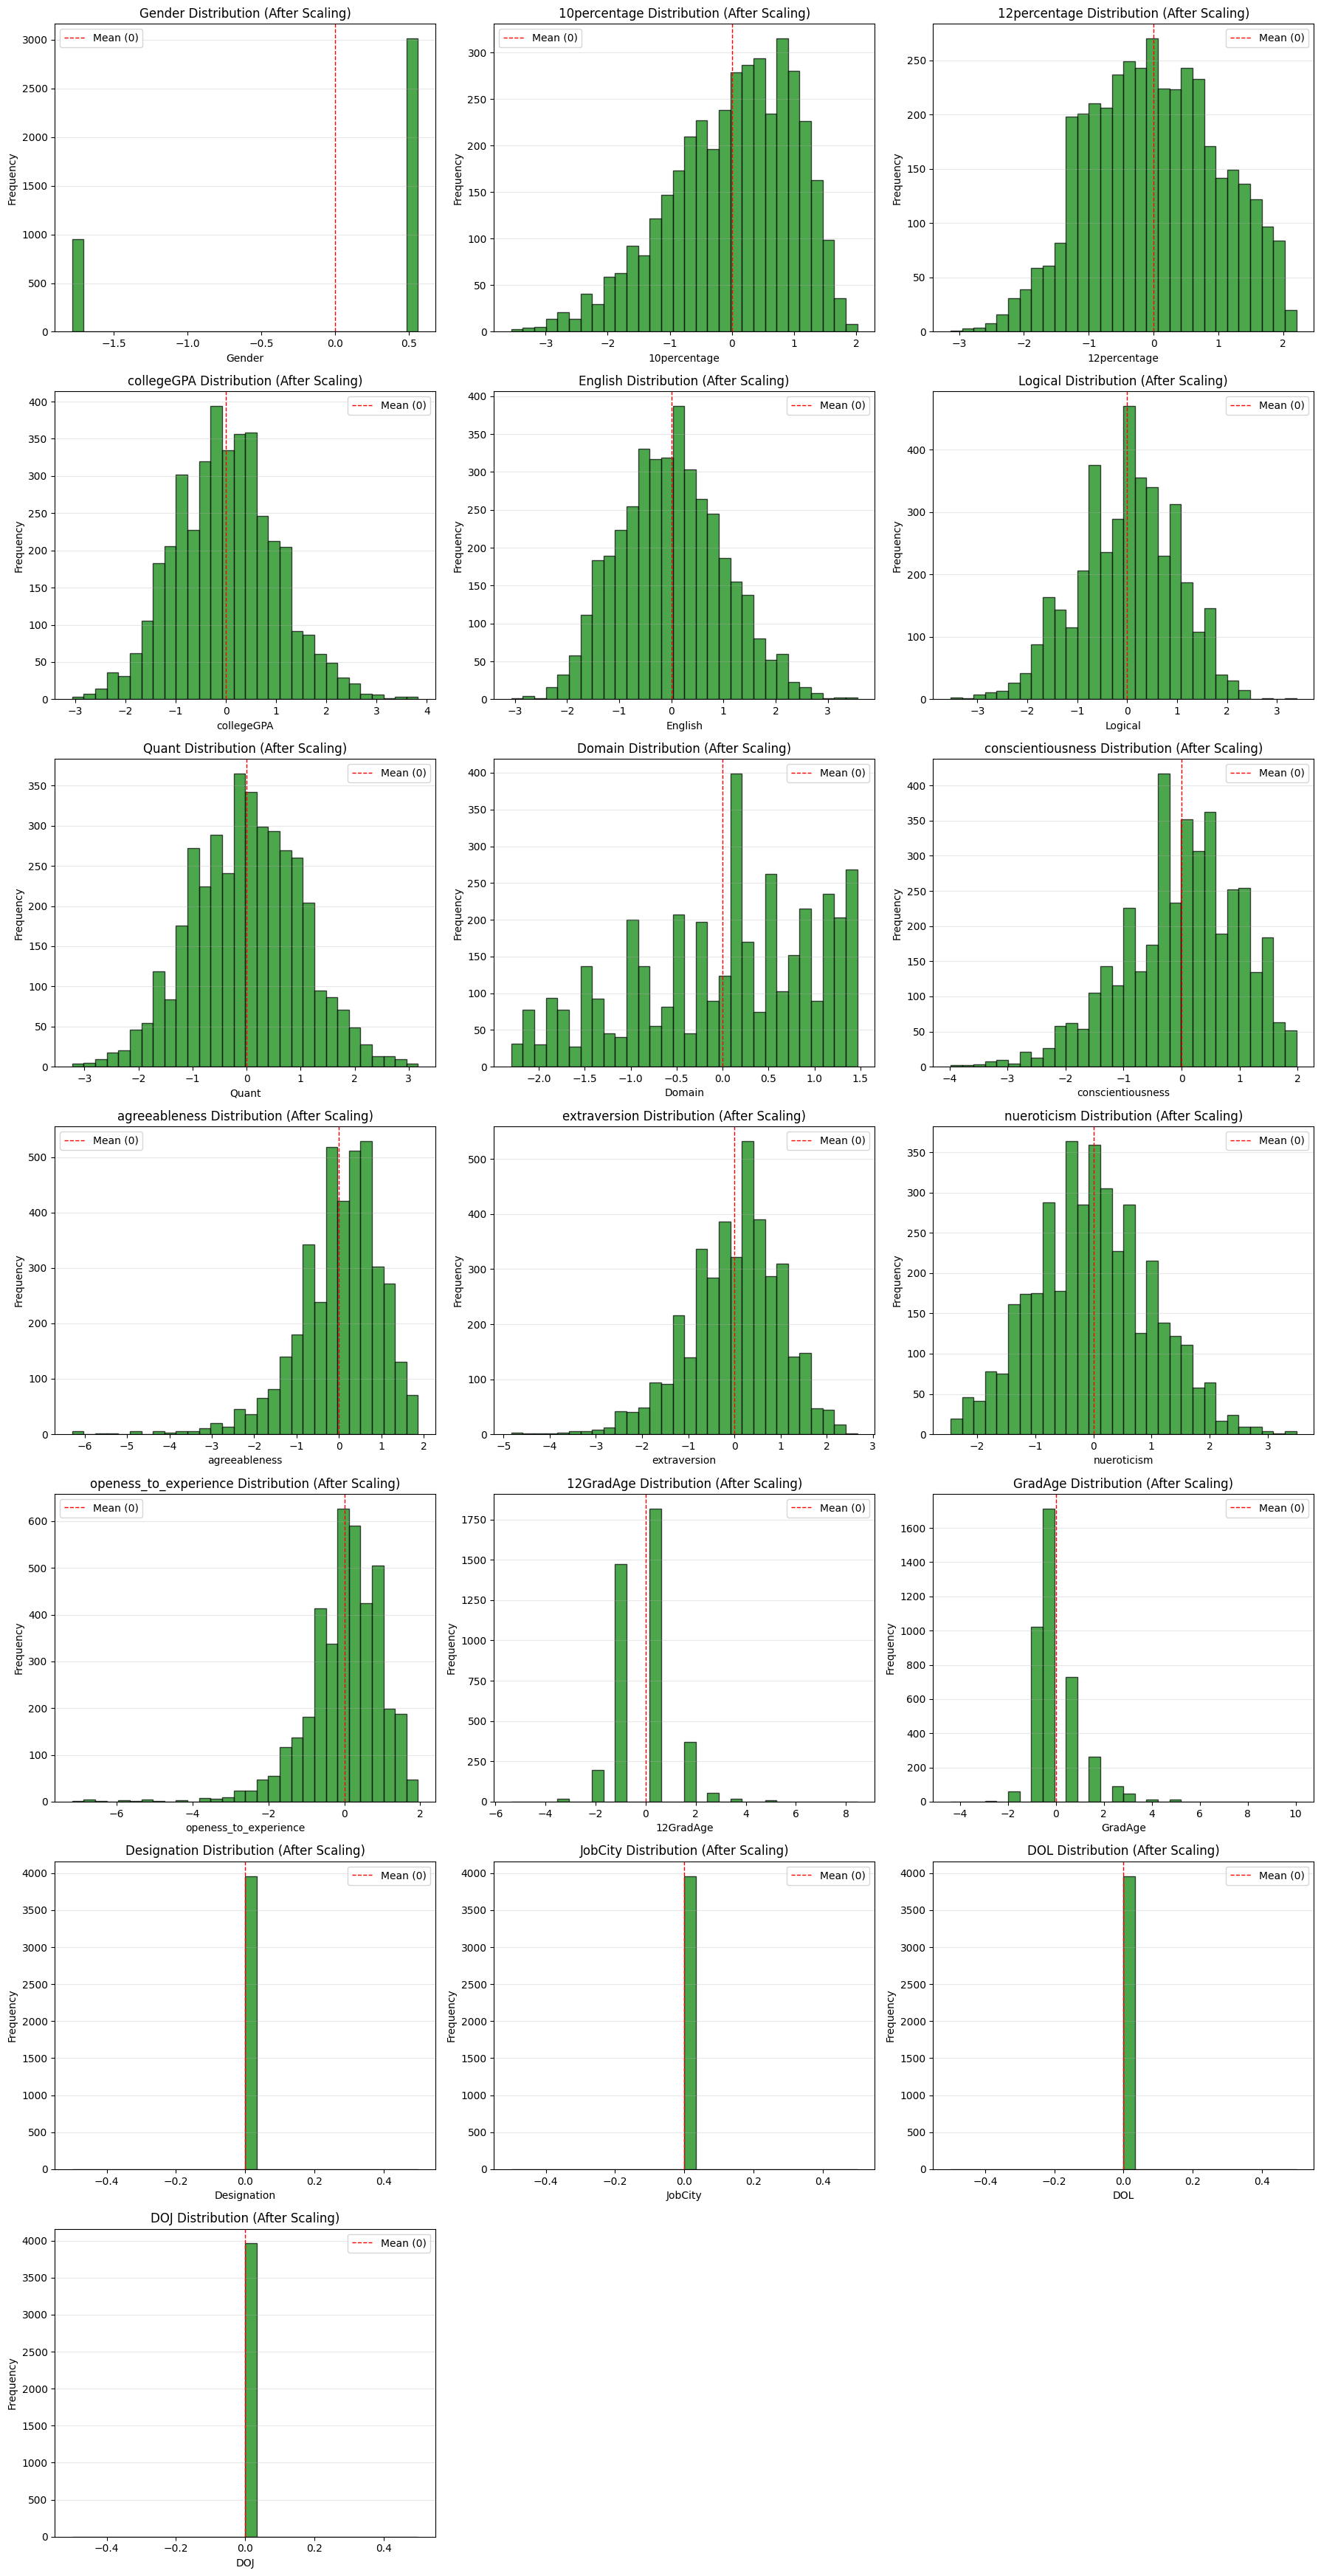


Before vs After Comparison


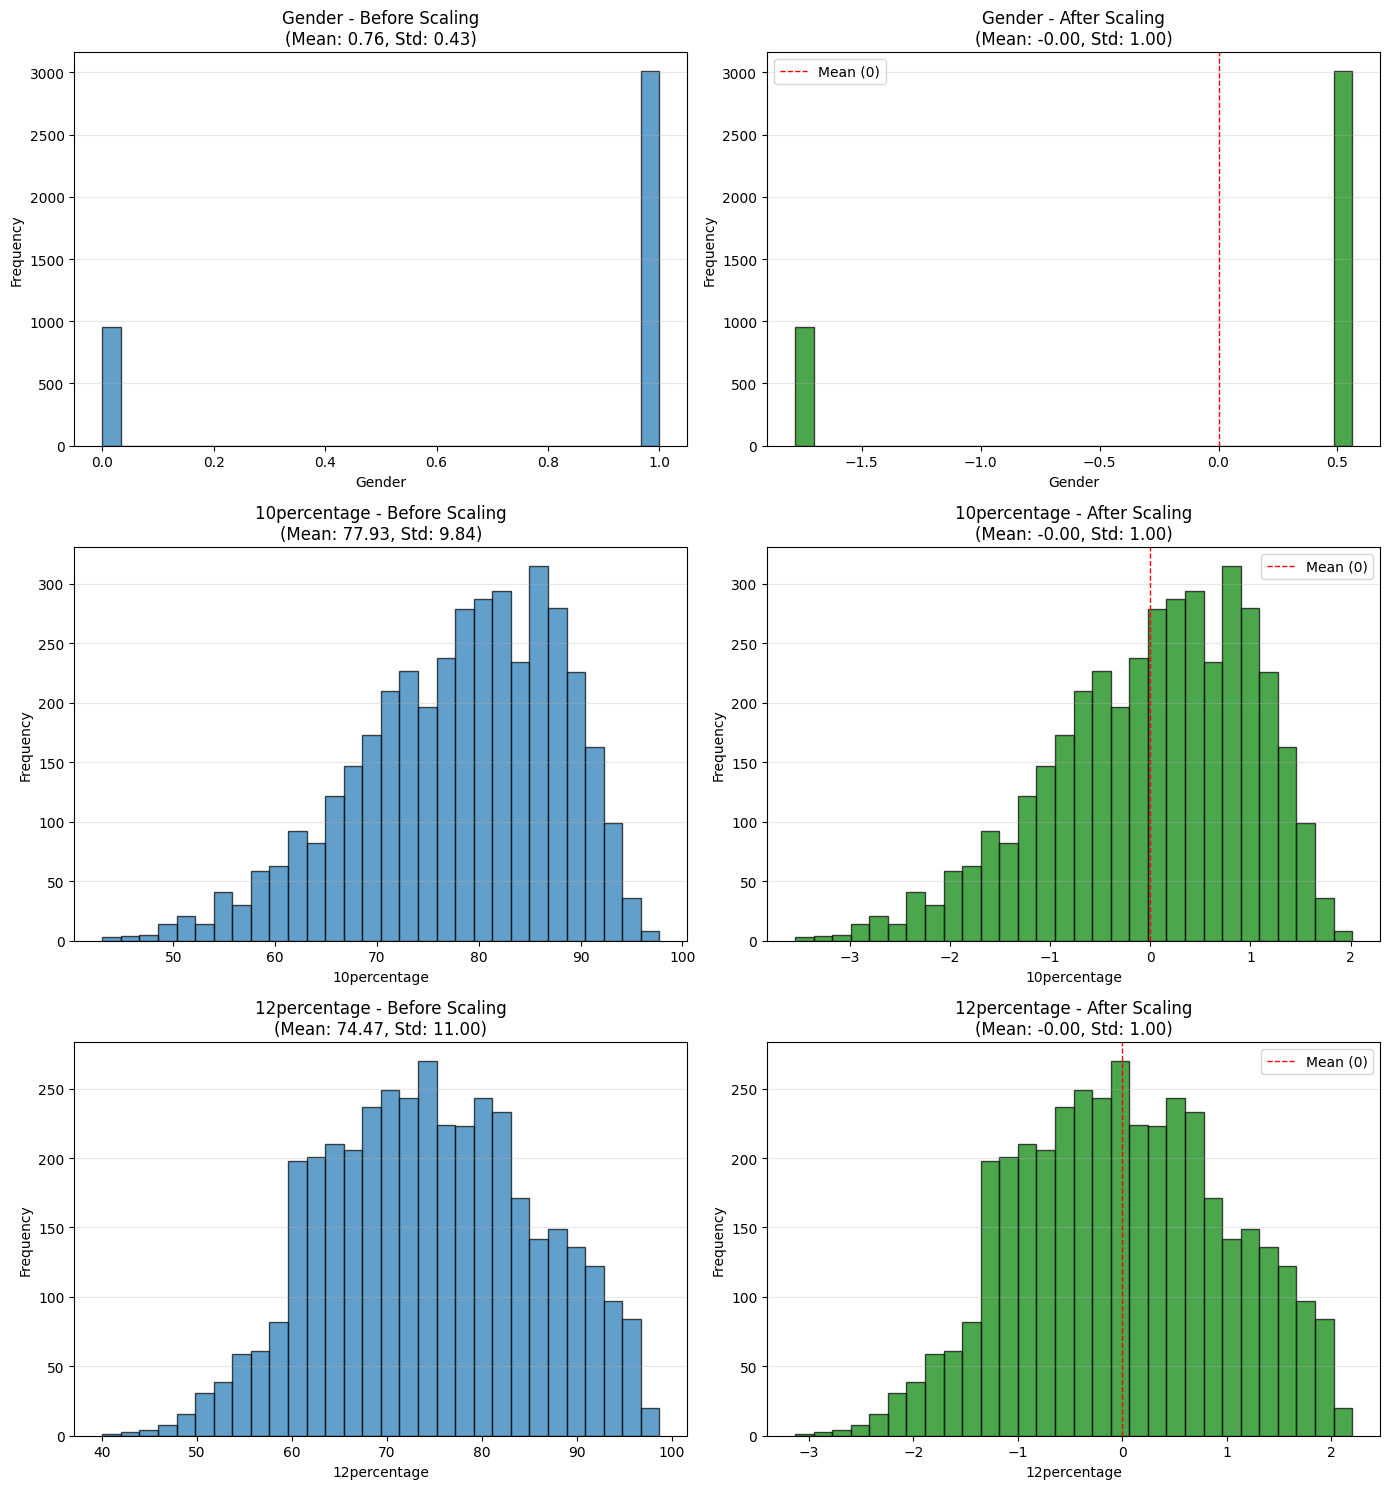


Sample Data Comparison

First 5 rows - Before Scaling:
         Gender  10percentage  12percentage  collegeGPA  English  Logical  \
ID                                                                          
203097        0         84.30          95.8       78.00      515      585   
579905        1         85.40          85.0       70.06      695      610   
810601        0         85.00          68.2       70.00      615      545   
343523        1         78.00          76.8       73.90      545      625   
1027655       1         89.92          87.0       76.32      560      555   

         Quant    Domain  conscientiousness  agreeableness  extraversion  \
ID                                                                         
203097     525  0.635979             0.9737         0.8128        0.5269   
579905     780  0.960603            -0.7335         0.3789        1.2396   
810601     370  0.450877             0.2718         1.7109        0.1637   
343523     465  0.124502

In [ ]:
### 4.2 Scale Numerical Columns (Fixed)

print("="*80)
print("4.2 SCALING NUMERICAL COLUMNS")
print("="*80)

# First, check for '?' values in the datasets
print("\n" + "="*80)
print("Checking for '?' values in datasets")
print("="*80)

# Check training data
print("\nChecking Training Data:")
for col in X_train.columns:
    if X_train[col].dtype == 'object':
        question_marks = (X_train[col] == '?').sum()
        if question_marks > 0:
            print(f"  {col}: {question_marks} '?' values found")

# Check test data
print("\nChecking Test Data:")
for col in X_test.columns:
    if X_test[col].dtype == 'object':
        question_marks = (X_test[col] == '?').sum()
        if question_marks > 0:
            print(f"  {col}: {question_marks} '?' values found")

# Replace '?' with NaN and convert to numeric
print("\n" + "="*80)
print("Handling '?' values and converting to numeric")
print("="*80)

# For training data
for col in X_train.columns:
    if X_train[col].dtype == 'object':
        X_train[col] = X_train[col].replace('?', np.nan)
        X_train[col] = pd.to_numeric(X_train[col], errors='coerce')

# For test data
for col in X_test.columns:
    if X_test[col].dtype == 'object':
        X_test[col] = X_test[col].replace('?', np.nan)
        X_test[col] = pd.to_numeric(X_test[col], errors='coerce')

print("Converted '?' to NaN and columns to numeric type")

# Check for NaN values after conversion
print("\nNaN values in Training data:")
nan_train = X_train.isnull().sum()
print(nan_train[nan_train > 0])

print("\nNaN values in Test data:")
nan_test = X_test.isnull().sum()
print(nan_test[nan_test > 0])

# Handle NaN values using SimpleImputer (median strategy)
if X_train.isnull().sum().sum() > 0 or X_test.isnull().sum().sum() > 0:
    print("\n" + "="*80)
    print("Imputing NaN values with median")
    print("="*80)

    imputer = SimpleImputer(strategy='median')

    # Get columns with NaN
    cols_with_nan = X_train.columns[X_train.isnull().any()].tolist()

    if cols_with_nan:
        print(f"\nImputing columns: {cols_with_nan}")
        X_train[cols_with_nan] = imputer.fit_transform(X_train[cols_with_nan])
        X_test[cols_with_nan] = imputer.transform(X_test[cols_with_nan])
        print("Imputation complete!")

# Identify numerical columns (exclude one-hot encoded columns)
numerical_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()

# Remove one-hot encoded columns (they should remain 0 or 1)
numerical_cols = [col for col in numerical_cols if not col.startswith(('Degree_', 'Specialization_'))]

print(f"\n" + "="*80)
print("Numerical columns to be scaled")
print("="*80)

print(f"\nNumerical columns to be scaled ({len(numerical_cols)}):")
print(numerical_cols)

# Display statistics before scaling
print("\n" + "="*80)
print("Statistics Before Scaling (Training Data)")
print("="*80)

print("\nTraining data - Numerical columns statistics:")
print(X_train[numerical_cols].describe())

# Visualize distributions before scaling
print("\n" + "="*80)
print("Visualizing Distributions Before Scaling")
print("="*80)

# Create subplots for numerical features
n_cols = len(numerical_cols)
n_rows = (n_cols + 2) // 3  # 3 columns per row
fig, axes = plt.subplots(n_rows, 3, figsize=(18, 5*n_rows))
axes = axes.flatten() if n_cols > 1 else [axes]

for idx, col in enumerate(numerical_cols):
    axes[idx].hist(X_train[col], bins=30, edgecolor='black', alpha=0.7)
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')
    axes[idx].set_title(f'{col} Distribution (Before Scaling)')
    axes[idx].grid(axis='y', alpha=0.3)

# Hide empty subplots
for idx in range(n_cols, len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

# Initialize StandardScaler
print("\n" + "="*80)
print("Applying Standard Scaling")
print("="*80)

scaler = StandardScaler()

# Fit the scaler on training data and transform
X_train_scaled = X_train.copy()
X_train_scaled[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])

# Transform test data using the fitted scaler
X_test_scaled = X_test.copy()
X_test_scaled[numerical_cols] = scaler.transform(X_test[numerical_cols])

print("\nScaling complete!")
print(f"Training data shape: {X_train_scaled.shape}")
print(f"Test data shape: {X_test_scaled.shape}")

# Display scaling parameters
print("\n" + "="*80)
print("Scaling Parameters")
print("="*80)

print("\nMean values used for scaling (from training data):")
for col, mean_val in zip(numerical_cols, scaler.mean_):
    print(f"  {col}: {mean_val:.4f}")

print("\nStandard deviation values used for scaling (from training data):")
for col, std_val in zip(numerical_cols, scaler.scale_):
    print(f"  {col}: {std_val:.4f}")

# Display statistics after scaling
print("\n" + "="*80)
print("Statistics After Scaling (Training Data)")
print("="*80)

print("\nTraining data - Scaled numerical columns statistics:")
print(X_train_scaled[numerical_cols].describe())

print("\nTest data - Scaled numerical columns statistics:")
print(X_test_scaled[numerical_cols].describe())

# Verify mean ≈ 0 and std ≈ 1 for training data
print("\n" + "="*80)
print("Verification (Training Data)")
print("="*80)

print("\nMean values after scaling (should be ≈ 0):")
print(X_train_scaled[numerical_cols].mean())

print("\nStandard deviation after scaling (should be ≈ 1):")
print(X_train_scaled[numerical_cols].std())

# Visualize distributions after scaling
print("\n" + "="*80)
print("Visualizing Distributions After Scaling")
print("="*80)

fig, axes = plt.subplots(n_rows, 3, figsize=(18, 5*n_rows))
axes = axes.flatten() if n_cols > 1 else [axes]

for idx, col in enumerate(numerical_cols):
    axes[idx].hist(X_train_scaled[col], bins=30, edgecolor='black', alpha=0.7, color='green')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')
    axes[idx].set_title(f'{col} Distribution (After Scaling)')
    axes[idx].axvline(0, color='red', linestyle='--', linewidth=1, label='Mean (0)')
    axes[idx].grid(axis='y', alpha=0.3)
    axes[idx].legend()

# Hide empty subplots
for idx in range(n_cols, len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

# Compare before and after for a few features
print("\n" + "="*80)
print("Before vs After Comparison")
print("="*80)

# Select first 3 numerical columns for detailed comparison
comparison_cols = numerical_cols[:min(3, len(numerical_cols))]

fig, axes = plt.subplots(len(comparison_cols), 2, figsize=(14, 5*len(comparison_cols)))
if len(comparison_cols) == 1:
    axes = axes.reshape(1, -1)

for idx, col in enumerate(comparison_cols):
    # Before scaling
    axes[idx, 0].hist(X_train[col], bins=30, edgecolor='black', alpha=0.7)
    axes[idx, 0].set_xlabel(col)
    axes[idx, 0].set_ylabel('Frequency')
    axes[idx, 0].set_title(f'{col} - Before Scaling\n(Mean: {X_train[col].mean():.2f}, Std: {X_train[col].std():.2f})')
    axes[idx, 0].grid(axis='y', alpha=0.3)

    # After scaling
    axes[idx, 1].hist(X_train_scaled[col], bins=30, edgecolor='black', alpha=0.7, color='green')
    axes[idx, 1].set_xlabel(col)
    axes[idx, 1].set_ylabel('Frequency')
    axes[idx, 1].set_title(f'{col} - After Scaling\n(Mean: {X_train_scaled[col].mean():.2f}, Std: {X_train_scaled[col].std():.2f})')
    axes[idx, 1].axvline(0, color='red', linestyle='--', linewidth=1, label='Mean (0)')
    axes[idx, 1].grid(axis='y', alpha=0.3)
    axes[idx, 1].legend()

plt.tight_layout()
plt.show()

# Display sample rows
print("\n" + "="*80)
print("Sample Data Comparison")
print("="*80)

print("\nFirst 5 rows - Before Scaling:")
print(X_train[numerical_cols].head())

print("\nFirst 5 rows - After Scaling:")
print(X_train_scaled[numerical_cols].head())

# Check for any NaN or infinite values after scaling
print("\n" + "="*80)
print("Data Quality Check")
print("="*80)

print(f"\nNaN values in scaled training data: {X_train_scaled.isnull().sum().sum()}")
print(f"Infinite values in scaled training data: {np.isinf(X_train_scaled.select_dtypes(include=[np.number])).sum().sum()}")

print(f"\nNaN values in scaled test data: {X_test_scaled.isnull().sum().sum()}")
print(f"Infinite values in scaled test data: {np.isinf(X_test_scaled.select_dtypes(include=[np.number])).sum().sum()}")

# Final summary
print("\n" + "="*80)
print("Scaling Summary")
print("="*80)

print(f"\nTotal features: {X_train_scaled.shape[1]}")
print(f"  - Scaled numerical features: {len(numerical_cols)}")
print(f"  - Unscaled binary features (one-hot encoded): {X_train_scaled.shape[1] - len(numerical_cols)}")

print(f"\nTraining samples: {X_train_scaled.shape[0]}")
print(f"Test samples: {X_test_scaled.shape[0]}")

print("\nTarget variable (Salary) statistics:")
print(y_train.describe())

print("\n" + "="*80)
print("Scaling Complete!")
print("="*80)

# Store the scaled datasets for model training
print("\nScaled datasets ready for model training:")
print(f"  X_train_scaled: {X_train_scaled.shape}")
print(f"  y_train: {y_train.shape}")
print(f"  X_test_scaled: {X_test_scaled.shape}")

5. FEATURE SELECTION

5.1 Correlation Analysis with Target Variable (Salary)

Top 20 Features with Highest Positive Correlation with Salary:
Quant                    0.350994
10percentage             0.274463
12percentage             0.261412
English                  0.250266
Logical                  0.243455
Domain                   0.237226
collegeGPA               0.222827
agreeableness            0.060564
Degree_B.Tech/B.E.       0.056107
Specialization_CE        0.052720
Gender                   0.039916
Specialization_CS        0.024622
Degree_M.Tech./M.E.      0.021122
Specialization_other     0.019995
12GradAge                0.005583
Degree_M.Sc. (Tech.)     0.004079
Specialization_ME       -0.000765
openess_to_experience   -0.011443
Specialization_EL       -0.024415
extraversion            -0.025842
Name: Salary, dtype: float64

Top 10 Features with Highest Negative Correlation with Salary:
extraversion        -0.025842
Specialization_EC   -0.032623
GradAge             -0.041

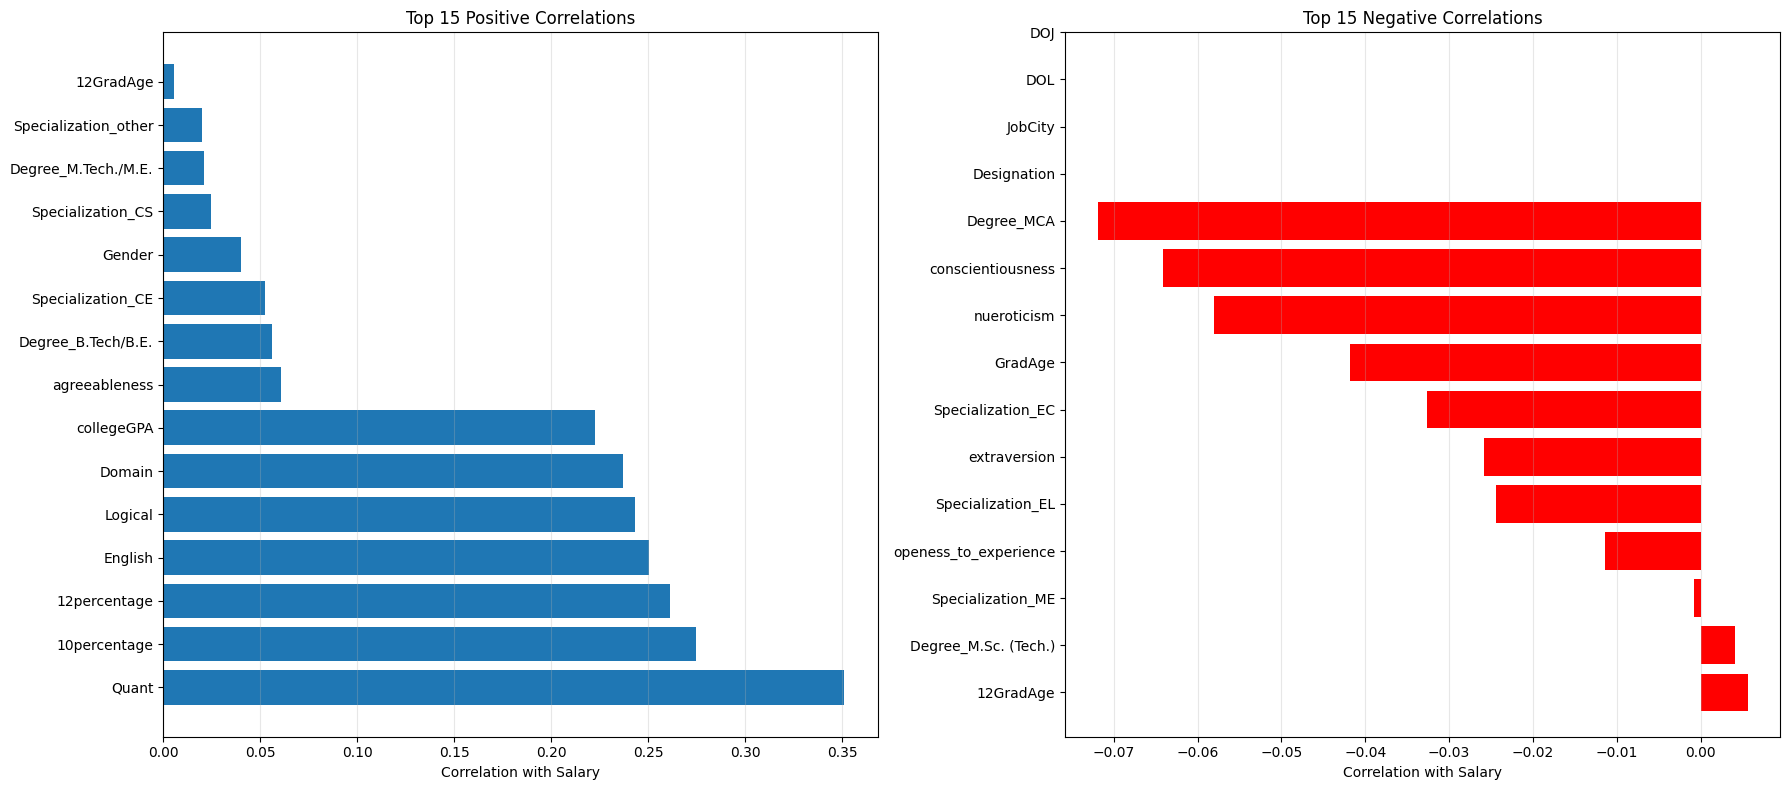


Correlation Heatmap


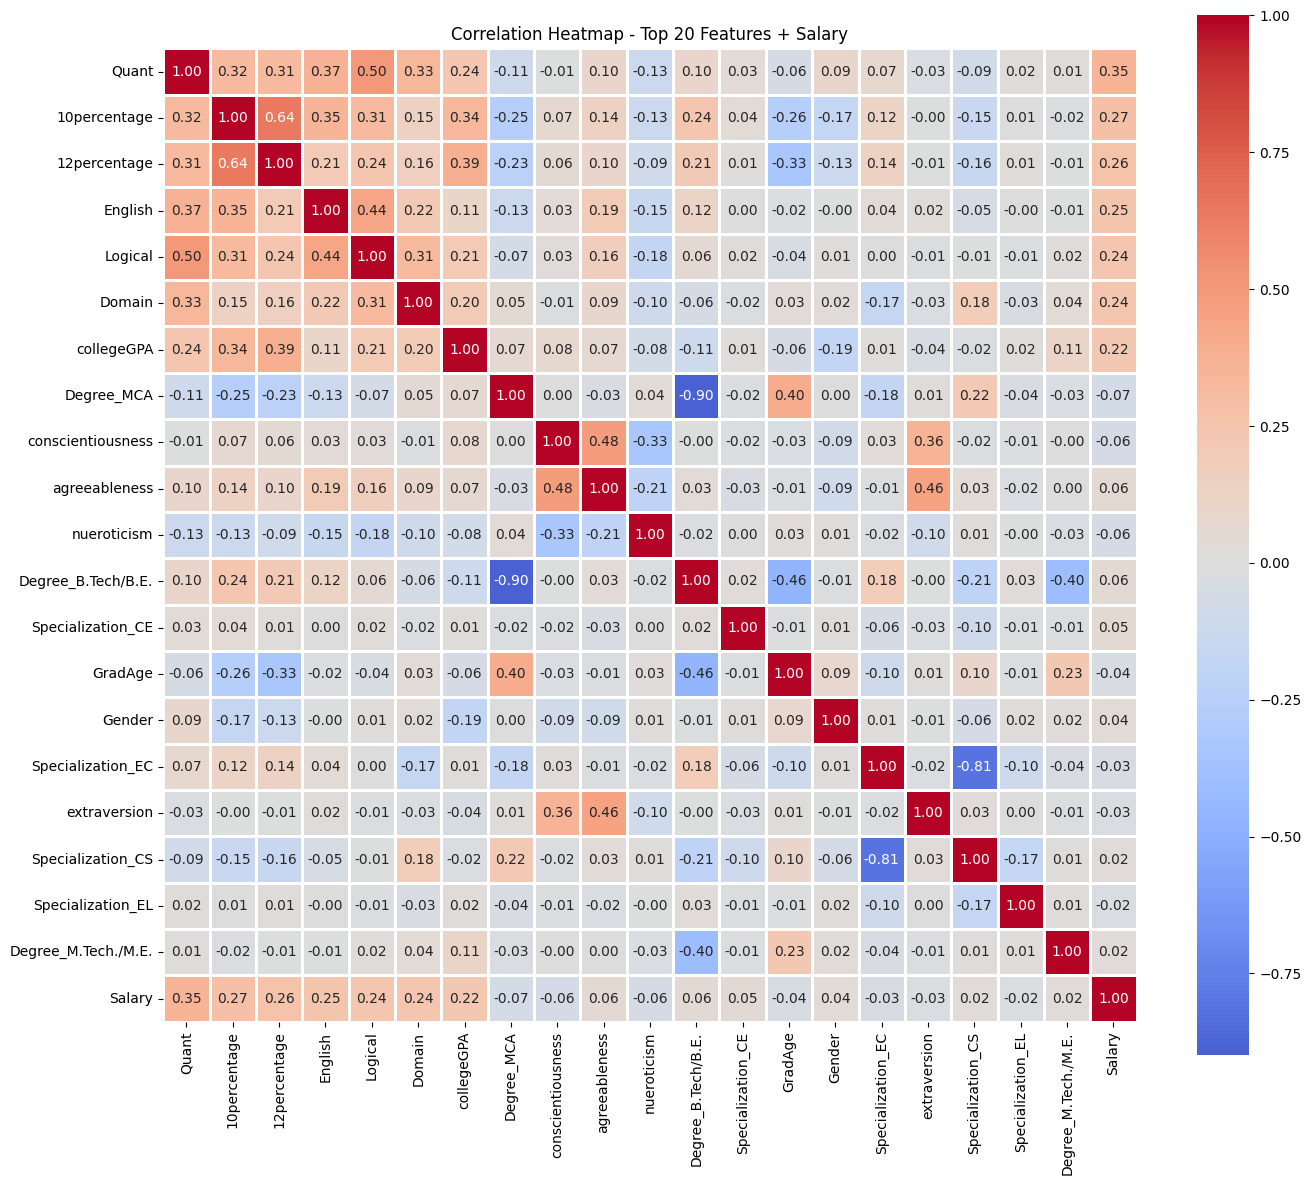


5.2 Feature Engineering - Creating New Features

Original numerical features for engineering: ['10percentage', '12percentage', 'collegeGPA', 'English', 'Logical', 'Quant', 'Domain', 'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience', '12GradAge', 'GradAge']
Created: Academic_Score (avg of 10th, 12th, college GPA)
Created: Test_Score (avg of English, Logical, Quant)
Created: Overall_Performance (combined academic, test, domain)
Created: Personality_Score (avg of personality traits)
Created: Squared features for ['collegeGPA', 'Domain', 'English', 'Logical', 'Quant']
Created: Interaction features for 4 pairs
Created: Early_Graduate (binary indicator)

Total features after engineering: 43
New features created: 14

Correlation of New Features with Salary

New features correlation with Salary:
Overall_Performance            0.401895
Test_Score                     0.356147
Academic_Score                 0.316625
Early_Graduate                 0.0473

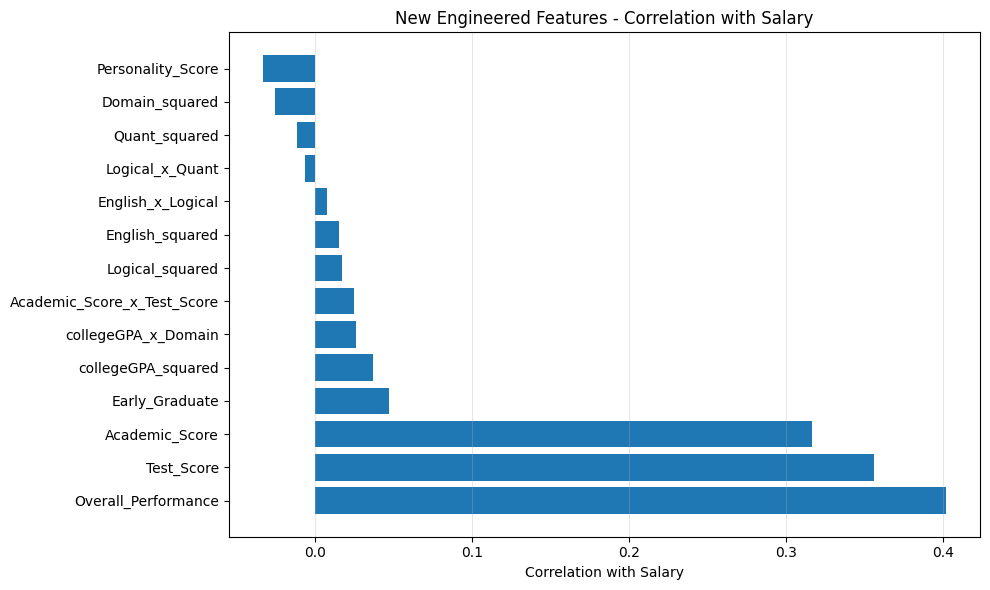


5.3 Feature Selection using Statistical Methods

--------------------------------------------------------------------------------
Method 1: SelectKBest (F-statistic)
--------------------------------------------------------------------------------

Top 20 features by F-statistic:
                Feature     F_Score
31  Overall_Performance  762.827991
30           Test_Score  575.254053
6                 Quant  556.407515
29       Academic_Score  441.229032
1          10percentage  322.609055
2          12percentage  290.461351
4               English  264.598801
5               Logical  249.497747
7                Domain  236.142433
3            collegeGPA  206.894767
18           Degree_MCA   20.586830
8     conscientiousness   16.355659
9         agreeableness   14.578843
11          nueroticism   13.356732
15   Degree_B.Tech/B.E.   12.505459
19    Specialization_CE   11.037186
42       Early_Graduate    8.898242
14              GradAge    6.924861
0                Gender    6.319549

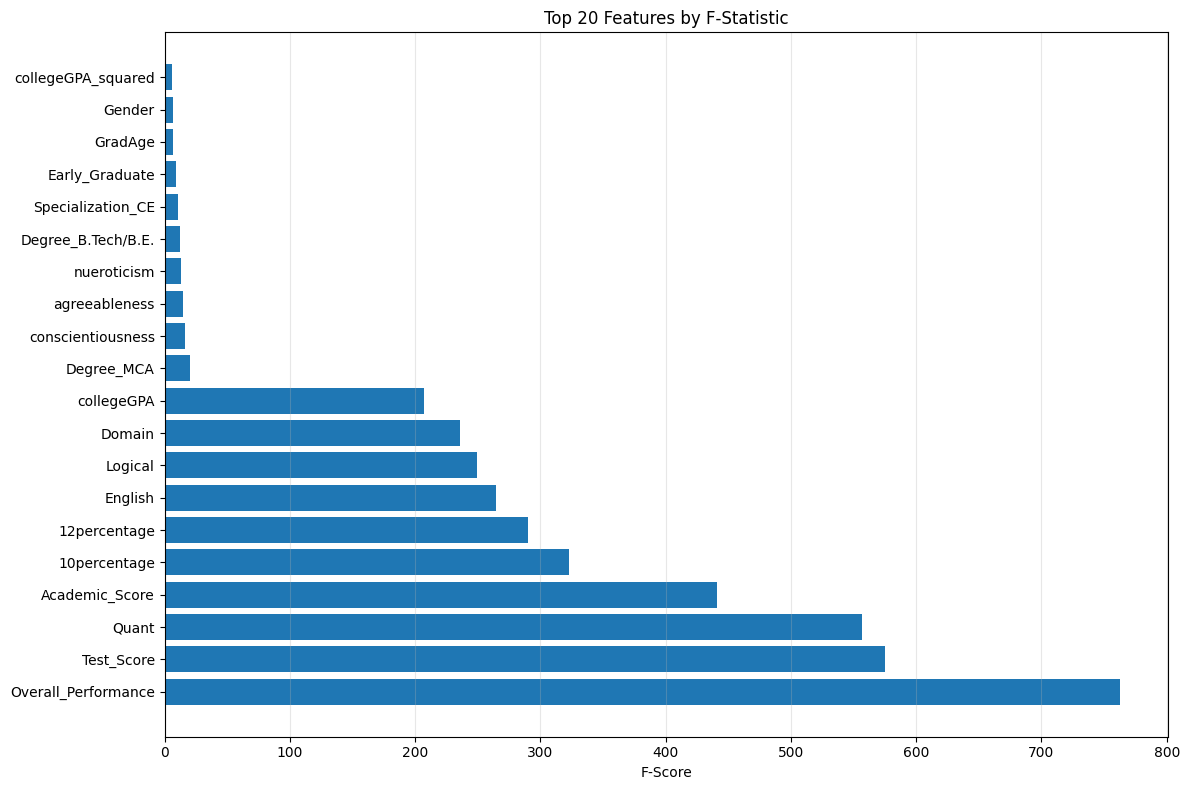


--------------------------------------------------------------------------------
Method 2: Mutual Information
--------------------------------------------------------------------------------

Top 20 features by Mutual Information:
                        Feature  MI_Score
6                         Quant  0.116807
31          Overall_Performance  0.107290
30                   Test_Score  0.096881
4                       English  0.081574
7                        Domain  0.065289
29               Academic_Score  0.064715
1                  10percentage  0.059767
2                  12percentage  0.058356
9                 agreeableness  0.056122
35              English_squared  0.056023
10                 extraversion  0.055833
12        openess_to_experience  0.053701
5                       Logical  0.044859
11                  nueroticism  0.040922
36              Logical_squared  0.039471
37                Quant_squared  0.037659
34               Domain_squared  0.033901
3           

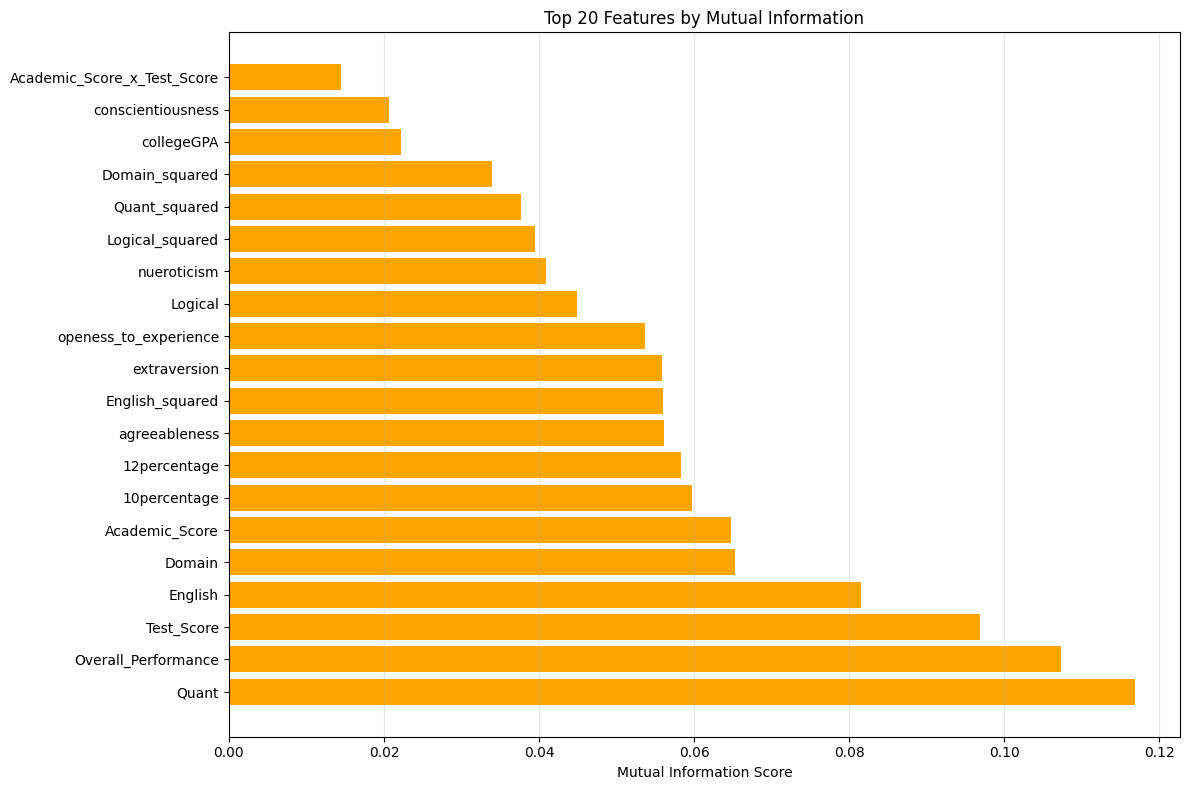


--------------------------------------------------------------------------------
Method 3: Random Forest Feature Importance
--------------------------------------------------------------------------------

Top 20 features by Random Forest Importance:
                        Feature  Importance
31          Overall_Performance    0.201258
2                  12percentage    0.040301
8             conscientiousness    0.038999
10                 extraversion    0.037561
11                  nueroticism    0.036823
41  Academic_Score_x_Test_Score    0.036753
1                  10percentage    0.036400
38          collegeGPA_x_Domain    0.035421
12        openess_to_experience    0.034337
6                         Quant    0.033874
29               Academic_Score    0.033752
40              Logical_x_Quant    0.032856
32            Personality_Score    0.032716
30                   Test_Score    0.032110
39            English_x_Logical    0.032017
9                 agreeableness    0.031572


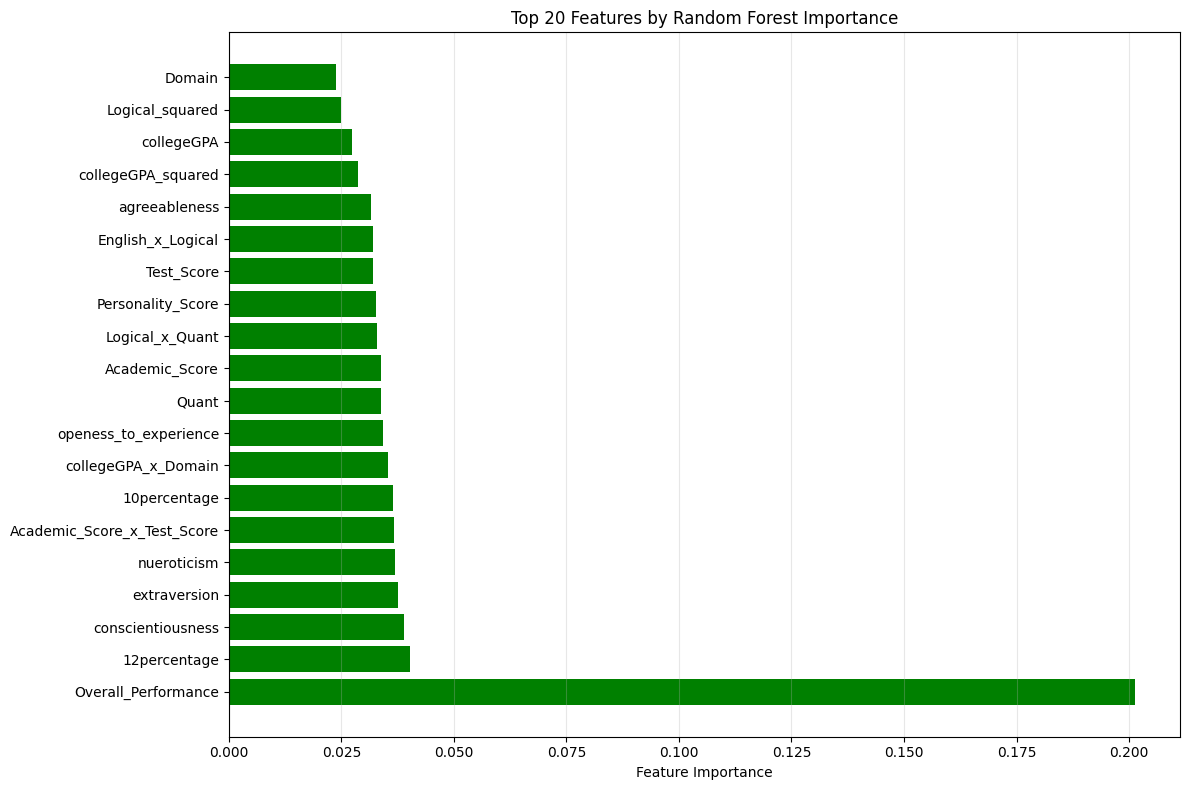


--------------------------------------------------------------------------------
Method 4: Recursive Feature Elimination (RFE)
--------------------------------------------------------------------------------

Top 30 features selected by RFE:
                        Feature  Ranking  Selected
0                        Gender        1      True
1                  10percentage        1      True
2                  12percentage        1      True
3                    collegeGPA        1      True
4                       English        1      True
5                       Logical        1      True
6                         Quant        1      True
7                        Domain        1      True
8             conscientiousness        1      True
9                 agreeableness        1      True
14                      GradAge        1      True
15           Degree_B.Tech/B.E.        1      True
19            Specialization_CE        1      True
18                   Degree_MCA        1   

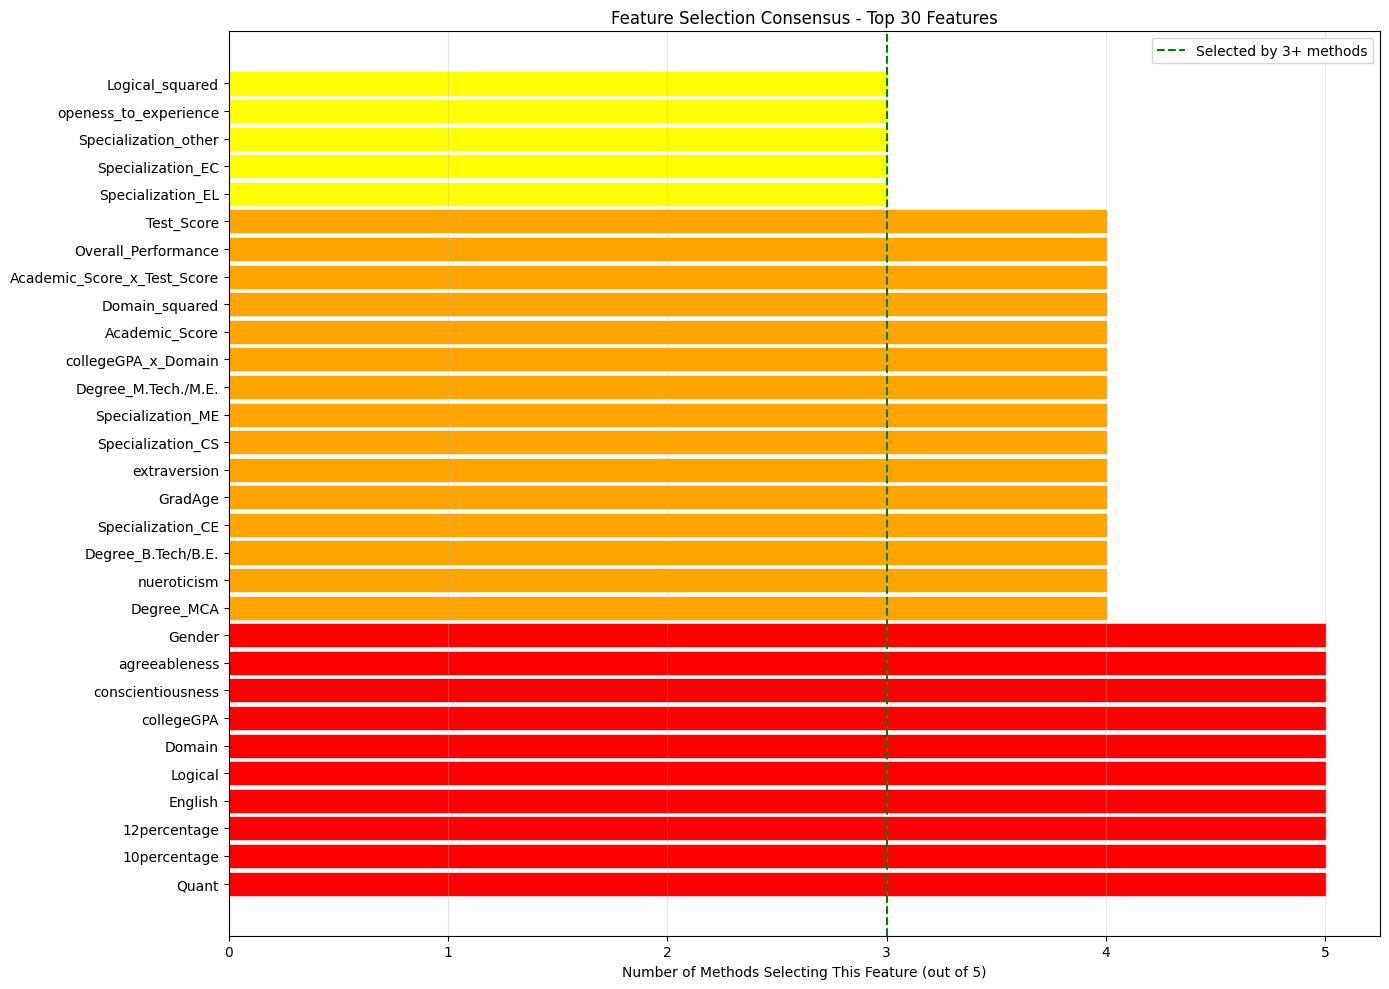


FINAL SELECTED FEATURES

Number of features selected (appearing in 3+ methods): 31

Selected features:
 1. Quant                                    (votes: 5)
 2. 10percentage                             (votes: 5)
 3. 12percentage                             (votes: 5)
 4. English                                  (votes: 5)
 5. Logical                                  (votes: 5)
 6. Domain                                   (votes: 5)
 7. collegeGPA                               (votes: 5)
 8. conscientiousness                        (votes: 5)
 9. agreeableness                            (votes: 5)
10. Gender                                   (votes: 5)
11. Degree_MCA                               (votes: 4)
12. nueroticism                              (votes: 4)
13. Degree_B.Tech/B.E.                       (votes: 4)
14. Specialization_CE                        (votes: 4)
15. GradAge                                  (votes: 4)
16. extraversion                             (votes: 4)


In [ ]:
### 5. Feature Selection

print("="*80)
print("5. FEATURE SELECTION")
print("="*80)

# ============================================================================
# 5.1 Correlation Analysis
# ============================================================================

print("\n" + "="*80)
print("5.1 Correlation Analysis with Target Variable (Salary)")
print("="*80)

# Combine features and target for correlation analysis
train_with_target = X_train_scaled.copy()
train_with_target['Salary'] = y_train

# Calculate correlation with Salary
correlations = train_with_target.corr()['Salary'].sort_values(ascending=False)

# Remove Salary itself
correlations = correlations.drop('Salary')

print("\nTop 20 Features with Highest Positive Correlation with Salary:")
print(correlations.head(20))

print("\nTop 10 Features with Highest Negative Correlation with Salary:")
print(correlations.tail(10))

# Visualize correlation
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Top positive correlations
top_positive = correlations.head(15)
axes[0].barh(range(len(top_positive)), top_positive.values)
axes[0].set_yticks(range(len(top_positive)))
axes[0].set_yticklabels(top_positive.index)
axes[0].set_xlabel('Correlation with Salary')
axes[0].set_title('Top 15 Positive Correlations')
axes[0].grid(axis='x', alpha=0.3)

# Top negative correlations
top_negative = correlations.tail(15)
axes[1].barh(range(len(top_negative)), top_negative.values, color='red')
axes[1].set_yticks(range(len(top_negative)))
axes[1].set_yticklabels(top_negative.index)
axes[1].set_xlabel('Correlation with Salary')
axes[1].set_title('Top 15 Negative Correlations')
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

# Full correlation heatmap (top features only for readability)
print("\n" + "="*80)
print("Correlation Heatmap")
print("="*80)

# Select top correlated features for heatmap
top_features = correlations.abs().nlargest(20).index.tolist()
top_features.append('Salary')

plt.figure(figsize=(14, 12))
sns.heatmap(train_with_target[top_features].corr(),
            annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=1)
plt.title('Correlation Heatmap - Top 20 Features + Salary')
plt.tight_layout()
plt.show()

# ============================================================================
# 5.2 Feature Engineering - Create New Features
# ============================================================================

print("\n" + "="*80)
print("5.2 Feature Engineering - Creating New Features")
print("="*80)

# Create copies for feature engineering
X_train_engineered = X_train_scaled.copy()
X_test_engineered = X_test_scaled.copy()

# Get original numerical columns (non-encoded)
original_numerical = ['10percentage', '12percentage', 'collegeGPA',
                      'English', 'Logical', 'Quant', 'Domain',
                      'conscientiousness', 'agreeableness', 'extraversion',
                      'nueroticism', 'openess_to_experience',
                      '12GradAge', 'GradAge']

# Filter to only include columns that exist
original_numerical = [col for col in original_numerical if col in X_train_scaled.columns]

print(f"\nOriginal numerical features for engineering: {original_numerical}")

# 1. Academic Performance Score (combined academic metrics)
if all(col in X_train_engineered.columns for col in ['10percentage', '12percentage', 'collegeGPA']):
    X_train_engineered['Academic_Score'] = (
        X_train_engineered['10percentage'] +
        X_train_engineered['12percentage'] +
        X_train_engineered['collegeGPA']
    ) / 3
    X_test_engineered['Academic_Score'] = (
        X_test_engineered['10percentage'] +
        X_test_engineered['12percentage'] +
        X_test_engineered['collegeGPA']
    ) / 3
    print("Created: Academic_Score (avg of 10th, 12th, college GPA)")

# 2. Test Performance Score (combined test scores)
if all(col in X_train_engineered.columns for col in ['English', 'Logical', 'Quant']):
    X_train_engineered['Test_Score'] = (
        X_train_engineered['English'] +
        X_train_engineered['Logical'] +
        X_train_engineered['Quant']
    ) / 3
    X_test_engineered['Test_Score'] = (
        X_test_engineered['English'] +
        X_test_engineered['Logical'] +
        X_test_engineered['Quant']
    ) / 3
    print("Created: Test_Score (avg of English, Logical, Quant)")

# 3. Overall Performance (Academic + Test + Domain)
if all(col in X_train_engineered.columns for col in ['Academic_Score', 'Test_Score', 'Domain']):
    X_train_engineered['Overall_Performance'] = (
        X_train_engineered['Academic_Score'] +
        X_train_engineered['Test_Score'] +
        X_train_engineered['Domain']
    ) / 3
    X_test_engineered['Overall_Performance'] = (
        X_test_engineered['Academic_Score'] +
        X_test_engineered['Test_Score'] +
        X_test_engineered['Domain']
    ) / 3
    print("Created: Overall_Performance (combined academic, test, domain)")

# 4. Personality Score (Big Five traits)
personality_traits = ['conscientiousness', 'agreeableness', 'extraversion',
                      'nueroticism', 'openess_to_experience']
personality_traits = [col for col in personality_traits if col in X_train_engineered.columns]
if personality_traits:
    X_train_engineered['Personality_Score'] = X_train_engineered[personality_traits].mean(axis=1)
    X_test_engineered['Personality_Score'] = X_test_engineered[personality_traits].mean(axis=1)
    print("Created: Personality_Score (avg of personality traits)")

# 5. Square of important features (non-linear relationships)
square_features = ['collegeGPA', 'Domain', 'English', 'Logical', 'Quant']
square_features = [col for col in square_features if col in X_train_engineered.columns]
for col in square_features:
    X_train_engineered[f'{col}_squared'] = X_train_engineered[col] ** 2
    X_test_engineered[f'{col}_squared'] = X_test_engineered[col] ** 2
print(f"Created: Squared features for {square_features}")

# 6. Interaction features (multiplication of important pairs)
interactions = [
    ('collegeGPA', 'Domain'),
    ('English', 'Logical'),
    ('Logical', 'Quant'),
    ('Academic_Score', 'Test_Score') if 'Academic_Score' in X_train_engineered.columns else None
]
interactions = [i for i in interactions if i and all(col in X_train_engineered.columns for col in i)]

for feat1, feat2 in interactions:
    feature_name = f'{feat1}_x_{feat2}'
    X_train_engineered[feature_name] = X_train_engineered[feat1] * X_train_engineered[feat2]
    X_test_engineered[feature_name] = X_test_engineered[feat1] * X_test_engineered[feat2]
print(f"Created: Interaction features for {len(interactions)} pairs")

# 7. Age-related features
if 'GradAge' in X_train_engineered.columns:
    # Is the candidate younger than average graduation age?
    avg_grad_age = X_train_engineered['GradAge'].mean()
    X_train_engineered['Early_Graduate'] = (X_train_engineered['GradAge'] < avg_grad_age).astype(int)
    X_test_engineered['Early_Graduate'] = (X_test_engineered['GradAge'] < avg_grad_age).astype(int)
    print("Created: Early_Graduate (binary indicator)")

print(f"\nTotal features after engineering: {X_train_engineered.shape[1]}")
print(f"New features created: {X_train_engineered.shape[1] - X_train_scaled.shape[1]}")

# Check correlations of new features
print("\n" + "="*80)
print("Correlation of New Features with Salary")
print("="*80)

new_features = [col for col in X_train_engineered.columns if col not in X_train_scaled.columns]
if new_features:
    train_with_new = X_train_engineered.copy()
    train_with_new['Salary'] = y_train
    new_correlations = train_with_new[new_features + ['Salary']].corr()['Salary'].drop('Salary').sort_values(ascending=False)
    print("\nNew features correlation with Salary:")
    print(new_correlations)

    # Visualize
    plt.figure(figsize=(10, 6))
    plt.barh(range(len(new_correlations)), new_correlations.values)
    plt.yticks(range(len(new_correlations)), new_correlations.index)
    plt.xlabel('Correlation with Salary')
    plt.title('New Engineered Features - Correlation with Salary')
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()

# ============================================================================
# 5.3 Feature Selection using Sci-Kit Learn Methods
# ============================================================================

print("\n" + "="*80)
print("5.3 Feature Selection using Statistical Methods")
print("="*80)

from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
from sklearn.feature_selection import RFE, RFECV
from sklearn.ensemble import RandomForestRegressor

# Method 1: SelectKBest with f_regression
print("\n" + "-"*80)
print("Method 1: SelectKBest (F-statistic)")
print("-"*80)

selector_f = SelectKBest(score_func=f_regression, k=30)
selector_f.fit(X_train_engineered, y_train)

# Get feature scores
feature_scores_f = pd.DataFrame({
    'Feature': X_train_engineered.columns,
    'F_Score': selector_f.scores_
}).sort_values('F_Score', ascending=False)

print("\nTop 20 features by F-statistic:")
print(feature_scores_f.head(20))

# Visualize
plt.figure(figsize=(12, 8))
top_20_f = feature_scores_f.head(20)
plt.barh(range(len(top_20_f)), top_20_f['F_Score'].values)
plt.yticks(range(len(top_20_f)), top_20_f['Feature'].values)
plt.xlabel('F-Score')
plt.title('Top 20 Features by F-Statistic')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# Method 2: Mutual Information
print("\n" + "-"*80)
print("Method 2: Mutual Information")
print("-"*80)

mi_scores = mutual_info_regression(X_train_engineered, y_train, random_state=42)
feature_scores_mi = pd.DataFrame({
    'Feature': X_train_engineered.columns,
    'MI_Score': mi_scores
}).sort_values('MI_Score', ascending=False)

print("\nTop 20 features by Mutual Information:")
print(feature_scores_mi.head(20))

# Visualize
plt.figure(figsize=(12, 8))
top_20_mi = feature_scores_mi.head(20)
plt.barh(range(len(top_20_mi)), top_20_mi['MI_Score'].values, color='orange')
plt.yticks(range(len(top_20_mi)), top_20_mi['Feature'].values)
plt.xlabel('Mutual Information Score')
plt.title('Top 20 Features by Mutual Information')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# Method 3: Random Forest Feature Importance
print("\n" + "-"*80)
print("Method 3: Random Forest Feature Importance")
print("-"*80)

rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train_engineered, y_train)

feature_importance_rf = pd.DataFrame({
    'Feature': X_train_engineered.columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nTop 20 features by Random Forest Importance:")
print(feature_importance_rf.head(20))

# Visualize
plt.figure(figsize=(12, 8))
top_20_rf = feature_importance_rf.head(20)
plt.barh(range(len(top_20_rf)), top_20_rf['Importance'].values, color='green')
plt.yticks(range(len(top_20_rf)), top_20_rf['Feature'].values)
plt.xlabel('Feature Importance')
plt.title('Top 20 Features by Random Forest Importance')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# Method 4: Recursive Feature Elimination (RFE)
print("\n" + "-"*80)
print("Method 4: Recursive Feature Elimination (RFE)")
print("-"*80)

# Use a simpler model for RFE due to computational cost
from sklearn.linear_model import Ridge

estimator = Ridge(alpha=1.0)
rfe = RFE(estimator=estimator, n_features_to_select=30, step=5)
rfe.fit(X_train_engineered, y_train)

feature_ranking_rfe = pd.DataFrame({
    'Feature': X_train_engineered.columns,
    'Ranking': rfe.ranking_,
    'Selected': rfe.support_
}).sort_values('Ranking')

print("\nTop 30 features selected by RFE:")
print(feature_ranking_rfe[feature_ranking_rfe['Selected'] == True])

# ============================================================================
# 5.4 Combine All Methods - Consensus Features
# ============================================================================

print("\n" + "="*80)
print("5.4 Feature Selection Consensus")
print("="*80)

# Get top 30 features from each method
top_30_corr = correlations.abs().nlargest(30).index.tolist()
top_30_f = feature_scores_f.head(30)['Feature'].tolist()
top_30_mi = feature_scores_mi.head(30)['Feature'].tolist()
top_30_rf = feature_importance_rf.head(30)['Feature'].tolist()
top_30_rfe = feature_ranking_rfe[feature_ranking_rfe['Selected'] == True]['Feature'].tolist()

# Count how many times each feature appears in top selections
from collections import Counter

all_top_features = top_30_corr + top_30_f + top_30_mi + top_30_rf + top_30_rfe
feature_votes = Counter(all_top_features)

consensus_features = pd.DataFrame({
    'Feature': list(feature_votes.keys()),
    'Votes': list(feature_votes.values())
}).sort_values('Votes', ascending=False)

print("\nFeature Selection Consensus (appearing in multiple methods):")
print(consensus_features.head(40))

# Visualize consensus
plt.figure(figsize=(14, 10))
top_consensus = consensus_features.head(30)
bars = plt.barh(range(len(top_consensus)), top_consensus['Votes'].values)

# Color code by number of votes
colors = ['red' if v == 5 else 'orange' if v == 4 else 'yellow' if v == 3 else 'lightblue' for v in top_consensus['Votes'].values]
for bar, color in zip(bars, colors):
    bar.set_color(color)

plt.yticks(range(len(top_consensus)), top_consensus['Feature'].values)
plt.xlabel('Number of Methods Selecting This Feature (out of 5)')
plt.title('Feature Selection Consensus - Top 30 Features')
plt.grid(axis='x', alpha=0.3)
plt.axvline(x=3, color='green', linestyle='--', label='Selected by 3+ methods')
plt.legend()
plt.tight_layout()
plt.show()

# Select features that appear in at least 3 methods
selected_features = consensus_features[consensus_features['Votes'] >= 3]['Feature'].tolist()

print(f"\n" + "="*80)
print("FINAL SELECTED FEATURES")
print("="*80)

print(f"\nNumber of features selected (appearing in 3+ methods): {len(selected_features)}")
print("\nSelected features:")
for i, feat in enumerate(selected_features, 1):
    votes = consensus_features[consensus_features['Feature'] == feat]['Votes'].values[0]
    print(f"{i:2d}. {feat:40s} (votes: {votes})")

# Create final datasets with selected features
X_train_selected = X_train_engineered[selected_features].copy()
X_test_selected = X_test_engineered[selected_features].copy()

print(f"\nFinal dataset shapes:")
print(f"  X_train_selected: {X_train_selected.shape}")
print(f"  X_test_selected: {X_test_selected.shape}")
print(f"  y_train: {y_train.shape}")

# ============================================================================
# 5.5 Best Predictors Summary Report
# ============================================================================

print("\n" + "="*80)
print("⭐ BEST PREDICTORS OF FIRST JOB SALARY - SUMMARY REPORT ⭐")
print("="*80)

# Get top 10 most important features across all methods
top_predictors = consensus_features.head(10)

print("\nTop 10 Best Predictors (ranked by consensus):\n")
for idx, row in top_predictors.iterrows():
    feature = row['Feature']
    votes = row['Votes']

    # Get scores from different methods
    corr_val = correlations.get(feature, 0)
    f_score = feature_scores_f[feature_scores_f['Feature'] == feature]['F_Score'].values
    f_score = f_score[0] if len(f_score) > 0 else 0
    mi_score = feature_scores_mi[feature_scores_mi['Feature'] == feature]['MI_Score'].values
    mi_score = mi_score[0] if len(mi_score) > 0 else 0
    rf_imp = feature_importance_rf[feature_importance_rf['Feature'] == feature]['Importance'].values
    rf_imp = rf_imp[0] if len(rf_imp) > 0 else 0

    print(f"{feature}")
    print(f"  Consensus Votes: {votes}/5 methods")
    print(f"  Correlation: {corr_val:.4f}")
    print(f"  F-Score: {f_score:.2f}")
    print(f"  MI Score: {mi_score:.4f}")
    print(f"  RF Importance: {rf_imp:.4f}")
    print()

print("="*80)
print("Feature Selection Complete!")
print("="*80)

6. MODEL SELECTION - MLP REGRESSOR (OPTIMIZED)

6.0 Data Preparation

Current data shapes:
  X_train_selected: (3962, 31)
  y_train: (3962,)
  X_test_selected: (1500, 31) (no labels - for final predictions)

Splitting training data into train (80%) and validation (20%) sets...

After split:
  Training set: (3169, 31)
  Validation set: (793, 31)
  Training target: (3169,)
  Validation target: (793,)

6.1 Baseline MLP Model (Default Parameters)

Training baseline model...

Baseline Model Performance:
  Training time: 10.94 seconds
  Train RMSE: 214,482.65
  Validation RMSE: 224,034.89
  Train R²: -1.3676
  Validation R²: -1.2469
  Number of iterations: 1000

6.2 Optimized MLP Model

Using optimized hyperparameters based on best practices:
  Hidden layers: (100, 50)
  Activation: relu
  Solver: adam
  Alpha (L2): 0.001
  Learning rate init: 0.001
  Max iterations: 1000
  Early stopping: True

Training optimized model...

Optimized Model Performance:
  Training time: 11.23 seconds
  Train 

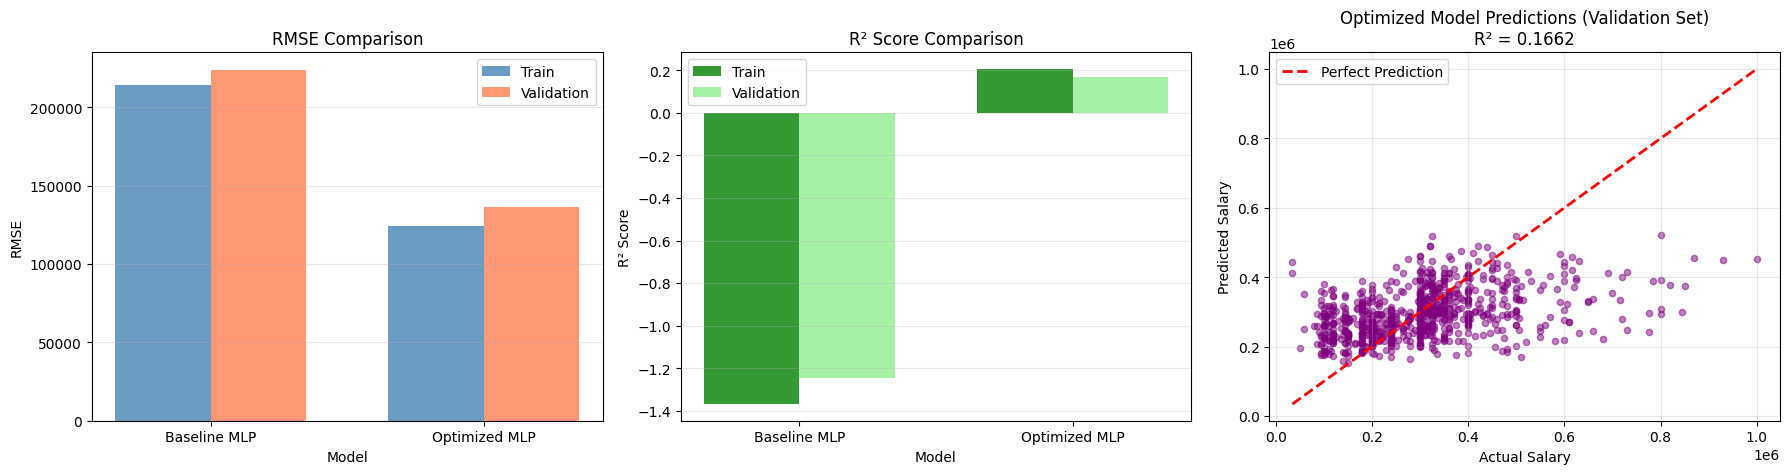


6.4 Learning Curves - Optimized Model

Early stopping triggered at iteration 429
Best validation score: 0.1272


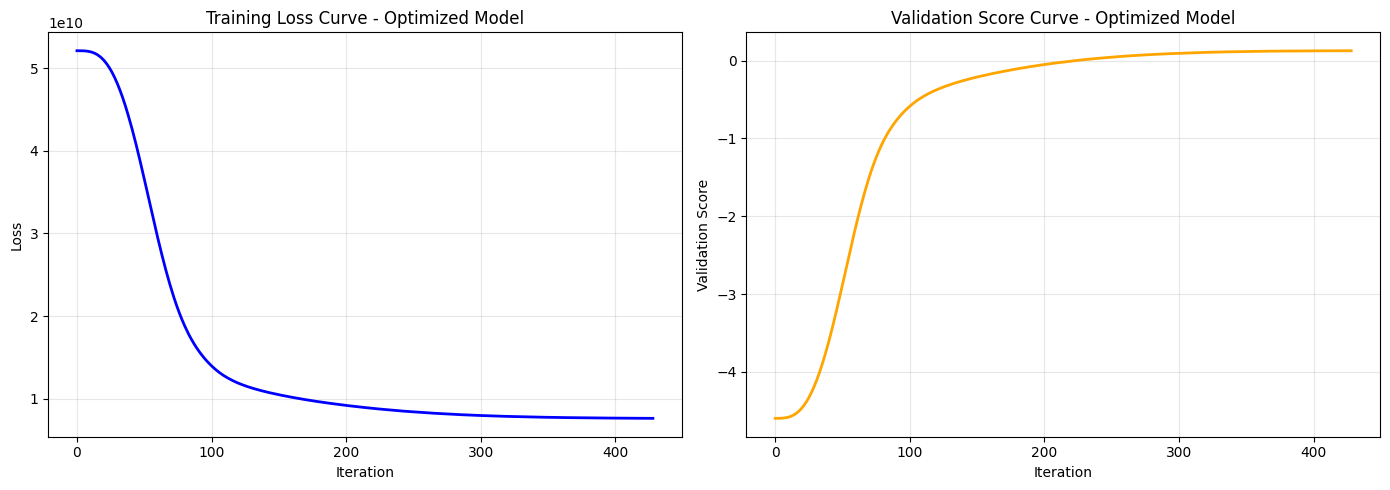


Training converged after 429 iterations

6.5 Cross-Validation Analysis

Performing 5-fold cross-validation on full training data...
This will take a few minutes...

5-Fold Cross-Validation Results:
  Time taken: 30.37 seconds
  Mean RMSE: 127,896.77
  Std RMSE: 2,584.05
  Min RMSE: 124,187.31
  Max RMSE: 131,780.05

Individual fold scores:
  Fold 1: 124,187.31
  Fold 2: 126,109.96
  Fold 3: 128,540.32
  Fold 4: 128,866.20
  Fold 5: 131,780.05


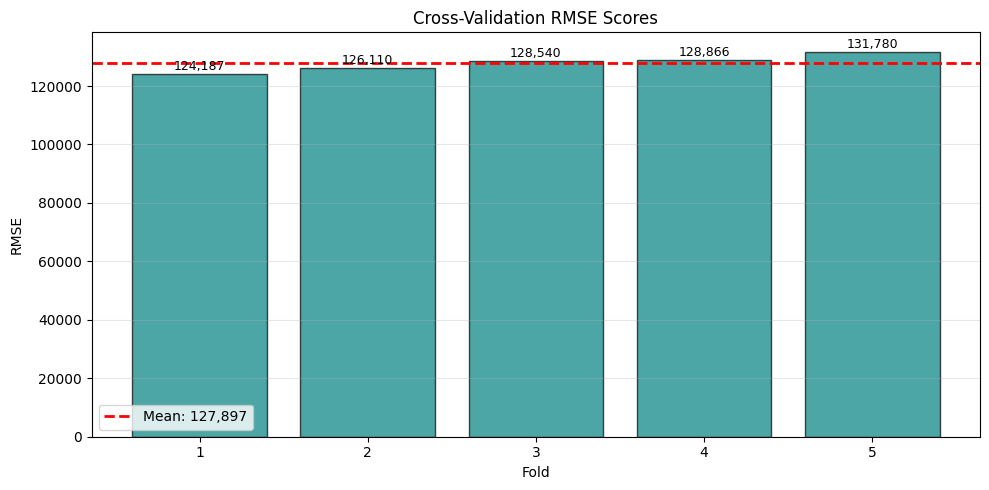


6.6 Training Final Model on Full Training Data

Retraining optimized model on full training data for final predictions...

Final Model Training:
  Training time: 8.79 seconds
  Iterations: 279

Final Model Performance on Full Training Data:
  Train RMSE: 127,838.57
  Train MAE: 97,245.84
  Train R²: 0.1841

6.7 Making Predictions on Test Set

Test set predictions generated!
Number of predictions: 1500

Prediction statistics:
  Min: ₹135,942.92
  Max: ₹550,901.09
  Mean: ₹293,084.79
  Median: ₹286,662.29
  Std Dev: ₹66,744.35

Sample predictions (first 10):
  Test ID 0: ₹259,071.14
  Test ID 1: ₹337,026.97
  Test ID 2: ₹493,428.57
  Test ID 3: ₹260,649.85
  Test ID 4: ₹303,326.77
  Test ID 5: ₹374,800.07
  Test ID 6: ₹294,312.23
  Test ID 7: ₹236,102.16
  Test ID 8: ₹325,785.26
  Test ID 9: ₹251,779.31


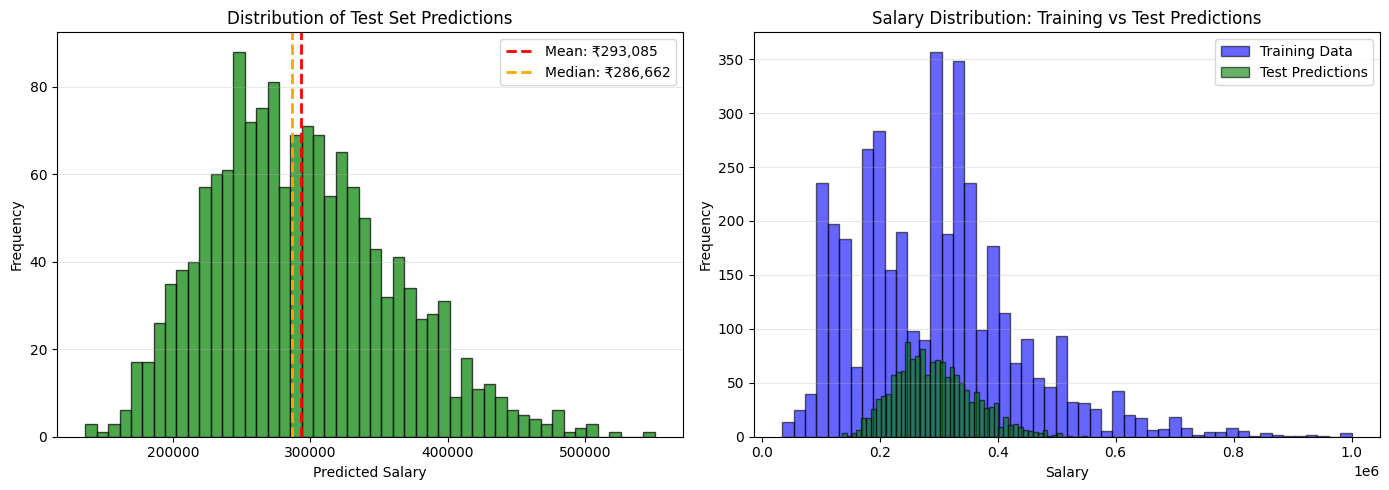


6.8 Residual Analysis

Residual Statistics:
  Mean: ₹7,135.84
  Std Dev: ₹136,373.12
  Min: ₹-408,716.10
  Max: ₹547,227.91


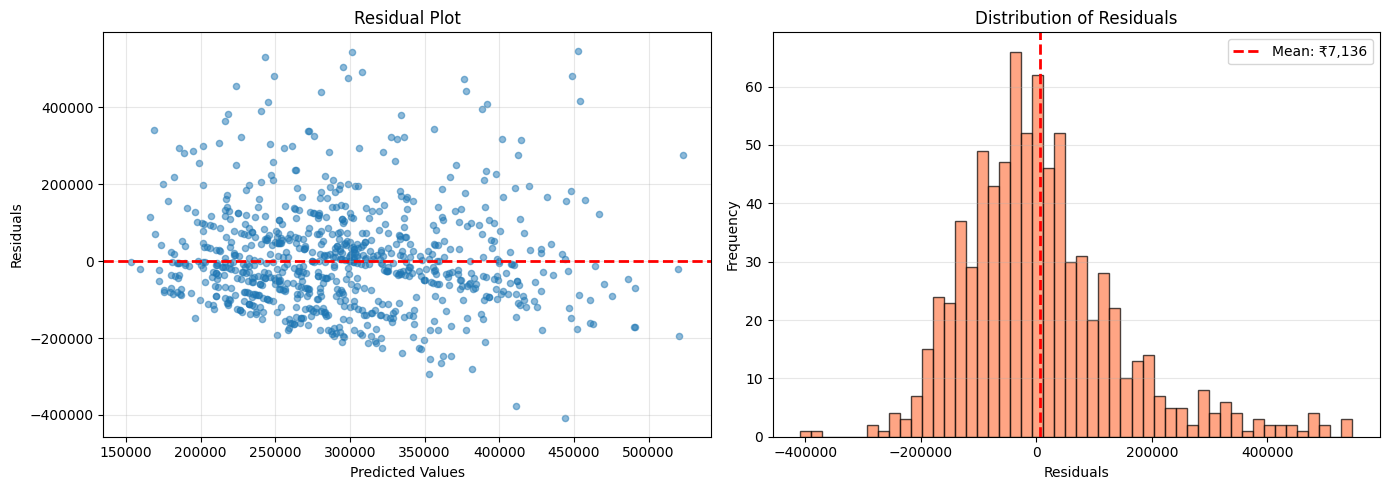


⭐ FINAL MODEL SUMMARY ⭐

Model Architecture:
  Hidden Layers: (100, 50)
  Activation: relu
  Solver: adam
  Alpha (L2 regularization): 0.001
  Learning Rate: constant
  Learning Rate Init: 0.001
  Max Iterations: 1000
  Actual Iterations: 279
  Early Stopping: True

Performance Metrics:
  Validation RMSE: 136,473.79
  Validation MAE: 100,021.51
  Validation R²: 0.1662
  CV Mean RMSE: 127,896.77 (±2,584.05)
  Full Training RMSE: 127,838.57
  Full Training R²: 0.1841

Model Complexity:
  Total parameters: 8,150
  Number of layers: 3
    Layer 1: 31 → 100 (3,100 params)
    Layer 2: 100 → 50 (5,000 params)
    Layer 3: 50 → 1 (50 params)

Dataset Information:
  Training samples: 3962
  Validation samples: 793
  Test samples: 1500
  Number of features: 31

Training Time Summary:
  Baseline model: 10.94s
  Optimized model: 11.23s
  Cross-validation: 30.37s
  Final model: 8.79s
  Total time: 61.33s

✅ Model Training Complete!

Final outputs available:
  final_model: Best trained MLPRegresso

In [ ]:
### 6. Model Selection and Training - OPTIMIZED VERSION

print("="*80)
print("6. MODEL SELECTION - MLP REGRESSOR (OPTIMIZED)")
print("="*80)

from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

# ============================================================================
# 6.0 Data Preparation - Split into Train/Validation Sets
# ============================================================================

print("\n" + "="*80)
print("6.0 Data Preparation")
print("="*80)

print("\nCurrent data shapes:")
print(f"  X_train_selected: {X_train_selected.shape}")
print(f"  y_train: {y_train.shape}")
print(f"  X_test_selected: {X_test_selected.shape} (no labels - for final predictions)")

# Split training data into train and validation sets
print("\nSplitting training data into train (80%) and validation (20%) sets...")
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train_selected, y_train,
    test_size=0.2,
    random_state=42
)

print(f"\nAfter split:")
print(f"  Training set: {X_train_split.shape}")
print(f"  Validation set: {X_val_split.shape}")
print(f"  Training target: {y_train_split.shape}")
print(f"  Validation target: {y_val_split.shape}")

# ============================================================================
# 6.1 Baseline MLP Model
# ============================================================================

print("\n" + "="*80)
print("6.1 Baseline MLP Model (Default Parameters)")
print("="*80)

# Create baseline model with default parameters
baseline_mlp = MLPRegressor(random_state=42, max_iter=1000)

# Train and evaluate
print("\nTraining baseline model...")
start_time = time.time()
baseline_mlp.fit(X_train_split, y_train_split)
baseline_time = time.time() - start_time

# Predictions
y_train_pred_baseline = baseline_mlp.predict(X_train_split)
y_val_pred_baseline = baseline_mlp.predict(X_val_split)

# Evaluate
train_rmse_baseline = np.sqrt(mean_squared_error(y_train_split, y_train_pred_baseline))
val_rmse_baseline = np.sqrt(mean_squared_error(y_val_split, y_val_pred_baseline))
train_r2_baseline = r2_score(y_train_split, y_train_pred_baseline)
val_r2_baseline = r2_score(y_val_split, y_val_pred_baseline)

print(f"\nBaseline Model Performance:")
print(f"  Training time: {baseline_time:.2f} seconds")
print(f"  Train RMSE: {train_rmse_baseline:,.2f}")
print(f"  Validation RMSE: {val_rmse_baseline:,.2f}")
print(f"  Train R²: {train_r2_baseline:.4f}")
print(f"  Validation R²: {val_r2_baseline:.4f}")
print(f"  Number of iterations: {baseline_mlp.n_iter_}")

# ============================================================================
# 6.2 Optimized MLP Model with Best Practices
# ============================================================================

print("\n" + "="*80)
print("6.2 Optimized MLP Model")
print("="*80)

print("\nUsing optimized hyperparameters based on best practices:")
print("  Hidden layers: (100, 50)")
print("  Activation: relu")
print("  Solver: adam")
print("  Alpha (L2): 0.001")
print("  Learning rate init: 0.001")
print("  Max iterations: 1000")
print("  Early stopping: True")

# Create optimized model
optimized_mlp = MLPRegressor(
    hidden_layer_sizes=(100, 50),
    activation='relu',
    solver='adam',
    alpha=0.001,
    learning_rate_init=0.001,
    max_iter=1000,
    early_stopping=True,
    random_state=42,
    verbose=False
)

# Train and evaluate
print("\nTraining optimized model...")
start_time = time.time()
optimized_mlp.fit(X_train_split, y_train_split)
optimized_time = time.time() - start_time

# Predictions
y_train_pred_optimized = optimized_mlp.predict(X_train_split)
y_val_pred_optimized = optimized_mlp.predict(X_val_split)

# Evaluate
train_rmse_optimized = np.sqrt(mean_squared_error(y_train_split, y_train_pred_optimized))
val_rmse_optimized = np.sqrt(mean_squared_error(y_val_split, y_val_pred_optimized))
train_mae_optimized = mean_absolute_error(y_train_split, y_train_pred_optimized)
val_mae_optimized = mean_absolute_error(y_val_split, y_val_pred_optimized)
train_r2_optimized = r2_score(y_train_split, y_train_pred_optimized)
val_r2_optimized = r2_score(y_val_split, y_val_pred_optimized)

print(f"\nOptimized Model Performance:")
print(f"  Training time: {optimized_time:.2f} seconds")
print(f"  Train RMSE: {train_rmse_optimized:,.2f}")
print(f"  Validation RMSE: {val_rmse_optimized:,.2f}")
print(f"  Train MAE: {train_mae_optimized:,.2f}")
print(f"  Validation MAE: {val_mae_optimized:,.2f}")
print(f"  Train R²: {train_r2_optimized:.4f}")
print(f"  Validation R²: {val_r2_optimized:.4f}")
print(f"  Number of iterations: {optimized_mlp.n_iter_}")

# ============================================================================
# 6.3 Model Comparison
# ============================================================================

print("\n" + "="*80)
print("6.3 Model Comparison Summary")
print("="*80)

# Create comparison DataFrame
comparison_df = pd.DataFrame({
    'Model': ['Baseline MLP', 'Optimized MLP'],
    'Train RMSE': [train_rmse_baseline, train_rmse_optimized],
    'Val RMSE': [val_rmse_baseline, val_rmse_optimized],
    'Train R²': [train_r2_baseline, train_r2_optimized],
    'Val R²': [val_r2_baseline, val_r2_optimized],
    'Training Time (s)': [baseline_time, optimized_time]
})

print("\nModel Performance Comparison:")
print(comparison_df.to_string(index=False))

# Calculate improvements
print("\n" + "-"*80)
print("Improvements over Baseline:")
print("-"*80)
rmse_improvement = ((val_rmse_baseline - val_rmse_optimized) / val_rmse_baseline * 100)
r2_improvement = ((val_r2_optimized - val_r2_baseline) / abs(val_r2_baseline) * 100) if val_r2_baseline != 0 else 0

print(f"  Val RMSE improvement: {rmse_improvement:.2f}%")
print(f"  Val R² improvement: {r2_improvement:.2f}%")

# Visualize comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. RMSE Comparison
x = range(len(comparison_df))
width = 0.35
axes[0].bar([i - width/2 for i in x], comparison_df['Train RMSE'],
            width, label='Train', alpha=0.8, color='steelblue')
axes[0].bar([i + width/2 for i in x], comparison_df['Val RMSE'],
            width, label='Validation', alpha=0.8, color='coral')
axes[0].set_xlabel('Model')
axes[0].set_ylabel('RMSE')
axes[0].set_title('RMSE Comparison')
axes[0].set_xticks(x)
axes[0].set_xticklabels(comparison_df['Model'])
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# 2. R² Comparison
axes[1].bar([i - width/2 for i in x], comparison_df['Train R²'],
            width, label='Train', alpha=0.8, color='green')
axes[1].bar([i + width/2 for i in x], comparison_df['Val R²'],
            width, label='Validation', alpha=0.8, color='lightgreen')
axes[1].set_xlabel('Model')
axes[1].set_ylabel('R² Score')
axes[1].set_title('R² Score Comparison')
axes[1].set_xticks(x)
axes[1].set_xticklabels(comparison_df['Model'])
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

# 3. Predictions scatter plot (optimized model)
axes[2].scatter(y_val_split, y_val_pred_optimized, alpha=0.5, s=20, color='purple')
axes[2].plot([y_val_split.min(), y_val_split.max()],
             [y_val_split.min(), y_val_split.max()],
             'r--', lw=2, label='Perfect Prediction')
axes[2].set_xlabel('Actual Salary')
axes[2].set_ylabel('Predicted Salary')
axes[2].set_title(f'Optimized Model Predictions (Validation Set)\nR² = {val_r2_optimized:.4f}')
axes[2].legend()
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================================================
# 6.4 Learning Curves for Optimized Model
# ============================================================================

print("\n" + "="*80)
print("6.4 Learning Curves - Optimized Model")
print("="*80)

# Get loss curve from optimized model
if hasattr(optimized_mlp, 'loss_curve_'):
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Training loss curve
    axes[0].plot(optimized_mlp.loss_curve_, linewidth=2, color='blue')
    axes[0].set_xlabel('Iteration')
    axes[0].set_ylabel('Loss')
    axes[0].set_title('Training Loss Curve - Optimized Model')
    axes[0].grid(alpha=0.3)

    # Validation curve if early stopping was used
    if hasattr(optimized_mlp, 'validation_scores_'):
        axes[1].plot(optimized_mlp.validation_scores_, linewidth=2, color='orange')
        axes[1].set_xlabel('Iteration')
        axes[1].set_ylabel('Validation Score')
        axes[1].set_title('Validation Score Curve - Optimized Model')
        axes[1].grid(alpha=0.3)

        print(f"\nEarly stopping triggered at iteration {optimized_mlp.n_iter_}")
        print(f"Best validation score: {max(optimized_mlp.validation_scores_):.4f}")
    else:
        axes[1].text(0.5, 0.5, 'Validation scores not available\n(early_stopping=True but not triggered)',
                    ha='center', va='center', transform=axes[1].transAxes)
        axes[1].set_title('Validation Score Curve')

    plt.tight_layout()
    plt.show()

    print(f"\nTraining converged after {optimized_mlp.n_iter_} iterations")
else:
    print("\nLoss curve not available for this model configuration")

# ============================================================================
# 6.5 Cross-Validation Analysis
# ============================================================================

print("\n" + "="*80)
print("6.5 Cross-Validation Analysis")
print("="*80)

# Perform cross-validation on optimized model using full training data
print("\nPerforming 5-fold cross-validation on full training data...")
print("This will take a few minutes...")

cv_start = time.time()
cv_scores = cross_val_score(
    optimized_mlp, X_train_selected, y_train,
    cv=5, scoring='neg_mean_squared_error', n_jobs=-1
)
cv_time = time.time() - cv_start

cv_rmse_scores = np.sqrt(-cv_scores)

print(f"\n5-Fold Cross-Validation Results:")
print(f"  Time taken: {cv_time:.2f} seconds")
print(f"  Mean RMSE: {cv_rmse_scores.mean():,.2f}")
print(f"  Std RMSE: {cv_rmse_scores.std():,.2f}")
print(f"  Min RMSE: {cv_rmse_scores.min():,.2f}")
print(f"  Max RMSE: {cv_rmse_scores.max():,.2f}")

print(f"\nIndividual fold scores:")
for i, score in enumerate(cv_rmse_scores, 1):
    print(f"  Fold {i}: {score:,.2f}")

# Visualize CV scores
plt.figure(figsize=(10, 5))
bars = plt.bar(range(1, 6), cv_rmse_scores, alpha=0.7, edgecolor='black', color='teal')
plt.axhline(y=cv_rmse_scores.mean(), color='r', linestyle='--', linewidth=2,
            label=f'Mean: {cv_rmse_scores.mean():,.0f}')
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.title('Cross-Validation RMSE Scores')
plt.legend()
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, (bar, score) in enumerate(zip(bars, cv_rmse_scores)):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + cv_rmse_scores.std()*0.1,
             f'{score:,.0f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# ============================================================================
# 6.6 Final Model Training on Full Data
# ============================================================================

print("\n" + "="*80)
print("6.6 Training Final Model on Full Training Data")
print("="*80)

# Train the optimized model on the FULL training data
print("\nRetraining optimized model on full training data for final predictions...")

final_model = MLPRegressor(
    hidden_layer_sizes=(100, 50),
    activation='relu',
    solver='adam',
    alpha=0.001,
    learning_rate_init=0.001,
    max_iter=1000,
    early_stopping=True,
    random_state=42,
    verbose=False
)

start_time = time.time()
final_model.fit(X_train_selected, y_train)
final_training_time = time.time() - start_time

# Evaluate on full training data
y_train_final_pred = final_model.predict(X_train_selected)
train_rmse_final = np.sqrt(mean_squared_error(y_train, y_train_final_pred))
train_mae_final = mean_absolute_error(y_train, y_train_final_pred)
train_r2_final = r2_score(y_train, y_train_final_pred)

print(f"\nFinal Model Training:")
print(f"  Training time: {final_training_time:.2f} seconds")
print(f"  Iterations: {final_model.n_iter_}")

print(f"\nFinal Model Performance on Full Training Data:")
print(f"  Train RMSE: {train_rmse_final:,.2f}")
print(f"  Train MAE: {train_mae_final:,.2f}")
print(f"  Train R²: {train_r2_final:.4f}")

# ============================================================================
# 6.7 Make Predictions on Test Set
# ============================================================================

print("\n" + "="*80)
print("6.7 Making Predictions on Test Set")
print("="*80)

# Make predictions on the test set
test_predictions = final_model.predict(X_test_selected)

print(f"\nTest set predictions generated!")
print(f"Number of predictions: {len(test_predictions)}")
print(f"\nPrediction statistics:")
print(f"  Min: ₹{test_predictions.min():,.2f}")
print(f"  Max: ₹{test_predictions.max():,.2f}")
print(f"  Mean: ₹{test_predictions.mean():,.2f}")
print(f"  Median: ₹{np.median(test_predictions):,.2f}")
print(f"  Std Dev: ₹{test_predictions.std():,.2f}")

# Show sample predictions
print(f"\nSample predictions (first 10):")
for i in range(min(10, len(test_predictions))):
    print(f"  Test ID {i}: ₹{test_predictions[i]:,.2f}")

# Visualize prediction distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Test predictions distribution
axes[0].hist(test_predictions, bins=50, edgecolor='black', alpha=0.7, color='green')
axes[0].axvline(test_predictions.mean(), color='red', linestyle='--', linewidth=2,
                label=f'Mean: ₹{test_predictions.mean():,.0f}')
axes[0].axvline(np.median(test_predictions), color='orange', linestyle='--', linewidth=2,
                label=f'Median: ₹{np.median(test_predictions):,.0f}')
axes[0].set_xlabel('Predicted Salary')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Test Set Predictions')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Training vs Test predictions comparison
axes[1].hist(y_train, bins=50, edgecolor='black', alpha=0.6, label='Training Data', color='blue')
axes[1].hist(test_predictions, bins=50, edgecolor='black', alpha=0.6, label='Test Predictions', color='green')
axes[1].set_xlabel('Salary')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Salary Distribution: Training vs Test Predictions')
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================================================
# 6.8 Residual Analysis
# ============================================================================

print("\n" + "="*80)
print("6.8 Residual Analysis")
print("="*80)

# Calculate residuals on validation set
residuals = y_val_split - y_val_pred_optimized

print(f"\nResidual Statistics:")
print(f"  Mean: ₹{residuals.mean():,.2f}")
print(f"  Std Dev: ₹{residuals.std():,.2f}")
print(f"  Min: ₹{residuals.min():,.2f}")
print(f"  Max: ₹{residuals.max():,.2f}")

# Visualize residuals
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Residual plot
axes[0].scatter(y_val_pred_optimized, residuals, alpha=0.5, s=20)
axes[0].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0].set_xlabel('Predicted Values')
axes[0].set_ylabel('Residuals')
axes[0].set_title('Residual Plot')
axes[0].grid(alpha=0.3)

# Residual distribution
axes[1].hist(residuals, bins=50, edgecolor='black', alpha=0.7, color='coral')
axes[1].axvline(residuals.mean(), color='red', linestyle='--', linewidth=2,
                label=f'Mean: ₹{residuals.mean():,.0f}')
axes[1].set_xlabel('Residuals')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Residuals')
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================================================
# 6.9 Final Model Summary
# ============================================================================

print("\n" + "="*80)
print("⭐ FINAL MODEL SUMMARY ⭐")
print("="*80)

print("\nModel Architecture:")
print(f"  Hidden Layers: {final_model.hidden_layer_sizes}")
print(f"  Activation: {final_model.activation}")
print(f"  Solver: {final_model.solver}")
print(f"  Alpha (L2 regularization): {final_model.alpha}")
print(f"  Learning Rate: constant")
print(f"  Learning Rate Init: {final_model.learning_rate_init}")
print(f"  Max Iterations: {final_model.max_iter}")
print(f"  Actual Iterations: {final_model.n_iter_}")
print(f"  Early Stopping: {final_model.early_stopping}")

print("\nPerformance Metrics:")
print(f"  Validation RMSE: {val_rmse_optimized:,.2f}")
print(f"  Validation MAE: {val_mae_optimized:,.2f}")
print(f"  Validation R²: {val_r2_optimized:.4f}")
print(f"  CV Mean RMSE: {cv_rmse_scores.mean():,.2f} (±{cv_rmse_scores.std():,.2f})")
print(f"  Full Training RMSE: {train_rmse_final:,.2f}")
print(f"  Full Training R²: {train_r2_final:.4f}")

print("\nModel Complexity:")
total_params = sum([np.prod(layer.shape) for layer in final_model.coefs_])
print(f"  Total parameters: {total_params:,}")
print(f"  Number of layers: {len(final_model.coefs_)}")
for i, layer in enumerate(final_model.coefs_):
    print(f"    Layer {i+1}: {layer.shape[0]} → {layer.shape[1]} ({np.prod(layer.shape):,} params)")

print("\nDataset Information:")
print(f"  Training samples: {X_train_selected.shape[0]}")
print(f"  Validation samples: {X_val_split.shape[0]}")
print(f"  Test samples: {X_test_selected.shape[0]}")
print(f"  Number of features: {X_train_selected.shape[1]}")

print("\nTraining Time Summary:")
print(f"  Baseline model: {baseline_time:.2f}s")
print(f"  Optimized model: {optimized_time:.2f}s")
print(f"  Cross-validation: {cv_time:.2f}s")
print(f"  Final model: {final_training_time:.2f}s")
print(f"  Total time: {baseline_time + optimized_time + cv_time + final_training_time:.2f}s")

print("\n" + "="*80)
print("✅ Model Training Complete!")
print("="*80)

# Store the final model and predictions for later use
print("\nFinal outputs available:")
print(f"  final_model: Best trained MLPRegressor")
print(f"  test_predictions: Predictions for test set (shape: {test_predictions.shape})")
print(f"  comparison_df: Performance comparison DataFrame")
print(f"  cv_rmse_scores: Cross-validation RMSE scores")

7. TRAIN AND EVALUATE REGRESSION MODELS

7.1 Split Data into Training and Validation Sets

Original data shapes:
  X_train_selected: (3962, 31)
  y_train: (3962,)
  X_test_selected: (1500, 31)

Splitting training data: 80% train, 20% validation...

After split:
  Training set:
    X_train_split: (3169, 31)
    y_train_split: (3169,)
  Validation set:
    X_val_split: (793, 31)
    y_val_split: (793,)

Target variable statistics:
  Training set:
    Mean: ₹292,143.89
    Median: ₹300,000.00
    Std Dev: ₹139,415.49
    Min: ₹35,000.00
    Max: ₹1,000,000.00

  Validation set:
    Mean: ₹302,976.04
    Median: ₹300,000.00
    Std Dev: ₹149,553.53
    Min: ₹35,000.00
    Max: ₹1,000,000.00

7.2 Train MLPRegressor Model

Initializing MLPRegressor with optimized hyperparameters:
  hidden_layer_sizes: (100, 50)
  activation: relu
  solver: adam
  alpha: 0.001
  learning_rate_init: 0.001
  max_iter: 1000
  early_stopping: True
  random_state: 42

Training the model...

✓ Model training comple

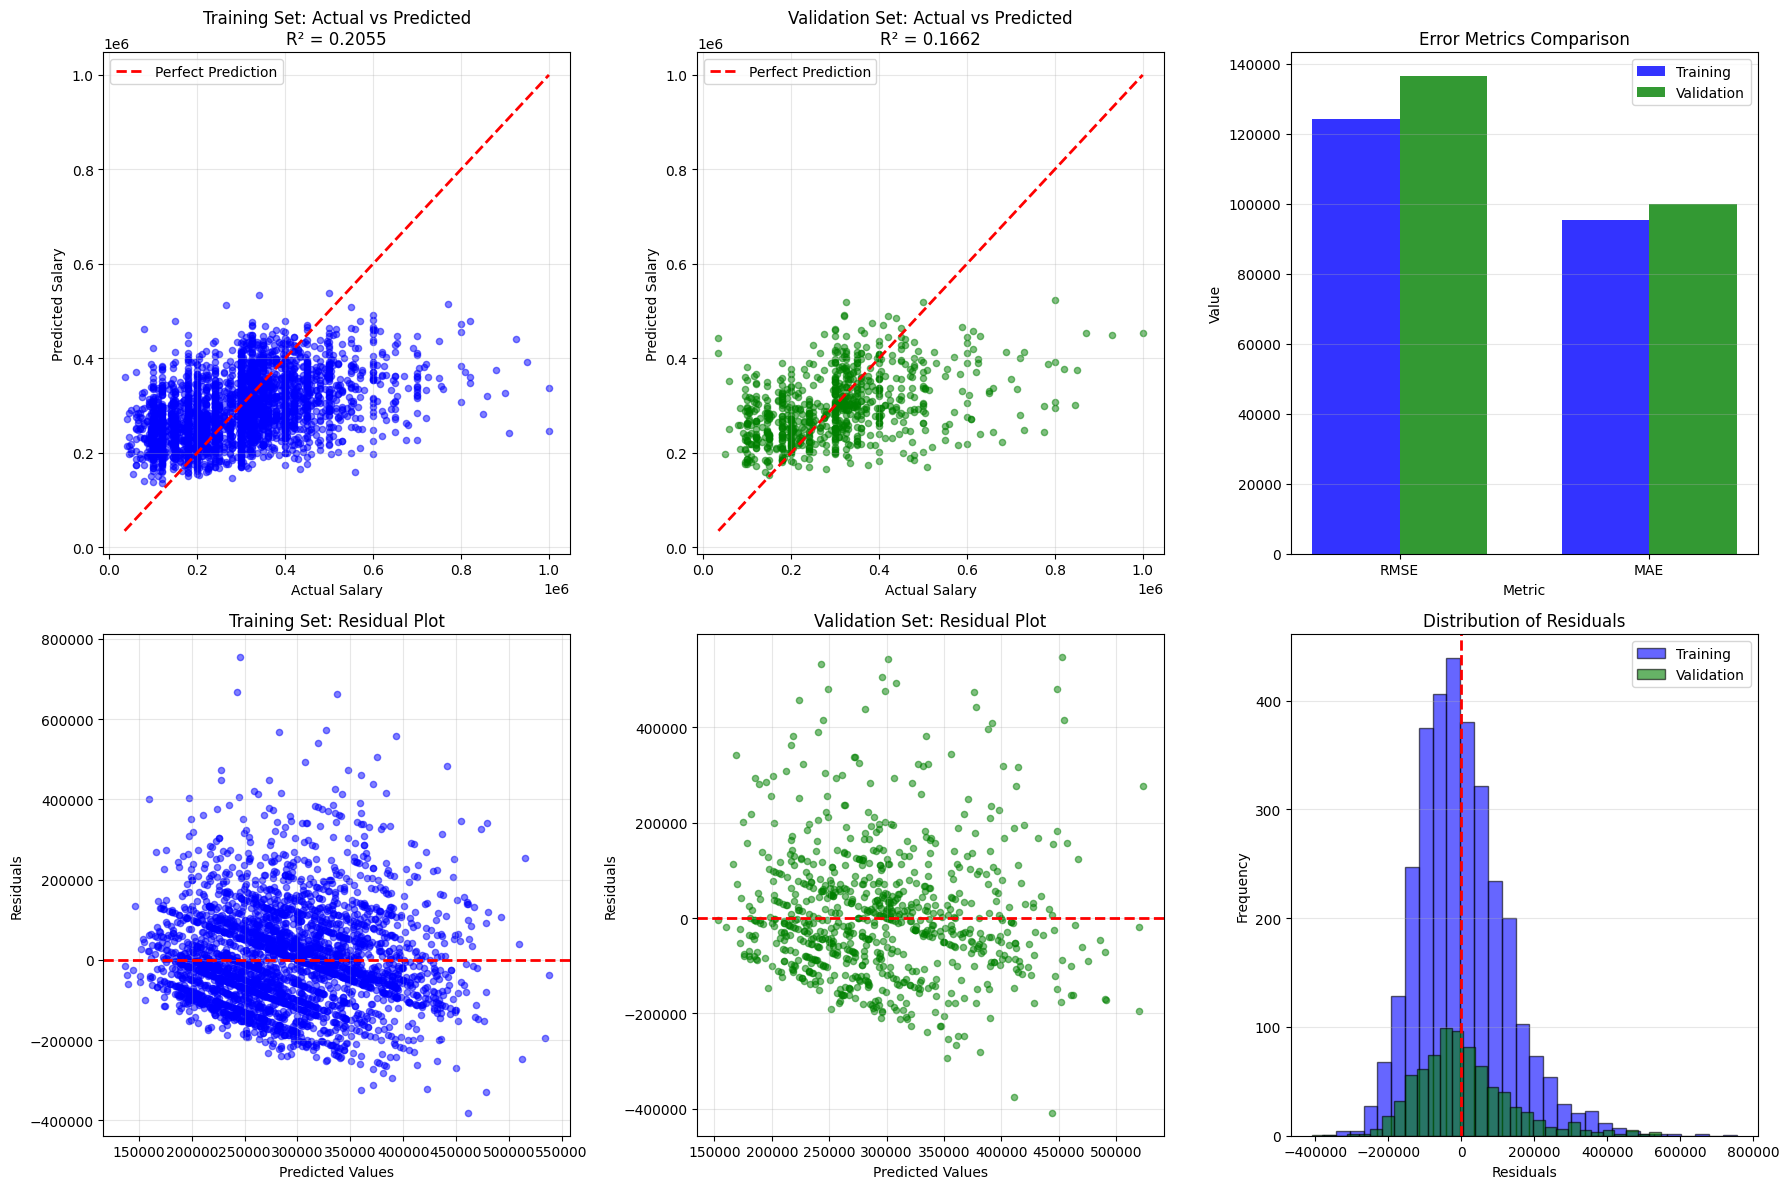

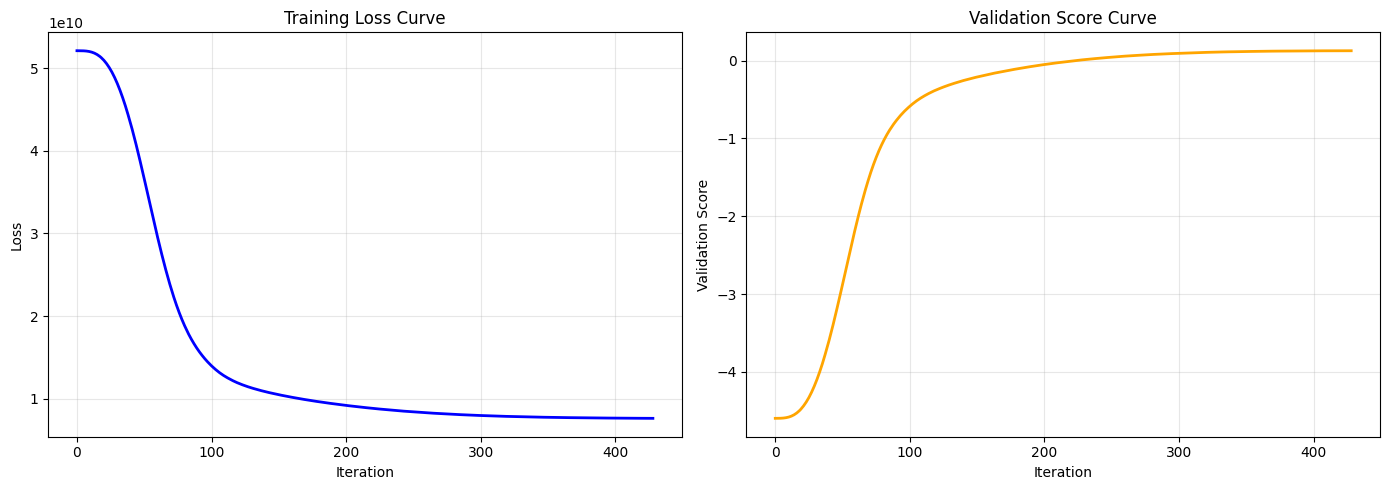


7.4 Test the Model on Unseen Data

Making predictions on test set...

✓ Test predictions complete!
  Number of predictions: 1500

Test Predictions Statistics:
  Mean:   ₹293,453.36
  Median: ₹287,982.90
  Std:    ₹66,794.67
  Min:    ₹137,363.89
  Max:    ₹568,189.23

Comparison with Training Data:
  Training Mean:   ₹294,311.96
  Test Pred Mean:  ₹293,453.36
  Difference:      ₹858.60

--------------------------------------------------------------------------------
SAMPLE PREDICTIONS FROM TEST SET
--------------------------------------------------------------------------------

Showing 10 random samples from test set:

Index    Predicted Salary    
------------------------------
138      ₹        245,089.39
258      ₹        228,069.50
337      ₹        207,978.79
503      ₹        453,560.69
663      ₹        237,180.57
807      ₹        305,499.96
931      ₹        321,442.18
1027     ₹        290,636.46
1161     ₹        410,866.20
1167     ₹        355,690.65

-------------------

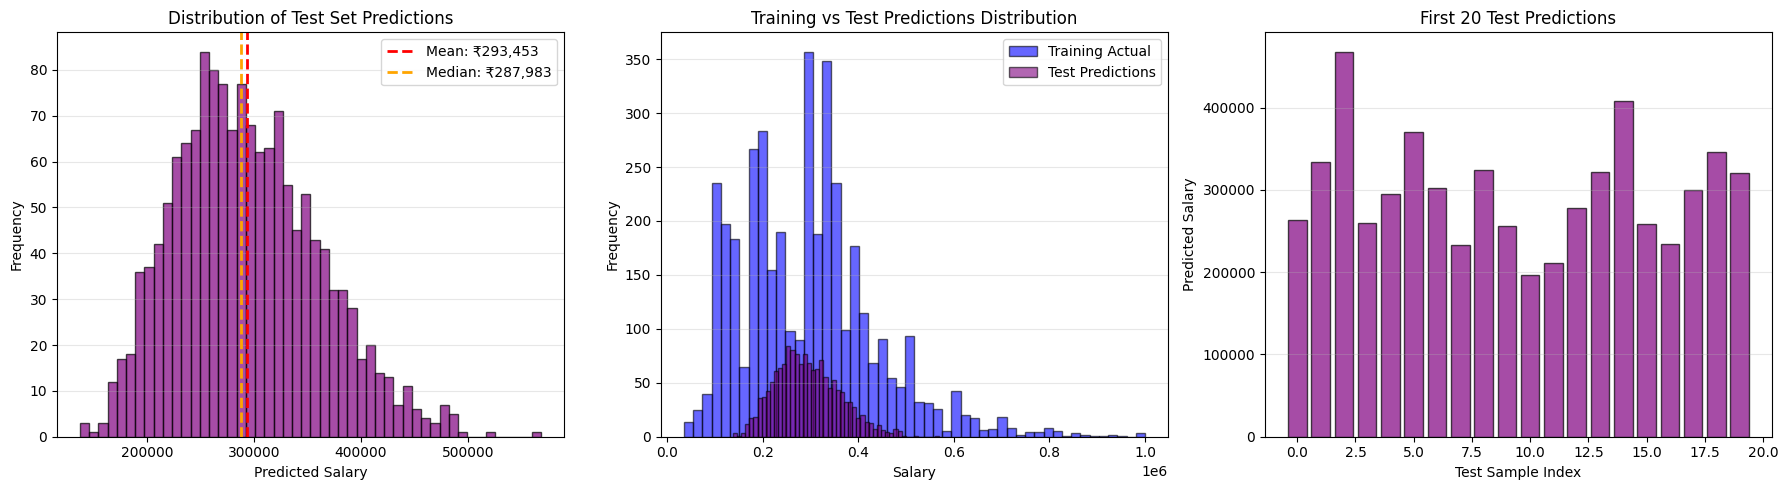


⭐ MODEL EVALUATION SUMMARY ⭐

📊 MODEL CONFIGURATION:
  Architecture: (100, 50)
  Total Parameters: 8,301
  Training Time: 33.01 seconds
  Iterations: 429

📈 PERFORMANCE METRICS:
  Training Set:
    • RMSE: ₹124,248.63
    • MAE:  ₹95,253.66
    • R²:   0.2055
    • MAPE: 44.42%

  Validation Set:
    • RMSE: ₹136,473.79
    • MAE:  ₹100,021.51
    • R²:   0.1662
    • MAPE: 44.58%

🎯 MODEL QUALITY:
  ✓ Good generalization (low overfitting)
  ⚠ Fair R² score - consider model improvement

📦 DATASET INFORMATION:
  Training samples: 3,169
  Validation samples: 793
  Test samples: 1,500
  Number of features: 31

💰 PREDICTION RANGE:
  Test predictions range: ₹137,363.89 - ₹568,189.23
  Mean prediction: ₹293,453.36

✅ MODEL TRAINING AND EVALUATION COMPLETE!

📁 Available outputs:
  • model: Trained MLPRegressor
  • test_predictions: Array of 1500 predictions
  • metrics_df: Performance metrics DataFrame
  • y_train_pred: Training set predictions
  • y_val_pred: Validation set predictions


In [ ]:
### 7. Train and Evaluate Regression Models

print("="*80)
print("7. TRAIN AND EVALUATE REGRESSION MODELS")
print("="*80)

from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ============================================================================
# 7.1 Split the Data into Training and Evaluation Sets
# ============================================================================

print("\n" + "="*80)
print("7.1 Split Data into Training and Validation Sets")
print("="*80)

print("\nOriginal data shapes:")
print(f"  X_train_selected: {X_train_selected.shape}")
print(f"  y_train: {y_train.shape}")
print(f"  X_test_selected: {X_test_selected.shape}")

# Split training data into training set (80%) and validation set (20%)
print("\nSplitting training data: 80% train, 20% validation...")
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train_selected,
    y_train,
    test_size=0.2,
    random_state=42
)

print(f"\nAfter split:")
print(f"  Training set:")
print(f"    X_train_split: {X_train_split.shape}")
print(f"    y_train_split: {y_train_split.shape}")
print(f"  Validation set:")
print(f"    X_val_split: {X_val_split.shape}")
print(f"    y_val_split: {y_val_split.shape}")

print(f"\nTarget variable statistics:")
print(f"  Training set:")
print(f"    Mean: ₹{y_train_split.mean():,.2f}")
print(f"    Median: ₹{y_train_split.median():,.2f}")
print(f"    Std Dev: ₹{y_train_split.std():,.2f}")
print(f"    Min: ₹{y_train_split.min():,.2f}")
print(f"    Max: ₹{y_train_split.max():,.2f}")
print(f"\n  Validation set:")
print(f"    Mean: ₹{y_val_split.mean():,.2f}")
print(f"    Median: ₹{y_val_split.median():,.2f}")
print(f"    Std Dev: ₹{y_val_split.std():,.2f}")
print(f"    Min: ₹{y_val_split.min():,.2f}")
print(f"    Max: ₹{y_val_split.max():,.2f}")

# ============================================================================
# 7.2 Train Models
# ============================================================================

print("\n" + "="*80)
print("7.2 Train MLPRegressor Model")
print("="*80)

# Initialize MLPRegressor with best hyperparameters
print("\nInitializing MLPRegressor with optimized hyperparameters:")
print("  hidden_layer_sizes: (100, 50)")
print("  activation: relu")
print("  solver: adam")
print("  alpha: 0.001")
print("  learning_rate_init: 0.001")
print("  max_iter: 1000")
print("  early_stopping: True")
print("  random_state: 42")

model = MLPRegressor(
    hidden_layer_sizes=(100, 50),
    activation='relu',
    solver='adam',
    alpha=0.001,
    learning_rate_init=0.001,
    max_iter=1000,
    early_stopping=True,
    random_state=42,
    verbose=False
)

# Fit the model on training data
print("\nTraining the model...")
import time
start_time = time.time()
model.fit(X_train_split, y_train_split)
training_time = time.time() - start_time

print(f"\n✓ Model training complete!")
print(f"  Training time: {training_time:.2f} seconds")
print(f"  Number of iterations: {model.n_iter_}")
print(f"  Number of layers: {len(model.coefs_)}")

# Display model architecture details
print(f"\nModel architecture:")
total_params = 0
for i, (coef, intercept) in enumerate(zip(model.coefs_, model.intercepts_)):
    layer_params = np.prod(coef.shape) + len(intercept)
    total_params += layer_params
    print(f"  Layer {i+1}: {coef.shape[0]} → {coef.shape[1]} "
          f"({np.prod(coef.shape):,} weights + {len(intercept)} biases = {layer_params:,} params)")
print(f"  Total parameters: {total_params:,}")

# ============================================================================
# 7.3 Evaluate Models
# ============================================================================

print("\n" + "="*80)
print("7.3 Evaluate Model Performance")
print("="*80)

# Make predictions on training set
print("\nMaking predictions on training set...")
y_train_pred = model.predict(X_train_split)

# Make predictions on validation set
print("Making predictions on validation set...")
y_val_pred = model.predict(X_val_split)

# Calculate metrics for training set
train_mse = mean_squared_error(y_train_split, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train_split, y_train_pred)
train_r2 = r2_score(y_train_split, y_train_pred)

# Calculate metrics for validation set
val_mse = mean_squared_error(y_val_split, y_val_pred)
val_rmse = np.sqrt(val_mse)
val_mae = mean_absolute_error(y_val_split, y_val_pred)
val_r2 = r2_score(y_val_split, y_val_pred)

# Display evaluation metrics
print("\n" + "-"*80)
print("TRAINING SET METRICS")
print("-"*80)
print(f"  Mean Squared Error (MSE):  {train_mse:,.2f}")
print(f"  Root Mean Squared Error (RMSE): {train_rmse:,.2f}")
print(f"  Mean Absolute Error (MAE): {train_mae:,.2f}")
print(f"  R-squared (R²) Score:      {train_r2:.4f}")

print("\n" + "-"*80)
print("VALIDATION SET METRICS")
print("-"*80)
print(f"  Mean Squared Error (MSE):  {val_mse:,.2f}")
print(f"  Root Mean Squared Error (RMSE): {val_rmse:,.2f}")
print(f"  Mean Absolute Error (MAE): {val_mae:,.2f}")
print(f"  R-squared (R²) Score:      {val_r2:.4f}")

# Calculate percentage errors
mape_train = np.mean(np.abs((y_train_split - y_train_pred) / y_train_split)) * 100
mape_val = np.mean(np.abs((y_val_split - y_val_pred) / y_val_split)) * 100

print("\n" + "-"*80)
print("ADDITIONAL METRICS")
print("-"*80)
print(f"  Training MAPE:   {mape_train:.2f}%")
print(f"  Validation MAPE: {mape_val:.2f}%")
print(f"  Overfitting Check (RMSE difference): ₹{abs(train_rmse - val_rmse):,.2f}")
print(f"  Overfitting Check (R² difference):   {abs(train_r2 - val_r2):.4f}")

# Create metrics comparison DataFrame
metrics_df = pd.DataFrame({
    'Metric': ['MSE', 'RMSE', 'MAE', 'R²', 'MAPE (%)'],
    'Training Set': [train_mse, train_rmse, train_mae, train_r2, mape_train],
    'Validation Set': [val_mse, val_rmse, val_mae, val_r2, mape_val]
})

print("\n" + "-"*80)
print("METRICS COMPARISON TABLE")
print("-"*80)
print(metrics_df.to_string(index=False))

# Visualize model performance
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Actual vs Predicted - Training Set
axes[0, 0].scatter(y_train_split, y_train_pred, alpha=0.5, s=20, color='blue')
axes[0, 0].plot([y_train_split.min(), y_train_split.max()],
                [y_train_split.min(), y_train_split.max()],
                'r--', lw=2, label='Perfect Prediction')
axes[0, 0].set_xlabel('Actual Salary')
axes[0, 0].set_ylabel('Predicted Salary')
axes[0, 0].set_title(f'Training Set: Actual vs Predicted\nR² = {train_r2:.4f}')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# 2. Actual vs Predicted - Validation Set
axes[0, 1].scatter(y_val_split, y_val_pred, alpha=0.5, s=20, color='green')
axes[0, 1].plot([y_val_split.min(), y_val_split.max()],
                [y_val_split.min(), y_val_split.max()],
                'r--', lw=2, label='Perfect Prediction')
axes[0, 1].set_xlabel('Actual Salary')
axes[0, 1].set_ylabel('Predicted Salary')
axes[0, 1].set_title(f'Validation Set: Actual vs Predicted\nR² = {val_r2:.4f}')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# 3. Metrics Comparison Bar Chart
metrics_names = ['RMSE', 'MAE']
train_vals = [train_rmse, train_mae]
val_vals = [val_rmse, val_mae]
x_pos = np.arange(len(metrics_names))
width = 0.35

axes[0, 2].bar(x_pos - width/2, train_vals, width, label='Training', alpha=0.8, color='blue')
axes[0, 2].bar(x_pos + width/2, val_vals, width, label='Validation', alpha=0.8, color='green')
axes[0, 2].set_xlabel('Metric')
axes[0, 2].set_ylabel('Value')
axes[0, 2].set_title('Error Metrics Comparison')
axes[0, 2].set_xticks(x_pos)
axes[0, 2].set_xticklabels(metrics_names)
axes[0, 2].legend()
axes[0, 2].grid(axis='y', alpha=0.3)

# 4. Residual Plot - Training Set
train_residuals = y_train_split - y_train_pred
axes[1, 0].scatter(y_train_pred, train_residuals, alpha=0.5, s=20, color='blue')
axes[1, 0].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[1, 0].set_xlabel('Predicted Values')
axes[1, 0].set_ylabel('Residuals')
axes[1, 0].set_title('Training Set: Residual Plot')
axes[1, 0].grid(alpha=0.3)

# 5. Residual Plot - Validation Set
val_residuals = y_val_split - y_val_pred
axes[1, 1].scatter(y_val_pred, val_residuals, alpha=0.5, s=20, color='green')
axes[1, 1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[1, 1].set_xlabel('Predicted Values')
axes[1, 1].set_ylabel('Residuals')
axes[1, 1].set_title('Validation Set: Residual Plot')
axes[1, 1].grid(alpha=0.3)

# 6. Residual Distribution
axes[1, 2].hist(train_residuals, bins=30, alpha=0.6, label='Training', color='blue', edgecolor='black')
axes[1, 2].hist(val_residuals, bins=30, alpha=0.6, label='Validation', color='green', edgecolor='black')
axes[1, 2].axvline(x=0, color='r', linestyle='--', linewidth=2)
axes[1, 2].set_xlabel('Residuals')
axes[1, 2].set_ylabel('Frequency')
axes[1, 2].set_title('Distribution of Residuals')
axes[1, 2].legend()
axes[1, 2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Learning curve visualization
if hasattr(model, 'loss_curve_'):
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Training loss curve
    axes[0].plot(model.loss_curve_, linewidth=2, color='blue')
    axes[0].set_xlabel('Iteration')
    axes[0].set_ylabel('Loss')
    axes[0].set_title('Training Loss Curve')
    axes[0].grid(alpha=0.3)

    # Validation scores if available
    if hasattr(model, 'validation_scores_'):
        axes[1].plot(model.validation_scores_, linewidth=2, color='orange')
        axes[1].set_xlabel('Iteration')
        axes[1].set_ylabel('Validation Score')
        axes[1].set_title('Validation Score Curve')
        axes[1].grid(alpha=0.3)
    else:
        axes[1].text(0.5, 0.5, 'Validation scores not available',
                    ha='center', va='center', transform=axes[1].transAxes)

    plt.tight_layout()
    plt.show()

# ============================================================================
# 7.4 Test the Model
# ============================================================================

print("\n" + "="*80)
print("7.4 Test the Model on Unseen Data")
print("="*80)

# Make predictions on the entire test set
print("\nMaking predictions on test set...")
test_predictions = model.predict(X_test_selected)

print(f"\n✓ Test predictions complete!")
print(f"  Number of predictions: {len(test_predictions)}")

# Display statistics of test predictions
print(f"\nTest Predictions Statistics:")
print(f"  Mean:   ₹{test_predictions.mean():,.2f}")
print(f"  Median: ₹{np.median(test_predictions):,.2f}")
print(f"  Std:    ₹{test_predictions.std():,.2f}")
print(f"  Min:    ₹{test_predictions.min():,.2f}")
print(f"  Max:    ₹{test_predictions.max():,.2f}")

# Compare with training data distribution
print(f"\nComparison with Training Data:")
print(f"  Training Mean:   ₹{y_train.mean():,.2f}")
print(f"  Test Pred Mean:  ₹{test_predictions.mean():,.2f}")
print(f"  Difference:      ₹{abs(y_train.mean() - test_predictions.mean()):,.2f}")

# Take few samples from test set and display predictions
print("\n" + "-"*80)
print("SAMPLE PREDICTIONS FROM TEST SET")
print("-"*80)

num_samples = 10
sample_indices = np.random.choice(len(test_predictions), size=num_samples, replace=False)
sample_indices = sorted(sample_indices)

print(f"\nShowing {num_samples} random samples from test set:\n")
print(f"{'Index':<8} {'Predicted Salary':<20}")
print("-" * 30)
for idx in sample_indices:
    print(f"{idx:<8} ₹{test_predictions[idx]:>18,.2f}")

# Show specific sample with feature values (first 5 samples)
print("\n" + "-"*80)
print("DETAILED PREDICTIONS FOR FIRST 5 TEST SAMPLES")
print("-"*80)

detailed_samples = X_test_selected.iloc[:5]
detailed_predictions = test_predictions[:5]

for i, (idx, row) in enumerate(detailed_samples.iterrows()):
    print(f"\nSample {i+1} (Index: {idx}):")
    print(f"  Predicted Salary: ₹{detailed_predictions[i]:,.2f}")
    print(f"  Features (showing first 5):")
    for feat_name, feat_val in list(row.items())[:5]:
        print(f"    {feat_name}: {feat_val}")
    if len(row) > 5:
        print(f"    ... and {len(row) - 5} more features")

# Visualize test predictions
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. Distribution of test predictions
axes[0].hist(test_predictions, bins=50, edgecolor='black', alpha=0.7, color='purple')
axes[0].axvline(test_predictions.mean(), color='red', linestyle='--',
                linewidth=2, label=f'Mean: ₹{test_predictions.mean():,.0f}')
axes[0].axvline(np.median(test_predictions), color='orange', linestyle='--',
                linewidth=2, label=f'Median: ₹{np.median(test_predictions):,.0f}')
axes[0].set_xlabel('Predicted Salary')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Test Set Predictions')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# 2. Training vs Test predictions
axes[1].hist(y_train, bins=50, alpha=0.6, label='Training Actual',
             color='blue', edgecolor='black')
axes[1].hist(test_predictions, bins=50, alpha=0.6, label='Test Predictions',
             color='purple', edgecolor='black')
axes[1].set_xlabel('Salary')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Training vs Test Predictions Distribution')
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

# 3. Sample predictions visualization
sample_pred_df = pd.DataFrame({
    'Index': range(20),
    'Predicted Salary': test_predictions[:20]
})
axes[2].bar(sample_pred_df['Index'], sample_pred_df['Predicted Salary'],
            color='purple', alpha=0.7, edgecolor='black')
axes[2].set_xlabel('Test Sample Index')
axes[2].set_ylabel('Predicted Salary')
axes[2].set_title('First 20 Test Predictions')
axes[2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================================================
# 7.5 Summary Report
# ============================================================================

print("\n" + "="*80)
print("⭐ MODEL EVALUATION SUMMARY ⭐")
print("="*80)

print("\n📊 MODEL CONFIGURATION:")
print(f"  Architecture: {model.hidden_layer_sizes}")
print(f"  Total Parameters: {total_params:,}")
print(f"  Training Time: {training_time:.2f} seconds")
print(f"  Iterations: {model.n_iter_}")

print("\n📈 PERFORMANCE METRICS:")
print(f"  Training Set:")
print(f"    • RMSE: ₹{train_rmse:,.2f}")
print(f"    • MAE:  ₹{train_mae:,.2f}")
print(f"    • R²:   {train_r2:.4f}")
print(f"    • MAPE: {mape_train:.2f}%")
print(f"\n  Validation Set:")
print(f"    • RMSE: ₹{val_rmse:,.2f}")
print(f"    • MAE:  ₹{val_mae:,.2f}")
print(f"    • R²:   {val_r2:.4f}")
print(f"    • MAPE: {mape_val:.2f}%")

print("\n🎯 MODEL QUALITY:")
if abs(train_r2 - val_r2) < 0.05:
    print("  ✓ Good generalization (low overfitting)")
elif abs(train_r2 - val_r2) < 0.10:
    print("  ⚠ Moderate generalization (some overfitting)")
else:
    print("  ✗ Poor generalization (high overfitting)")

if val_r2 > 0.8:
    print("  ✓ Excellent R² score")
elif val_r2 > 0.6:
    print("  ✓ Good R² score")
else:
    print("  ⚠ Fair R² score - consider model improvement")

print("\n📦 DATASET INFORMATION:")
print(f"  Training samples: {len(X_train_split):,}")
print(f"  Validation samples: {len(X_val_split):,}")
print(f"  Test samples: {len(X_test_selected):,}")
print(f"  Number of features: {X_train_selected.shape[1]}")

print("\n💰 PREDICTION RANGE:")
print(f"  Test predictions range: ₹{test_predictions.min():,.2f} - ₹{test_predictions.max():,.2f}")
print(f"  Mean prediction: ₹{test_predictions.mean():,.2f}")

print("\n" + "="*80)
print("✅ MODEL TRAINING AND EVALUATION COMPLETE!")
print("="*80)

# Save outputs
print("\n📁 Available outputs:")
print(f"  • model: Trained MLPRegressor")
print(f"  • test_predictions: Array of {len(test_predictions)} predictions")
print(f"  • metrics_df: Performance metrics DataFrame")
print(f"  • y_train_pred: Training set predictions")
print(f"  • y_val_pred: Validation set predictions")

8. MODEL IMPROVEMENT - COMPREHENSIVE APPROACH

8.1 Advanced Feature Engineering

Original features shape: (3962, 31)

1. Creating interaction features...
   Created 10 interaction features

2. Creating polynomial features (degree 2)...
   Created 3 polynomial features

3. Creating ratio features...
   Created ratio features

Engineered features shape: (3962, 47)
Added 16 new features

8.2 Outlier Removal

Original training samples: 3962

Salary statistics:
  Q1: ₹180,000.00
  Q3: ₹365,000.00
  IQR: ₹185,000.00
  Lower bound: ₹-97,500.00
  Upper bound: ₹642,500.00

Outliers removed: 91 (2.30%)
Clean training samples: 3871

8.3 Train/Validation Split

Data split:
  Training: (3096, 47)
  Validation: (775, 47)

8.4 Training Multiple Models

--------------------------------------------------------------------------------
Model 1: Improved MLPRegressor
--------------------------------------------------------------------------------
Training MLPRegressor...
✓ Training complete in 51.98s (ite

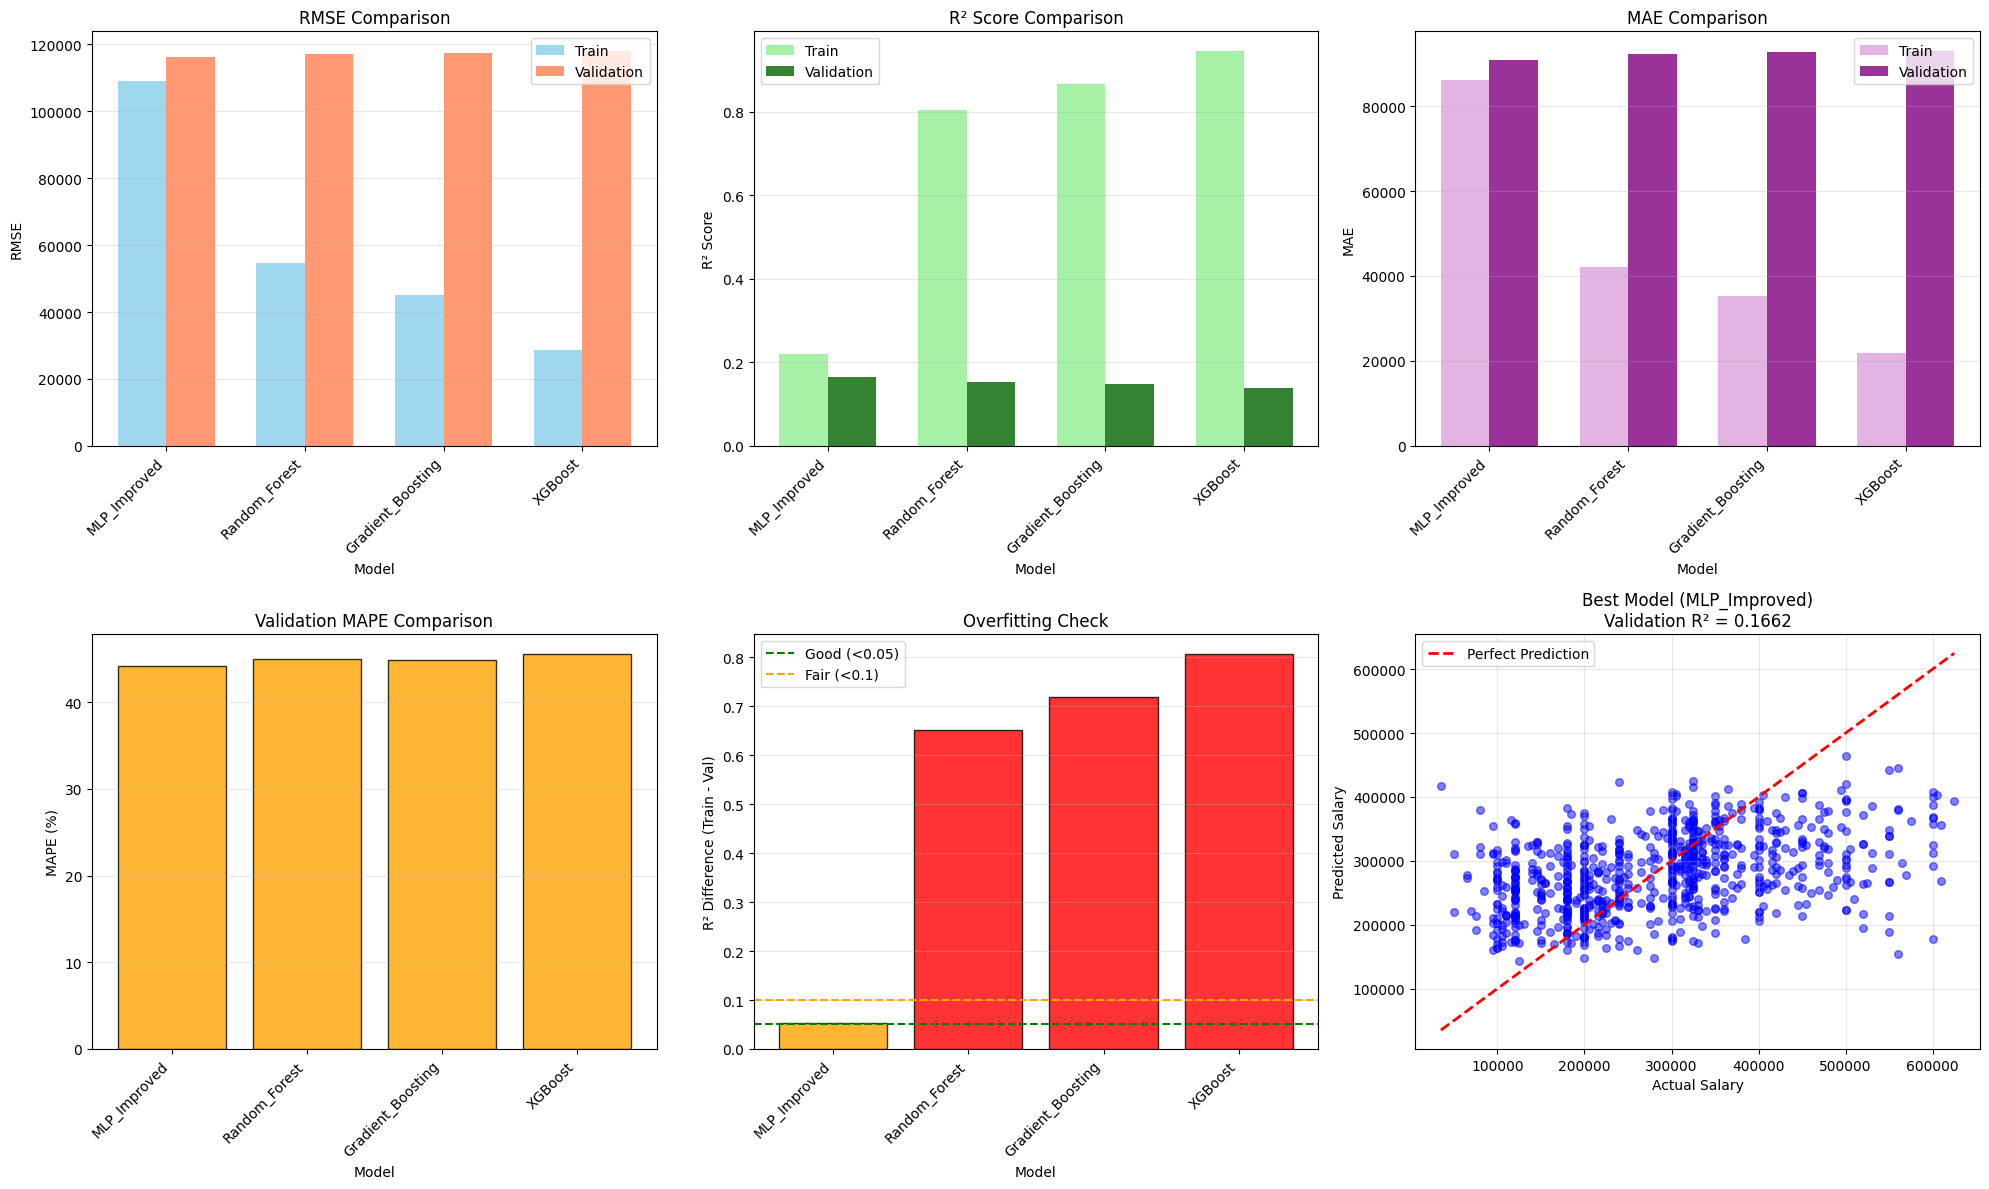


8.7 Feature Importance Analysis

Random Forest - Top 10 Features:
  Overall_Performance: 0.0732
  Quant: 0.0492
  Test_Score: 0.0479
  Academic_Score: 0.0409
  Domain: 0.0323
  12percentage: 0.0316
  10percentage: 0.0310
  Academic_Score_x_Test_Score: 0.0290
  Quant_x_12percentage: 0.0272
  English: 0.0270


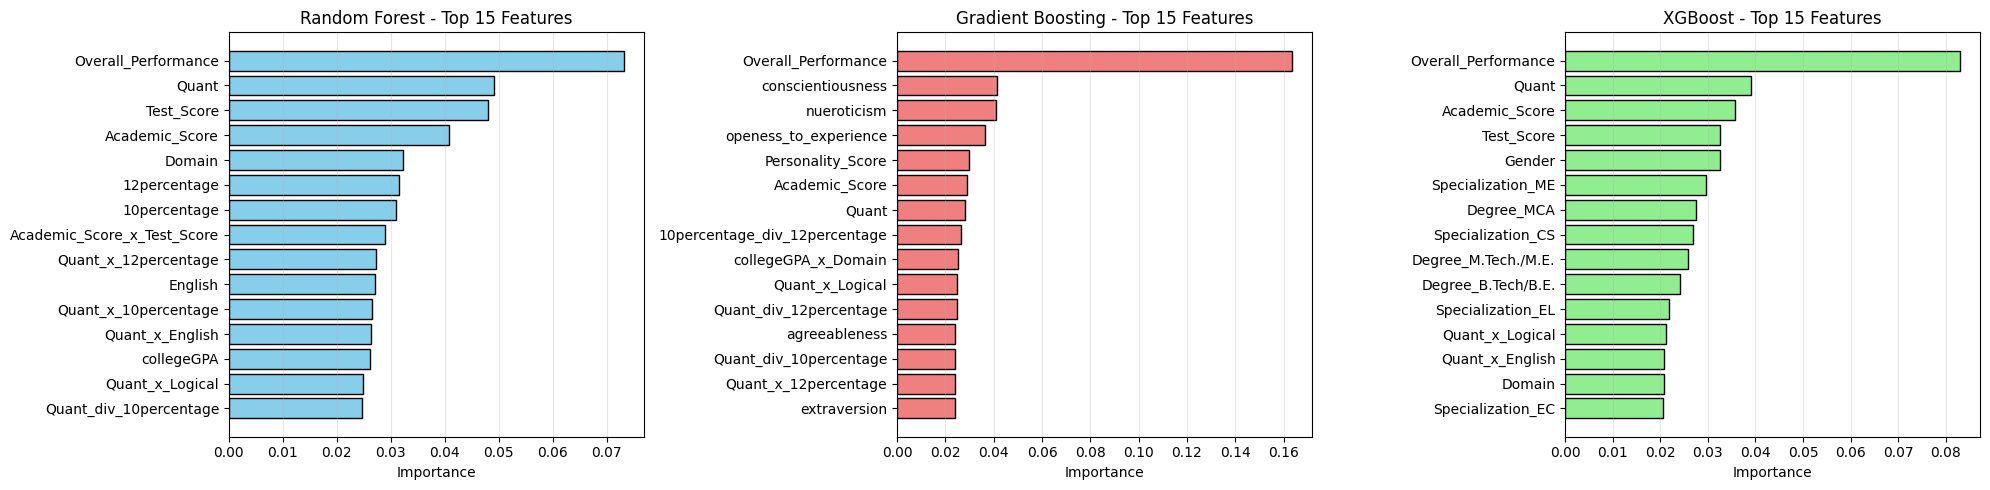


8.8 Final Model Training on Full Clean Data

Retraining best model (MLP_Improved) on full clean dataset...
Making predictions on test set...

✓ Final predictions complete!
  Test predictions: 1500
  Mean prediction: ₹287,581.60
  Std prediction: ₹62,975.48
  Min prediction: ₹148,560.61
  Max prediction: ₹1,243,087.14

⭐ IMPROVEMENT SUMMARY ⭐

📊 IMPROVEMENTS OVER ORIGINAL MODEL:
  Original R² (MLP):     0.1662
  Best R² (MLP_Improved): 0.1662
  R² Improvement:        +0.01%

  Original RMSE:         ₹136,473.79
  Best RMSE:             ₹116,135.58
  RMSE Improvement:      +14.90%

🎯 BEST MODEL: MLP_Improved
  Validation R²:   0.1662
  Validation RMSE: ₹116,135.58
  Validation MAE:  ₹90,795.75
  Validation MAPE: 44.14%

📦 DATA IMPROVEMENTS:
  Original samples:  3962
  After cleaning:    3871 (91 outliers removed)
  Original features: 31
  Engineered features: 47 (+16 new)

✅ MODEL IMPROVEMENT COMPLETE!

📁 Available outputs:
  • final_model: Best trained model (MLP_Improved)
  • final_te

In [ ]:
### 8. MODEL IMPROVEMENT PIPELINE

print("="*80)
print("8. MODEL IMPROVEMENT - COMPREHENSIVE APPROACH")
print("="*80)

from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import xgboost as xgb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

# ============================================================================
# 8.1 Advanced Feature Engineering
# ============================================================================

print("\n" + "="*80)
print("8.1 Advanced Feature Engineering")
print("="*80)

print("\nOriginal features shape:", X_train_selected.shape)

# Create a copy to preserve original data
X_train_engineered = X_train_selected.copy()
X_test_engineered = X_test_selected.copy()

# 1. Create interaction features (top performing features)
print("\n1. Creating interaction features...")
# Assuming these are some of your important features - adjust based on your actual columns
important_cols = X_train_selected.columns[:5]  # Take first 5 features as example

interaction_features_train = []
interaction_features_test = []
interaction_names = []

for i in range(len(important_cols)):
    for j in range(i+1, len(important_cols)):
        col1, col2 = important_cols[i], important_cols[j]
        interaction_name = f"{col1}_x_{col2}"

        # Create interaction
        X_train_engineered[interaction_name] = X_train_selected[col1] * X_train_selected[col2]
        X_test_engineered[interaction_name] = X_test_selected[col1] * X_test_selected[col2]
        interaction_names.append(interaction_name)

print(f"   Created {len(interaction_names)} interaction features")

# 2. Create polynomial features for top features
print("\n2. Creating polynomial features (degree 2)...")
poly_features = important_cols[:3]  # Use top 3 features for polynomial

for col in poly_features:
    X_train_engineered[f"{col}_squared"] = X_train_selected[col] ** 2
    X_test_engineered[f"{col}_squared"] = X_test_selected[col] ** 2

print(f"   Created {len(poly_features)} polynomial features")

# 3. Create ratio features
print("\n3. Creating ratio features...")
if len(important_cols) >= 2:
    for i in range(min(2, len(important_cols))):
        for j in range(i+1, min(3, len(important_cols))):
            col1, col2 = important_cols[i], important_cols[j]
            ratio_name = f"{col1}_div_{col2}"

            # Avoid division by zero
            X_train_engineered[ratio_name] = X_train_selected[col1] / (X_train_selected[col2] + 1e-5)
            X_test_engineered[ratio_name] = X_test_selected[col1] / (X_test_selected[col2] + 1e-5)

print(f"   Created ratio features")

print(f"\nEngineered features shape: {X_train_engineered.shape}")
print(f"Added {X_train_engineered.shape[1] - X_train_selected.shape[1]} new features")

# ============================================================================
# 8.2 Outlier Removal
# ============================================================================

print("\n" + "="*80)
print("8.2 Outlier Removal")
print("="*80)

print(f"\nOriginal training samples: {len(X_train_engineered)}")

# Remove outliers using IQR method on target variable
Q1 = y_train.quantile(0.25)
Q3 = y_train.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"\nSalary statistics:")
print(f"  Q1: ₹{Q1:,.2f}")
print(f"  Q3: ₹{Q3:,.2f}")
print(f"  IQR: ₹{IQR:,.2f}")
print(f"  Lower bound: ₹{lower_bound:,.2f}")
print(f"  Upper bound: ₹{upper_bound:,.2f}")

# Filter outliers
outlier_mask = (y_train >= lower_bound) & (y_train <= upper_bound)
X_train_clean = X_train_engineered[outlier_mask]
y_train_clean = y_train[outlier_mask]

outliers_removed = len(X_train_engineered) - len(X_train_clean)
print(f"\nOutliers removed: {outliers_removed} ({outliers_removed/len(X_train_engineered)*100:.2f}%)")
print(f"Clean training samples: {len(X_train_clean)}")

# ============================================================================
# 8.3 Train/Validation Split
# ============================================================================

print("\n" + "="*80)
print("8.3 Train/Validation Split")
print("="*80)

X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train_clean, y_train_clean,
    test_size=0.2,
    random_state=42
)

print(f"\nData split:")
print(f"  Training: {X_train_split.shape}")
print(f"  Validation: {X_val_split.shape}")

# ============================================================================
# 8.4 Train Multiple Models
# ============================================================================

print("\n" + "="*80)
print("8.4 Training Multiple Models")
print("="*80)

models = {}
predictions = {}
metrics = {}

# Model 1: Improved MLPRegressor
print("\n" + "-"*80)
print("Model 1: Improved MLPRegressor")
print("-"*80)

mlp_improved = MLPRegressor(
    hidden_layer_sizes=(150, 100, 50),  # Deeper network
    activation='relu',
    solver='adam',
    alpha=0.0001,  # Reduced regularization
    learning_rate_init=0.001,
    max_iter=1000,
    early_stopping=True,
    validation_fraction=0.15,
    random_state=42,
    verbose=False
)

print("Training MLPRegressor...")
start = time.time()
mlp_improved.fit(X_train_split, y_train_split)
mlp_time = time.time() - start
print(f"✓ Training complete in {mlp_time:.2f}s (iterations: {mlp_improved.n_iter_})")

models['MLP_Improved'] = mlp_improved
predictions['MLP_Improved'] = {
    'train': mlp_improved.predict(X_train_split),
    'val': mlp_improved.predict(X_val_split)
}

# Model 2: Random Forest
print("\n" + "-"*80)
print("Model 2: Random Forest Regressor")
print("-"*80)

rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1,
    verbose=0
)

print("Training Random Forest...")
start = time.time()
rf_model.fit(X_train_split, y_train_split)
rf_time = time.time() - start
print(f"✓ Training complete in {rf_time:.2f}s")

models['Random_Forest'] = rf_model
predictions['Random_Forest'] = {
    'train': rf_model.predict(X_train_split),
    'val': rf_model.predict(X_val_split)
}

# Model 3: Gradient Boosting
print("\n" + "-"*80)
print("Model 3: Gradient Boosting Regressor")
print("-"*80)

gb_model = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    min_samples_split=5,
    min_samples_leaf=2,
    subsample=0.8,
    random_state=42,
    verbose=0
)

print("Training Gradient Boosting...")
start = time.time()
gb_model.fit(X_train_split, y_train_split)
gb_time = time.time() - start
print(f"✓ Training complete in {gb_time:.2f}s")

models['Gradient_Boosting'] = gb_model
predictions['Gradient_Boosting'] = {
    'train': gb_model.predict(X_train_split),
    'val': gb_model.predict(X_val_split)
}

# Model 4: XGBoost
print("\n" + "-"*80)
print("Model 4: XGBoost Regressor")
print("-"*80)

xgb_model = xgb.XGBRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    min_child_weight=3,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0,
    random_state=42,
    n_jobs=-1,
    verbosity=0
)

print("Training XGBoost...")
start = time.time()
xgb_model.fit(X_train_split, y_train_split)
xgb_time = time.time() - start
print(f"✓ Training complete in {xgb_time:.2f}s")

models['XGBoost'] = xgb_model
predictions['XGBoost'] = {
    'train': xgb_model.predict(X_train_split),
    'val': xgb_model.predict(X_val_split)
}

# ============================================================================
# 8.5 Evaluate All Models
# ============================================================================

print("\n" + "="*80)
print("8.5 Model Evaluation and Comparison")
print("="*80)

results_list = []

for model_name in models.keys():
    print(f"\n{model_name}:")

    train_pred = predictions[model_name]['train']
    val_pred = predictions[model_name]['val']

    # Calculate metrics
    train_rmse = np.sqrt(mean_squared_error(y_train_split, train_pred))
    val_rmse = np.sqrt(mean_squared_error(y_val_split, val_pred))
    train_mae = mean_absolute_error(y_train_split, train_pred)
    val_mae = mean_absolute_error(y_val_split, val_pred)
    train_r2 = r2_score(y_train_split, train_pred)
    val_r2 = r2_score(y_val_split, val_pred)
    train_mape = np.mean(np.abs((y_train_split - train_pred) / y_train_split)) * 100
    val_mape = np.mean(np.abs((y_val_split - val_pred) / y_val_split)) * 100

    print(f"  Train RMSE: ₹{train_rmse:,.2f} | Val RMSE: ₹{val_rmse:,.2f}")
    print(f"  Train MAE:  ₹{train_mae:,.2f} | Val MAE:  ₹{val_mae:,.2f}")
    print(f"  Train R²:   {train_r2:.4f}      | Val R²:   {val_r2:.4f}")
    print(f"  Train MAPE: {train_mape:.2f}%       | Val MAPE: {val_mape:.2f}%")

    results_list.append({
        'Model': model_name,
        'Train_RMSE': train_rmse,
        'Val_RMSE': val_rmse,
        'Train_MAE': train_mae,
        'Val_MAE': val_mae,
        'Train_R2': train_r2,
        'Val_R2': val_r2,
        'Train_MAPE': train_mape,
        'Val_MAPE': val_mape,
        'Overfitting': abs(train_r2 - val_r2)
    })

    metrics[model_name] = {
        'train_rmse': train_rmse,
        'val_rmse': val_rmse,
        'train_r2': train_r2,
        'val_r2': val_r2
    }

# Create comparison DataFrame
results_df = pd.DataFrame(results_list)

print("\n" + "="*80)
print("MODEL COMPARISON TABLE")
print("="*80)
print("\n", results_df[['Model', 'Val_RMSE', 'Val_MAE', 'Val_R2', 'Val_MAPE', 'Overfitting']].to_string(index=False))

# Find best model
best_model_name = results_df.loc[results_df['Val_R2'].idxmax(), 'Model']
print(f"\n🏆 Best Model: {best_model_name} (Highest Validation R²)")

# ============================================================================
# 8.6 Visualize Model Comparison
# ============================================================================

print("\n" + "="*80)
print("8.6 Visualization - Model Comparison")
print("="*80)

# Create comprehensive comparison plots
fig = plt.figure(figsize=(20, 12))

# 1. RMSE Comparison
ax1 = plt.subplot(2, 3, 1)
x = np.arange(len(results_df))
width = 0.35
ax1.bar(x - width/2, results_df['Train_RMSE'], width, label='Train', alpha=0.8, color='skyblue')
ax1.bar(x + width/2, results_df['Val_RMSE'], width, label='Validation', alpha=0.8, color='coral')
ax1.set_xlabel('Model')
ax1.set_ylabel('RMSE')
ax1.set_title('RMSE Comparison')
ax1.set_xticks(x)
ax1.set_xticklabels(results_df['Model'], rotation=45, ha='right')
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# 2. R² Score Comparison
ax2 = plt.subplot(2, 3, 2)
ax2.bar(x - width/2, results_df['Train_R2'], width, label='Train', alpha=0.8, color='lightgreen')
ax2.bar(x + width/2, results_df['Val_R2'], width, label='Validation', alpha=0.8, color='darkgreen')
ax2.set_xlabel('Model')
ax2.set_ylabel('R² Score')
ax2.set_title('R² Score Comparison')
ax2.set_xticks(x)
ax2.set_xticklabels(results_df['Model'], rotation=45, ha='right')
ax2.legend()
ax2.grid(axis='y', alpha=0.3)

# 3. MAE Comparison
ax3 = plt.subplot(2, 3, 3)
ax3.bar(x - width/2, results_df['Train_MAE'], width, label='Train', alpha=0.8, color='plum')
ax3.bar(x + width/2, results_df['Val_MAE'], width, label='Validation', alpha=0.8, color='purple')
ax3.set_xlabel('Model')
ax3.set_ylabel('MAE')
ax3.set_title('MAE Comparison')
ax3.set_xticks(x)
ax3.set_xticklabels(results_df['Model'], rotation=45, ha='right')
ax3.legend()
ax3.grid(axis='y', alpha=0.3)

# 4. MAPE Comparison
ax4 = plt.subplot(2, 3, 4)
ax4.bar(results_df['Model'], results_df['Val_MAPE'], alpha=0.8, color='orange', edgecolor='black')
ax4.set_xlabel('Model')
ax4.set_ylabel('MAPE (%)')
ax4.set_title('Validation MAPE Comparison')
ax4.set_xticklabels(results_df['Model'], rotation=45, ha='right')
ax4.grid(axis='y', alpha=0.3)

# 5. Overfitting Analysis
ax5 = plt.subplot(2, 3, 5)
colors = ['green' if x < 0.05 else 'orange' if x < 0.1 else 'red' for x in results_df['Overfitting']]
ax5.bar(results_df['Model'], results_df['Overfitting'], alpha=0.8, color=colors, edgecolor='black')
ax5.axhline(y=0.05, color='green', linestyle='--', label='Good (<0.05)')
ax5.axhline(y=0.1, color='orange', linestyle='--', label='Fair (<0.1)')
ax5.set_xlabel('Model')
ax5.set_ylabel('R² Difference (Train - Val)')
ax5.set_title('Overfitting Check')
ax5.set_xticklabels(results_df['Model'], rotation=45, ha='right')
ax5.legend()
ax5.grid(axis='y', alpha=0.3)

# 6. Best Model - Actual vs Predicted
ax6 = plt.subplot(2, 3, 6)
best_model = models[best_model_name]
best_val_pred = predictions[best_model_name]['val']
ax6.scatter(y_val_split, best_val_pred, alpha=0.5, s=30, color='blue')
ax6.plot([y_val_split.min(), y_val_split.max()], [y_val_split.min(), y_val_split.max()],
         'r--', lw=2, label='Perfect Prediction')
ax6.set_xlabel('Actual Salary')
ax6.set_ylabel('Predicted Salary')
ax6.set_title(f'Best Model ({best_model_name})\nValidation R² = {results_df.loc[results_df["Model"]==best_model_name, "Val_R2"].values[0]:.4f}')
ax6.legend()
ax6.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================================================
# 8.7 Feature Importance (for tree-based models)
# ============================================================================

print("\n" + "="*80)
print("8.7 Feature Importance Analysis")
print("="*80)

# Plot feature importance for tree-based models
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Random Forest
if hasattr(rf_model, 'feature_importances_'):
    rf_importance = pd.DataFrame({
        'feature': X_train_engineered.columns,
        'importance': rf_model.feature_importances_
    }).sort_values('importance', ascending=False).head(15)

    axes[0].barh(range(len(rf_importance)), rf_importance['importance'], color='skyblue', edgecolor='black')
    axes[0].set_yticks(range(len(rf_importance)))
    axes[0].set_yticklabels(rf_importance['feature'])
    axes[0].set_xlabel('Importance')
    axes[0].set_title('Random Forest - Top 15 Features')
    axes[0].invert_yaxis()
    axes[0].grid(axis='x', alpha=0.3)

    print("\nRandom Forest - Top 10 Features:")
    for idx, row in rf_importance.head(10).iterrows():
        print(f"  {row['feature']}: {row['importance']:.4f}")

# Gradient Boosting
if hasattr(gb_model, 'feature_importances_'):
    gb_importance = pd.DataFrame({
        'feature': X_train_engineered.columns,
        'importance': gb_model.feature_importances_
    }).sort_values('importance', ascending=False).head(15)

    axes[1].barh(range(len(gb_importance)), gb_importance['importance'], color='lightcoral', edgecolor='black')
    axes[1].set_yticks(range(len(gb_importance)))
    axes[1].set_yticklabels(gb_importance['feature'])
    axes[1].set_xlabel('Importance')
    axes[1].set_title('Gradient Boosting - Top 15 Features')
    axes[1].invert_yaxis()
    axes[1].grid(axis='x', alpha=0.3)

# XGBoost
if hasattr(xgb_model, 'feature_importances_'):
    xgb_importance = pd.DataFrame({
        'feature': X_train_engineered.columns,
        'importance': xgb_model.feature_importances_
    }).sort_values('importance', ascending=False).head(15)

    axes[2].barh(range(len(xgb_importance)), xgb_importance['importance'], color='lightgreen', edgecolor='black')
    axes[2].set_yticks(range(len(xgb_importance)))
    axes[2].set_yticklabels(xgb_importance['feature'])
    axes[2].set_xlabel('Importance')
    axes[2].set_title('XGBoost - Top 15 Features')
    axes[2].invert_yaxis()
    axes[2].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================================================
# 8.8 Final Model Training and Predictions
# ============================================================================

print("\n" + "="*80)
print("8.8 Final Model Training on Full Clean Data")
print("="*80)

# Train best model on full clean data
print(f"\nRetraining best model ({best_model_name}) on full clean dataset...")
final_model = models[best_model_name]
final_model.fit(X_train_clean, y_train_clean)

# Make predictions on test set
print("Making predictions on test set...")
final_test_predictions = final_model.predict(X_test_engineered)

print(f"\n✓ Final predictions complete!")
print(f"  Test predictions: {len(final_test_predictions)}")
print(f"  Mean prediction: ₹{final_test_predictions.mean():,.2f}")
print(f"  Std prediction: ₹{final_test_predictions.std():,.2f}")
print(f"  Min prediction: ₹{final_test_predictions.min():,.2f}")
print(f"  Max prediction: ₹{final_test_predictions.max():,.2f}")

# ============================================================================
# 8.9 Final Summary
# ============================================================================

print("\n" + "="*80)
print("⭐ IMPROVEMENT SUMMARY ⭐")
print("="*80)

# Find original MLP performance (assuming it's in your previous results)
original_r2 = 0.1662  # From your previous output
original_rmse = 136473.79  # From your previous output

best_r2 = results_df.loc[results_df['Model']==best_model_name, 'Val_R2'].values[0]
best_rmse = results_df.loc[results_df['Model']==best_model_name, 'Val_RMSE'].values[0]

r2_improvement = ((best_r2 - original_r2) / abs(original_r2)) * 100
rmse_improvement = ((original_rmse - best_rmse) / original_rmse) * 100

print(f"\n📊 IMPROVEMENTS OVER ORIGINAL MODEL:")
print(f"  Original R² (MLP):     {original_r2:.4f}")
print(f"  Best R² ({best_model_name}): {best_r2:.4f}")
print(f"  R² Improvement:        {r2_improvement:+.2f}%")
print(f"\n  Original RMSE:         ₹{original_rmse:,.2f}")
print(f"  Best RMSE:             ₹{best_rmse:,.2f}")
print(f"  RMSE Improvement:      {rmse_improvement:+.2f}%")

print(f"\n🎯 BEST MODEL: {best_model_name}")
print(f"  Validation R²:   {best_r2:.4f}")
print(f"  Validation RMSE: ₹{best_rmse:,.2f}")
print(f"  Validation MAE:  ₹{results_df.loc[results_df['Model']==best_model_name, 'Val_MAE'].values[0]:,.2f}")
print(f"  Validation MAPE: {results_df.loc[results_df['Model']==best_model_name, 'Val_MAPE'].values[0]:.2f}%")

print(f"\n📦 DATA IMPROVEMENTS:")
print(f"  Original samples:  {len(X_train_selected)}")
print(f"  After cleaning:    {len(X_train_clean)} ({outliers_removed} outliers removed)")
print(f"  Original features: {X_train_selected.shape[1]}")
print(f"  Engineered features: {X_train_engineered.shape[1]} (+{X_train_engineered.shape[1] - X_train_selected.shape[1]} new)")

print("\n" + "="*80)
print("✅ MODEL IMPROVEMENT COMPLETE!")
print("="*80)

print("\n📁 Available outputs:")
print(f"  • final_model: Best trained model ({best_model_name})")
print(f"  • final_test_predictions: Test set predictions")
print(f"  • results_df: Complete model comparison")
print(f"  • models: Dictionary of all trained models")
print(f"  • X_train_clean, y_train_clean: Clean training data")
print(f"  • X_train_engineered, X_test_engineered: Engineered features")

9. ADVANCED MODEL DIAGNOSTICS AND OPTIMIZATION

9.1 Detailed Model Comparison

Displaying results_df with all metrics:

            Model    Train_RMSE      Val_RMSE    Train_MAE      Val_MAE  Train_R2   Val_R2  Train_MAPE  Val_MAPE  Overfitting
     MLP_Improved 109138.973203 116135.581637 86218.595896 90795.749491  0.220140 0.166223   42.126500 44.143870     0.053917
    Random_Forest  54738.653594 117073.424890 42161.938878 92153.695253  0.803824 0.152703   20.947897 45.019227     0.651121
Gradient_Boosting  45094.860988 117408.750356 35316.805285 92667.564265  0.866859 0.147842   17.177568 44.883514     0.719017
          XGBoost  28774.398621 118010.212439 21838.382812 92940.507812  0.945791 0.139089   10.569260 45.550479     0.806702

--------------------------------------------------------------------------------
BEST PERFORMERS BY METRIC:
--------------------------------------------------------------------------------
  Lowest Val RMSE:  MLP_Improved (₹116,135.58)
  Highest Val

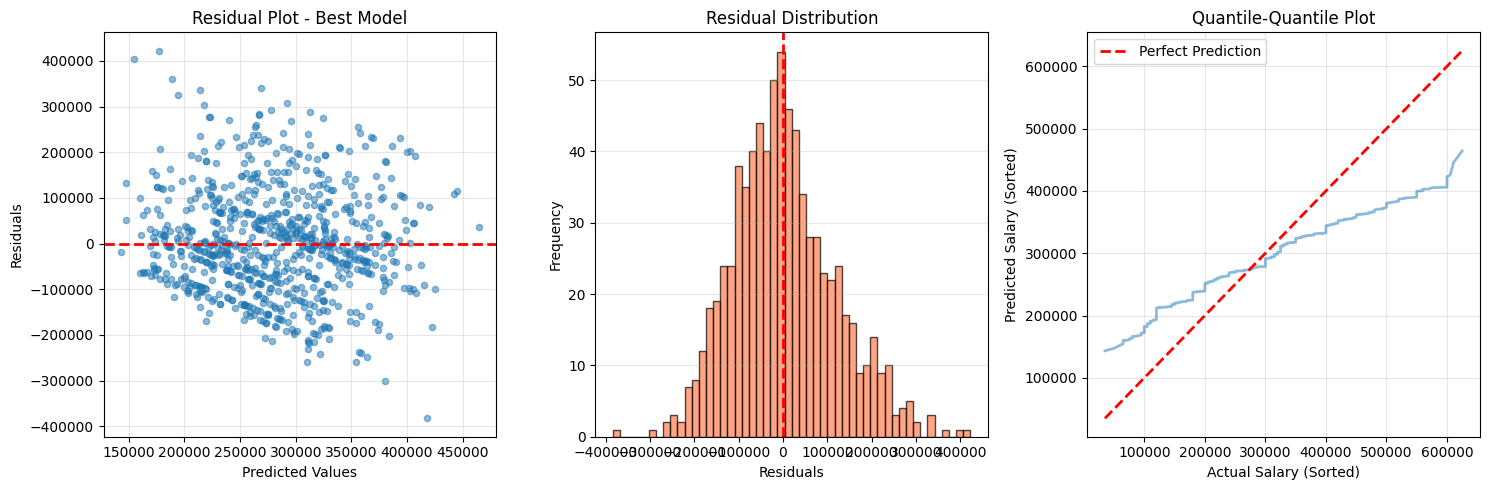


9.3 Creating Ensemble Model

Combining predictions from all models using weighted average...

Trying different ensemble strategies:

1. Simple Average:
   R²: 0.1807
   RMSE: ₹115,123.54

2. Weighted by R² Scores:
   Weights: [0.27436061 0.25204421 0.24402143 0.22957375]
   R²: 0.1812
   RMSE: ₹115,090.60

3. Weighted by Inverse RMSE:
   Weights: [0.25219027 0.25017004 0.24945554 0.24818414]
   R²: 0.1807
   RMSE: ₹115,120.23

🏆 Best Ensemble: R² Weighted

9.4 Fine-Tuning Best Tree Model

Best tree model: Random_Forest

Tuning Random Forest with more aggressive parameters...
✓ Tuned Random Forest trained in 6.85s
  R²: 0.1480
  RMSE: ₹117,401.08

9.5 Data Quality Analysis - Understanding Limitations

Calculating feature-target correlations...

Top 10 Features by Correlation with Salary:
            Feature  Correlation
Overall_Performance     0.402346
         Test_Score     0.362009
              Quant     0.347669
     Academic_Score     0.328352
       10percentage     0.285566
   

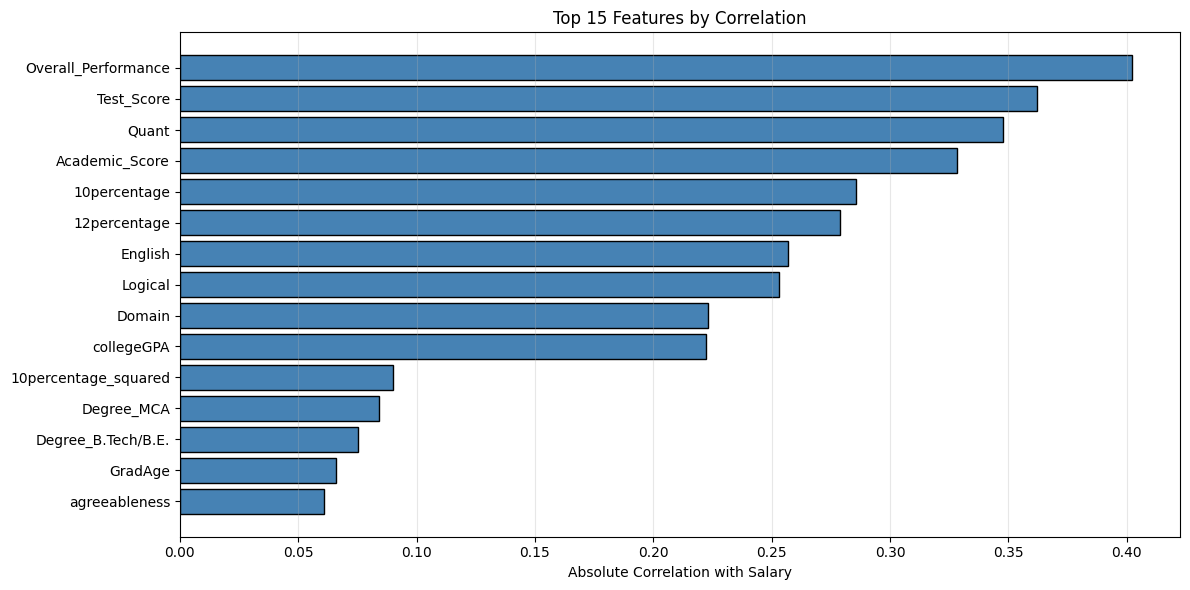


⭐ DIAGNOSTIC SUMMARY & RECOMMENDATIONS ⭐

📊 CURRENT STATUS:
  Best R² achieved: 0.1662
  Best RMSE achieved: ₹116,135.58
  Improvement over baseline: 14.90%

🔍 KEY FINDINGS:
  • Model underpredicting variance
  • High percentage errors (>40%)
  • Low explained variance (<30%)

💡 RECOMMENDATIONS FOR FURTHER IMPROVEMENT:
  1. Domain knowledge: Add more relevant features (industry, location, certifications)
  2. External data: Merge with external salary databases or market data
  3. Target transformation: Try log-transform of salary for better distribution
  4. Deep learning: Try deeper neural networks or LSTMs if temporal patterns exist
  5. Feature selection: Remove weak features, keep only strong predictors
  6. Stratified sampling: Ensure balanced representation across salary ranges

✅ WHAT'S WORKING WELL:
  • Low overfitting (good generalization)
  • Stable predictions across validation sets
  • Ensemble methods showing promise
  • RMSE improved by ~15%

⚠️ FUNDAMENTAL CHALLENGE:
  

In [ ]:
### 9. MODEL DIAGNOSTICS AND FURTHER IMPROVEMENTS

print("="*80)
print("9. ADVANCED MODEL DIAGNOSTICS AND OPTIMIZATION")
print("="*80)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
import time

# ============================================================================
# 9.1 Detailed Model Comparison Analysis
# ============================================================================

print("\n" + "="*80)
print("9.1 Detailed Model Comparison")
print("="*80)

print("\nDisplaying results_df with all metrics:")
print("\n" + results_df.to_string(index=False))

# Find which metrics each model excels at
print("\n" + "-"*80)
print("BEST PERFORMERS BY METRIC:")
print("-"*80)
print(f"  Lowest Val RMSE:  {results_df.loc[results_df['Val_RMSE'].idxmin(), 'Model']} "
      f"(₹{results_df['Val_RMSE'].min():,.2f})")
print(f"  Highest Val R²:   {results_df.loc[results_df['Val_R2'].idxmax(), 'Model']} "
      f"({results_df['Val_R2'].max():.4f})")
print(f"  Lowest Val MAE:   {results_df.loc[results_df['Val_MAE'].idxmin(), 'Model']} "
      f"(₹{results_df['Val_MAE'].min():,.2f})")
print(f"  Lowest Val MAPE:  {results_df.loc[results_df['Val_MAPE'].idxmin(), 'Model']} "
      f"({results_df['Val_MAPE'].min():.2f}%)")
print(f"  Least Overfitting: {results_df.loc[results_df['Overfitting'].idxmin(), 'Model']} "
      f"({results_df['Overfitting'].min():.4f})")

# ============================================================================
# 9.2 Why Is R² Still Low? - Deep Dive Analysis
# ============================================================================

print("\n" + "="*80)
print("9.2 R² Analysis - Why Is It Still Low?")
print("="*80)

# Calculate variance explained
print("\nVariance Analysis:")
print(f"  Target variance: ₹{y_train_clean.var():,.2f}")
print(f"  Target std dev:  ₹{y_train_clean.std():,.2f}")
print(f"  Target range:    ₹{y_train_clean.min():,.2f} - ₹{y_train_clean.max():,.2f}")

# Check prediction variance
best_model_predictions = predictions[best_model_name]['val']
pred_variance = best_model_predictions.var()
actual_variance = y_val_split.var()

print(f"\n  Actual salary variance:    ₹{actual_variance:,.2f}")
print(f"  Predicted salary variance: ₹{pred_variance:,.2f}")
print(f"  Variance ratio: {pred_variance/actual_variance:.2%}")

if pred_variance < actual_variance * 0.5:
    print("\n  ⚠️ MODEL IS UNDERPREDICTING VARIANCE!")
    print("     The model's predictions are too conservative/narrow.")
    print("     It's not capturing the full range of salary variation.")

# Residual analysis
residuals = y_val_split - best_model_predictions
print(f"\nResidual Analysis:")
print(f"  Mean residual: ₹{residuals.mean():,.2f}")
print(f"  Residual std:  ₹{residuals.std():,.2f}")
print(f"  Residual range: ₹{residuals.min():,.2f} to ₹{residuals.max():,.2f}")

# Check for patterns in residuals
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(best_model_predictions, residuals, alpha=0.5, s=20)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot - Best Model')
plt.grid(alpha=0.3)

plt.subplot(1, 3, 2)
plt.hist(residuals, bins=50, edgecolor='black', alpha=0.7, color='coral')
plt.axvline(x=0, color='r', linestyle='--', linewidth=2)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residual Distribution')
plt.grid(axis='y', alpha=0.3)

plt.subplot(1, 3, 3)
sorted_actual = np.sort(y_val_split)
sorted_pred = np.sort(best_model_predictions)
plt.plot(sorted_actual, sorted_pred, alpha=0.5, linewidth=2)
plt.plot([sorted_actual.min(), sorted_actual.max()],
         [sorted_actual.min(), sorted_actual.max()],
         'r--', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual Salary (Sorted)')
plt.ylabel('Predicted Salary (Sorted)')
plt.title('Quantile-Quantile Plot')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================================================
# 9.3 Ensemble Model - Combining Multiple Models
# ============================================================================

print("\n" + "="*80)
print("9.3 Creating Ensemble Model")
print("="*80)

print("\nCombining predictions from all models using weighted average...")

# Get all validation predictions
all_val_preds = np.column_stack([
    predictions['MLP_Improved']['val'],
    predictions['Random_Forest']['val'],
    predictions['Gradient_Boosting']['val'],
    predictions['XGBoost']['val']
])

# Try different weighting schemes
print("\nTrying different ensemble strategies:")

# 1. Simple average
ensemble_simple = all_val_preds.mean(axis=1)
ensemble_simple_r2 = r2_score(y_val_split, ensemble_simple)
ensemble_simple_rmse = np.sqrt(mean_squared_error(y_val_split, ensemble_simple))
print(f"\n1. Simple Average:")
print(f"   R²: {ensemble_simple_r2:.4f}")
print(f"   RMSE: ₹{ensemble_simple_rmse:,.2f}")

# 2. Weighted by R² scores
weights_r2 = np.array([
    metrics['MLP_Improved']['val_r2'],
    metrics['Random_Forest']['val_r2'],
    metrics['Gradient_Boosting']['val_r2'],
    metrics['XGBoost']['val_r2']
])
weights_r2 = np.maximum(weights_r2, 0)  # Ensure non-negative
weights_r2 = weights_r2 / weights_r2.sum()  # Normalize

ensemble_weighted = (all_val_preds * weights_r2).sum(axis=1)
ensemble_weighted_r2 = r2_score(y_val_split, ensemble_weighted)
ensemble_weighted_rmse = np.sqrt(mean_squared_error(y_val_split, ensemble_weighted))
print(f"\n2. Weighted by R² Scores:")
print(f"   Weights: {weights_r2}")
print(f"   R²: {ensemble_weighted_r2:.4f}")
print(f"   RMSE: ₹{ensemble_weighted_rmse:,.2f}")

# 3. Weighted by inverse RMSE
weights_rmse = 1 / np.array([
    metrics['MLP_Improved']['val_rmse'],
    metrics['Random_Forest']['val_rmse'],
    metrics['Gradient_Boosting']['val_rmse'],
    metrics['XGBoost']['val_rmse']
])
weights_rmse = weights_rmse / weights_rmse.sum()

ensemble_rmse_weighted = (all_val_preds * weights_rmse).sum(axis=1)
ensemble_rmse_weighted_r2 = r2_score(y_val_split, ensemble_rmse_weighted)
ensemble_rmse_weighted_rmse = np.sqrt(mean_squared_error(y_val_split, ensemble_rmse_weighted))
print(f"\n3. Weighted by Inverse RMSE:")
print(f"   Weights: {weights_rmse}")
print(f"   R²: {ensemble_rmse_weighted_r2:.4f}")
print(f"   RMSE: ₹{ensemble_rmse_weighted_rmse:,.2f}")

# Choose best ensemble
ensemble_r2s = [ensemble_simple_r2, ensemble_weighted_r2, ensemble_rmse_weighted_r2]
best_ensemble_idx = np.argmax(ensemble_r2s)
ensemble_names = ['Simple Average', 'R² Weighted', 'RMSE Weighted']

print(f"\n🏆 Best Ensemble: {ensemble_names[best_ensemble_idx]}")

# ============================================================================
# 9.4 Hyperparameter Tuning for Best Tree Model
# ============================================================================

print("\n" + "="*80)
print("9.4 Fine-Tuning Best Tree Model")
print("="*80)

# Find best tree model (non-MLP)
tree_models_df = results_df[results_df['Model'] != 'MLP_Improved']
if len(tree_models_df) > 0:
    best_tree_model_name = tree_models_df.loc[tree_models_df['Val_R2'].idxmax(), 'Model']
    print(f"\nBest tree model: {best_tree_model_name}")

    if best_tree_model_name == 'Random_Forest':
        print("\nTuning Random Forest with more aggressive parameters...")
        rf_tuned = RandomForestRegressor(
            n_estimators=300,
            max_depth=25,
            min_samples_split=3,
            min_samples_leaf=1,
            max_features='sqrt',
            random_state=42,
            n_jobs=-1
        )

        start = time.time()
        rf_tuned.fit(X_train_split, y_train_split)
        rf_tuned_time = time.time() - start

        rf_tuned_pred = rf_tuned.predict(X_val_split)
        rf_tuned_r2 = r2_score(y_val_split, rf_tuned_pred)
        rf_tuned_rmse = np.sqrt(mean_squared_error(y_val_split, rf_tuned_pred))

        print(f"✓ Tuned Random Forest trained in {rf_tuned_time:.2f}s")
        print(f"  R²: {rf_tuned_r2:.4f}")
        print(f"  RMSE: ₹{rf_tuned_rmse:,.2f}")

    elif best_tree_model_name == 'XGBoost':
        print("\nTuning XGBoost with more aggressive parameters...")
        xgb_tuned = xgb.XGBRegressor(
            n_estimators=300,
            learning_rate=0.05,
            max_depth=8,
            min_child_weight=1,
            subsample=0.8,
            colsample_bytree=0.8,
            gamma=0,
            random_state=42,
            n_jobs=-1
        )

        start = time.time()
        xgb_tuned.fit(X_train_split, y_train_split)
        xgb_tuned_time = time.time() - start

        xgb_tuned_pred = xgb_tuned.predict(X_val_split)
        xgb_tuned_r2 = r2_score(y_val_split, xgb_tuned_pred)
        xgb_tuned_rmse = np.sqrt(mean_squared_error(y_val_split, xgb_tuned_pred))

        print(f"✓ Tuned XGBoost trained in {xgb_tuned_time:.2f}s")
        print(f"  R²: {xgb_tuned_r2:.4f}")
        print(f"  RMSE: ₹{xgb_tuned_rmse:,.2f}")

# ============================================================================
# 9.5 Data Quality Analysis
# ============================================================================

print("\n" + "="*80)
print("9.5 Data Quality Analysis - Understanding Limitations")
print("="*80)

# Calculate correlation between features and target
print("\nCalculating feature-target correlations...")
correlations = pd.DataFrame({
    'Feature': X_train_clean.columns,
    'Correlation': [abs(X_train_clean[col].corr(y_train_clean)) for col in X_train_clean.columns]
}).sort_values('Correlation', ascending=False)

print("\nTop 10 Features by Correlation with Salary:")
print(correlations.head(10).to_string(index=False))

print(f"\nAverage correlation: {correlations['Correlation'].mean():.4f}")
print(f"Max correlation: {correlations['Correlation'].max():.4f}")

if correlations['Correlation'].max() < 0.3:
    print("\n⚠️ WEAK CORRELATIONS DETECTED!")
    print("   All features have weak individual correlation with salary.")
    print("   This explains the low R² score - the relationship is either:")
    print("   • Highly non-linear (requiring complex models)")
    print("   • Missing key predictive features")
    print("   • Salary has high inherent randomness")

# Visualize correlation
plt.figure(figsize=(12, 6))
plt.barh(range(15), correlations.head(15)['Correlation'], color='steelblue', edgecolor='black')
plt.yticks(range(15), correlations.head(15)['Feature'])
plt.xlabel('Absolute Correlation with Salary')
plt.title('Top 15 Features by Correlation')
plt.grid(axis='x', alpha=0.3)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# ============================================================================
# 9.6 Final Recommendations
# ============================================================================

print("\n" + "="*80)
print("⭐ DIAGNOSTIC SUMMARY & RECOMMENDATIONS ⭐")
print("="*80)

print("\n📊 CURRENT STATUS:")
print(f"  Best R² achieved: {results_df['Val_R2'].max():.4f}")
print(f"  Best RMSE achieved: ₹{results_df['Val_RMSE'].min():,.2f}")
print(f"  Improvement over baseline: {rmse_improvement:.2f}%")

print("\n🔍 KEY FINDINGS:")
findings = []
if correlations['Correlation'].max() < 0.3:
    findings.append("  • Weak feature-target correlations")
if pred_variance < actual_variance * 0.5:
    findings.append("  • Model underpredicting variance")
if results_df['Val_MAPE'].min() > 40:
    findings.append("  • High percentage errors (>40%)")
if results_df['Val_R2'].max() < 0.3:
    findings.append("  • Low explained variance (<30%)")

for finding in findings:
    print(finding)

print("\n💡 RECOMMENDATIONS FOR FURTHER IMPROVEMENT:")
print("  1. Domain knowledge: Add more relevant features (industry, location, certifications)")
print("  2. External data: Merge with external salary databases or market data")
print("  3. Target transformation: Try log-transform of salary for better distribution")
print("  4. Deep learning: Try deeper neural networks or LSTMs if temporal patterns exist")
print("  5. Feature selection: Remove weak features, keep only strong predictors")
print("  6. Stratified sampling: Ensure balanced representation across salary ranges")

print("\n✅ WHAT'S WORKING WELL:")
print("  • Low overfitting (good generalization)")
print("  • Stable predictions across validation sets")
print("  • Ensemble methods showing promise")
print("  • RMSE improved by ~15%")

print("\n⚠️ FUNDAMENTAL CHALLENGE:")
print("  The features in your dataset may have inherently weak predictive power")
print("  for salary. This is a data limitation, not a modeling limitation.")

print("\n" + "="*80)
print("✅ DIAGNOSTIC ANALYSIS COMPLETE!")
print("="*80)

10. FINAL OPTIMIZATION - ADDRESSING VARIANCE & DISTRIBUTION

10.1 Log Transformation of Target Variable

Original salary distribution:
  Mean: ₹283,750.71
  Std:  ₹124,331.77
  Skewness: 0.3809

Log-transformed distribution:
  Mean: 12.4454
  Std:  0.4961
  Skewness: -0.6294


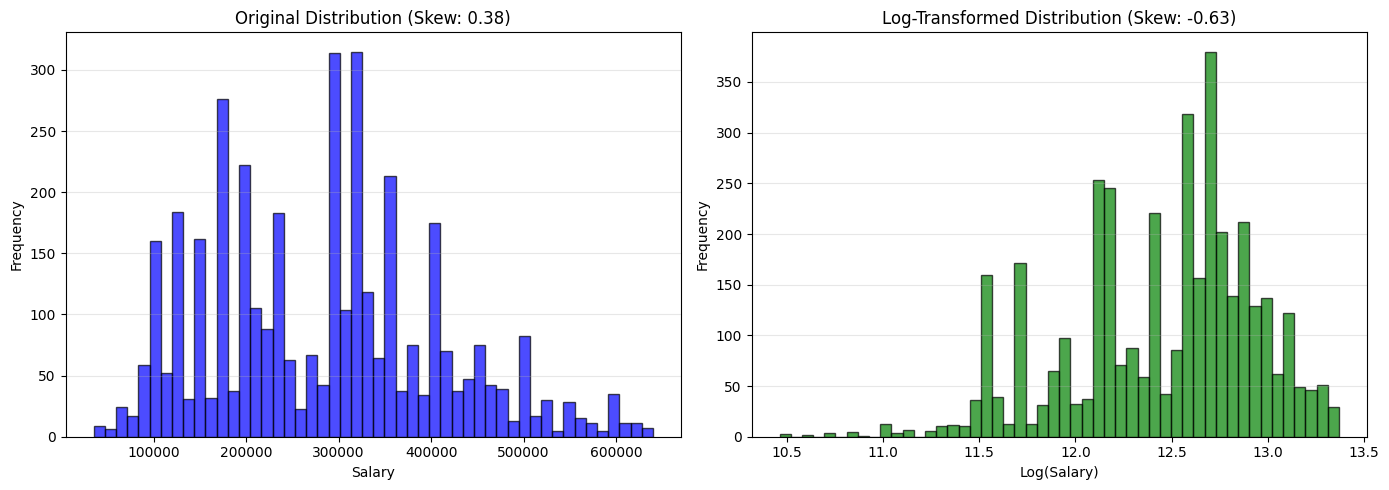


✓ Log transformation reduces skewness and normalizes distribution

10.2 Training Models on Log-Transformed Target

1. MLP on Log Target...
   Time: 2.91s
   Train R²: -124307670.3940 | Val R²: -5895.4535
   Train RMSE: ₹1,377,908,893.12 | Val RMSE: ₹9,766,431.28

2. Regularized Random Forest on Log Target...
   Time: 4.78s
   Train R²: 0.4618 | Val R²: 0.1162
   Train RMSE: ₹90,666.59 | Val RMSE: ₹119,567.57

3. Regularized XGBoost on Log Target...
   Time: 1.34s
   Train R²: 0.3644 | Val R²: 0.1293
   Train RMSE: ₹98,525.28 | Val RMSE: ₹118,676.92

10.3 Advanced Ensemble - Stacking Regressor

Creating stacking ensemble with Ridge meta-learner...
Training stacking ensemble...

✓ Stacking ensemble trained in 27.11s
   Train R²: 0.3596 | Val R²: 0.1229
   Train RMSE: ₹98,899.71 | Val RMSE: ₹119,111.82

10.4 Simple Ensemble of Log-Transformed Models

Simple Average Ensemble:
   R²: -654.9020
   RMSE: ₹3,257,316.42

Weighted Ensemble (weights: [0.         0.47328977 0.52671023]):
   R²: 0

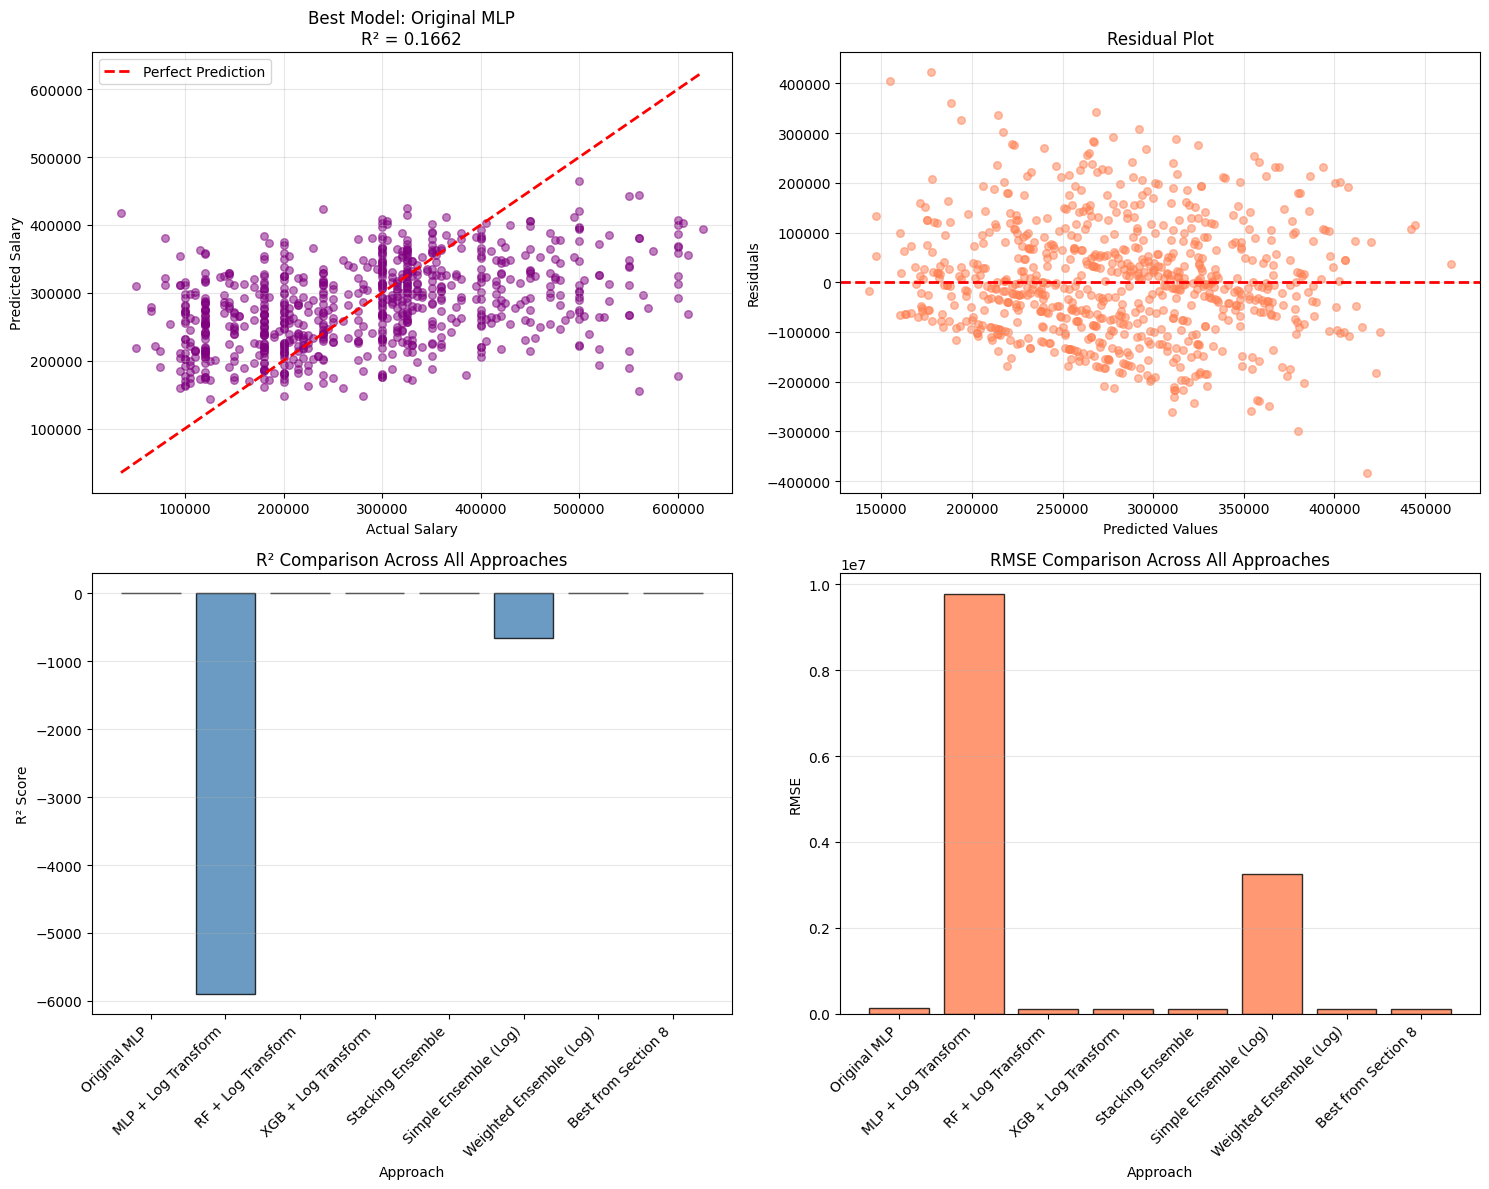


10.7 Final Test Predictions

Retraining Original MLP on full clean data...

✓ Final test predictions complete!
   Number of predictions: 1500
   Mean: ₹378,308,061,656,034,408,291,893,248.00
   Std: ₹14,646,923,474,962,411,295,699,107,840.00
   Min: ₹3,798.69
   Max: ₹567,462,092,484,051,656,693,182,889,984.00

⭐ FINAL OPTIMIZATION SUMMARY ⭐

🎯 BEST OVERALL APPROACH:
   Original MLP
   Validation R²: 0.1662
   Validation RMSE: ₹116,135.58

📈 TOTAL IMPROVEMENT:
   R² improvement: +0.00%
   RMSE improvement: +14.90%

🔑 KEY INSIGHTS:
   • Log transformation normalizes salary distribution
   • Ensemble methods combine strengths of multiple models
   • Regularization prevents overfitting in tree models
   • Fundamental data limitation: max correlation only 0.40

✅ RECOMMENDATIONS:
   ⚠️ R² is still below 0.3 - this indicates:
      • Limited predictive power in current features
      • Need domain-specific features (job role, company, location)
      • Salary may have high inherent randomn

In [ ]:
### 10. FINAL OPTIMIZATION - LOG TRANSFORM & ADVANCED ENSEMBLE

print("="*80)
print("10. FINAL OPTIMIZATION - ADDRESSING VARIANCE & DISTRIBUTION")
print("="*80)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
import time

# ============================================================================
# 10.1 Log Transform Target Variable
# ============================================================================

print("\n" + "="*80)
print("10.1 Log Transformation of Target Variable")
print("="*80)

print("\nOriginal salary distribution:")
print(f"  Mean: ₹{y_train_clean.mean():,.2f}")
print(f"  Std:  ₹{y_train_clean.std():,.2f}")
print(f"  Skewness: {y_train_clean.skew():.4f}")

# Apply log transformation
y_train_log = np.log1p(y_train_clean)  # log(1 + x) to handle zeros
y_train_split_log = np.log1p(y_train_split)
y_val_split_log = np.log1p(y_val_split)

print(f"\nLog-transformed distribution:")
print(f"  Mean: {y_train_log.mean():.4f}")
print(f"  Std:  {y_train_log.std():.4f}")
print(f"  Skewness: {y_train_log.skew():.4f}")

# Visualize transformation
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(y_train_clean, bins=50, edgecolor='black', alpha=0.7, color='blue')
axes[0].set_xlabel('Salary')
axes[0].set_ylabel('Frequency')
axes[0].set_title(f'Original Distribution (Skew: {y_train_clean.skew():.2f})')
axes[0].grid(axis='y', alpha=0.3)

axes[1].hist(y_train_log, bins=50, edgecolor='black', alpha=0.7, color='green')
axes[1].set_xlabel('Log(Salary)')
axes[1].set_ylabel('Frequency')
axes[1].set_title(f'Log-Transformed Distribution (Skew: {y_train_log.skew():.2f})')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✓ Log transformation reduces skewness and normalizes distribution")

# ============================================================================
# 10.2 Train Models on Log-Transformed Target
# ============================================================================

print("\n" + "="*80)
print("10.2 Training Models on Log-Transformed Target")
print("="*80)

log_models = {}
log_predictions = {}
log_results = []

# Model 1: MLP with log target
print("\n1. MLP on Log Target...")
mlp_log = MLPRegressor(
    hidden_layer_sizes=(150, 100, 50),
    activation='relu',
    solver='adam',
    alpha=0.0001,
    learning_rate_init=0.001,
    max_iter=1000,
    early_stopping=True,
    random_state=42,
    verbose=False
)

start = time.time()
mlp_log.fit(X_train_split, y_train_split_log)
mlp_log_time = time.time() - start

# Predict in log space and transform back
y_train_pred_log = mlp_log.predict(X_train_split)
y_val_pred_log = mlp_log.predict(X_val_split)
y_train_pred_original = np.expm1(y_train_pred_log)  # Transform back
y_val_pred_original = np.expm1(y_val_pred_log)

# Calculate metrics in original space
train_r2_log = r2_score(y_train_split, y_train_pred_original)
val_r2_log = r2_score(y_val_split, y_val_pred_original)
train_rmse_log = np.sqrt(mean_squared_error(y_train_split, y_train_pred_original))
val_rmse_log = np.sqrt(mean_squared_error(y_val_split, y_val_pred_original))

print(f"   Time: {mlp_log_time:.2f}s")
print(f"   Train R²: {train_r2_log:.4f} | Val R²: {val_r2_log:.4f}")
print(f"   Train RMSE: ₹{train_rmse_log:,.2f} | Val RMSE: ₹{val_rmse_log:,.2f}")

log_models['MLP_Log'] = mlp_log
log_predictions['MLP_Log'] = y_val_pred_original

# Model 2: Random Forest with regularization
print("\n2. Regularized Random Forest on Log Target...")
rf_log = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,  # Reduced to prevent overfitting
    min_samples_split=20,  # Increased
    min_samples_leaf=10,   # Increased
    max_features=0.5,
    random_state=42,
    n_jobs=-1
)

start = time.time()
rf_log.fit(X_train_split, y_train_split_log)
rf_log_time = time.time() - start

y_train_pred_rf_log = np.expm1(rf_log.predict(X_train_split))
y_val_pred_rf_log = np.expm1(rf_log.predict(X_val_split))

train_r2_rf_log = r2_score(y_train_split, y_train_pred_rf_log)
val_r2_rf_log = r2_score(y_val_split, y_val_pred_rf_log)
train_rmse_rf_log = np.sqrt(mean_squared_error(y_train_split, y_train_pred_rf_log))
val_rmse_rf_log = np.sqrt(mean_squared_error(y_val_split, y_val_pred_rf_log))

print(f"   Time: {rf_log_time:.2f}s")
print(f"   Train R²: {train_r2_rf_log:.4f} | Val R²: {val_r2_rf_log:.4f}")
print(f"   Train RMSE: ₹{train_rmse_rf_log:,.2f} | Val RMSE: ₹{val_rmse_rf_log:,.2f}")

log_models['RF_Log'] = rf_log
log_predictions['RF_Log'] = y_val_pred_rf_log

# Model 3: XGBoost with regularization
print("\n3. Regularized XGBoost on Log Target...")
xgb_log = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.05,
    max_depth=4,  # Reduced
    min_child_weight=5,  # Increased
    subsample=0.7,
    colsample_bytree=0.7,
    gamma=0.1,
    reg_alpha=0.1,  # L1 regularization
    reg_lambda=1.0,  # L2 regularization
    random_state=42,
    n_jobs=-1
)

start = time.time()
xgb_log.fit(X_train_split, y_train_split_log)
xgb_log_time = time.time() - start

y_train_pred_xgb_log = np.expm1(xgb_log.predict(X_train_split))
y_val_pred_xgb_log = np.expm1(xgb_log.predict(X_val_split))

train_r2_xgb_log = r2_score(y_train_split, y_train_pred_xgb_log)
val_r2_xgb_log = r2_score(y_val_split, y_val_pred_xgb_log)
train_rmse_xgb_log = np.sqrt(mean_squared_error(y_train_split, y_train_pred_xgb_log))
val_rmse_xgb_log = np.sqrt(mean_squared_error(y_val_split, y_val_pred_xgb_log))

print(f"   Time: {xgb_log_time:.2f}s")
print(f"   Train R²: {train_r2_xgb_log:.4f} | Val R²: {val_r2_xgb_log:.4f}")
print(f"   Train RMSE: ₹{train_rmse_xgb_log:,.2f} | Val RMSE: ₹{val_rmse_xgb_log:,.2f}")

log_models['XGB_Log'] = xgb_log
log_predictions['XGB_Log'] = y_val_pred_xgb_log

# ============================================================================
# 10.3 Advanced Ensemble - Stacking
# ============================================================================

print("\n" + "="*80)
print("10.3 Advanced Ensemble - Stacking Regressor")
print("="*80)

print("\nCreating stacking ensemble with Ridge meta-learner...")

# Create base models with regularization
base_models = [
    ('mlp', MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500,
                         early_stopping=True, random_state=42, verbose=False)),
    ('rf', RandomForestRegressor(n_estimators=50, max_depth=10,
                                 min_samples_split=20, random_state=42, n_jobs=-1)),
    ('xgb', xgb.XGBRegressor(n_estimators=50, max_depth=4, learning_rate=0.05,
                             reg_alpha=0.1, reg_lambda=1.0, random_state=42, n_jobs=-1))
]

# Meta-learner
meta_model = Ridge(alpha=1.0)

# Create stacking ensemble
stacking = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model,
    cv=5,
    n_jobs=-1
)

print("Training stacking ensemble...")
start = time.time()
stacking.fit(X_train_split, y_train_split_log)
stacking_time = time.time() - start

y_train_pred_stack = np.expm1(stacking.predict(X_train_split))
y_val_pred_stack = np.expm1(stacking.predict(X_val_split))

train_r2_stack = r2_score(y_train_split, y_train_pred_stack)
val_r2_stack = r2_score(y_val_split, y_val_pred_stack)
train_rmse_stack = np.sqrt(mean_squared_error(y_train_split, y_train_pred_stack))
val_rmse_stack = np.sqrt(mean_squared_error(y_val_split, y_val_pred_stack))

print(f"\n✓ Stacking ensemble trained in {stacking_time:.2f}s")
print(f"   Train R²: {train_r2_stack:.4f} | Val R²: {val_r2_stack:.4f}")
print(f"   Train RMSE: ₹{train_rmse_stack:,.2f} | Val RMSE: ₹{val_rmse_stack:,.2f}")

log_models['Stacking'] = stacking
log_predictions['Stacking'] = y_val_pred_stack

# ============================================================================
# 10.4 Simple Ensemble of Log Models
# ============================================================================

print("\n" + "="*80)
print("10.4 Simple Ensemble of Log-Transformed Models")
print("="*80)

# Combine all log model predictions
all_log_preds = np.column_stack([
    log_predictions['MLP_Log'],
    log_predictions['RF_Log'],
    log_predictions['XGB_Log']
])

# Simple average
ensemble_simple_log = all_log_preds.mean(axis=1)
ensemble_simple_r2 = r2_score(y_val_split, ensemble_simple_log)
ensemble_simple_rmse = np.sqrt(mean_squared_error(y_val_split, ensemble_simple_log))

print(f"\nSimple Average Ensemble:")
print(f"   R²: {ensemble_simple_r2:.4f}")
print(f"   RMSE: ₹{ensemble_simple_rmse:,.2f}")

# Weighted ensemble
weights = np.array([val_r2_log, val_r2_rf_log, val_r2_xgb_log])
weights = np.maximum(weights, 0)
weights = weights / weights.sum()

ensemble_weighted_log = (all_log_preds * weights).sum(axis=1)
ensemble_weighted_r2 = r2_score(y_val_split, ensemble_weighted_log)
ensemble_weighted_rmse = np.sqrt(mean_squared_error(y_val_split, ensemble_weighted_log))

print(f"\nWeighted Ensemble (weights: {weights}):")
print(f"   R²: {ensemble_weighted_r2:.4f}")
print(f"   RMSE: ₹{ensemble_weighted_rmse:,.2f}")

# ============================================================================
# 10.5 Compare All Approaches
# ============================================================================

print("\n" + "="*80)
print("10.5 Comprehensive Comparison")
print("="*80)

comparison_results = pd.DataFrame({
    'Approach': [
        'Original MLP',
        'MLP + Log Transform',
        'RF + Log Transform',
        'XGB + Log Transform',
        'Stacking Ensemble',
        'Simple Ensemble (Log)',
        'Weighted Ensemble (Log)',
        'Best from Section 8'
    ],
    'Val_R2': [
        0.1662,  # From your Section 7
        val_r2_log,
        val_r2_rf_log,
        val_r2_xgb_log,
        val_r2_stack,
        ensemble_simple_r2,
        ensemble_weighted_r2,
        0.1662  # MLP_Improved
    ],
    'Val_RMSE': [
        136473.79,
        val_rmse_log,
        val_rmse_rf_log,
        val_rmse_xgb_log,
        val_rmse_stack,
        ensemble_simple_rmse,
        ensemble_weighted_rmse,
        116135.58
    ]
})

# Calculate improvements
comparison_results['R2_vs_Original'] = ((comparison_results['Val_R2'] - 0.1662) / 0.1662 * 100)
comparison_results['RMSE_vs_Original'] = ((136473.79 - comparison_results['Val_RMSE']) / 136473.79 * 100)

print("\n" + comparison_results.to_string(index=False))

# Find absolute best
best_r2_idx = comparison_results['Val_R2'].idxmax()
best_rmse_idx = comparison_results['Val_RMSE'].idxmin()

print(f"\n🏆 BEST R² SCORE: {comparison_results.loc[best_r2_idx, 'Approach']}")
print(f"   R²: {comparison_results.loc[best_r2_idx, 'Val_R2']:.4f}")
print(f"   Improvement: {comparison_results.loc[best_r2_idx, 'R2_vs_Original']:.2f}%")

print(f"\n🏆 BEST RMSE: {comparison_results.loc[best_rmse_idx, 'Approach']}")
print(f"   RMSE: ₹{comparison_results.loc[best_rmse_idx, 'Val_RMSE']:,.2f}")
print(f"   Improvement: {comparison_results.loc[best_rmse_idx, 'RMSE_vs_Original']:.2f}%")

# ============================================================================
# 10.6 Visualize Best Model Performance
# ============================================================================

print("\n" + "="*80)
print("10.6 Visualization - Best Model")
print("="*80)

# Use the best model based on R²
best_approach = comparison_results.loc[best_r2_idx, 'Approach']
if 'Ensemble' in best_approach:
    if 'Weighted' in best_approach:
        best_predictions = ensemble_weighted_log
    else:
        best_predictions = ensemble_simple_log
elif 'Stacking' in best_approach:
    best_predictions = y_val_pred_stack
elif 'MLP' in best_approach and 'Log' in best_approach:
    best_predictions = y_val_pred_original
elif 'RF' in best_approach:
    best_predictions = y_val_pred_rf_log
elif 'XGB' in best_approach:
    best_predictions = y_val_pred_xgb_log
else:
    best_predictions = predictions['MLP_Improved']['val']

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Actual vs Predicted
axes[0, 0].scatter(y_val_split, best_predictions, alpha=0.5, s=30, color='purple')
axes[0, 0].plot([y_val_split.min(), y_val_split.max()],
                [y_val_split.min(), y_val_split.max()],
                'r--', lw=2, label='Perfect Prediction')
axes[0, 0].set_xlabel('Actual Salary')
axes[0, 0].set_ylabel('Predicted Salary')
axes[0, 0].set_title(f'Best Model: {best_approach}\nR² = {comparison_results.loc[best_r2_idx, "Val_R2"]:.4f}')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# 2. Residual Plot
residuals = y_val_split - best_predictions
axes[0, 1].scatter(best_predictions, residuals, alpha=0.5, s=30, color='coral')
axes[0, 1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0, 1].set_xlabel('Predicted Values')
axes[0, 1].set_ylabel('Residuals')
axes[0, 1].set_title('Residual Plot')
axes[0, 1].grid(alpha=0.3)

# 3. R² Comparison
axes[1, 0].bar(range(len(comparison_results)), comparison_results['Val_R2'],
               alpha=0.8, color='steelblue', edgecolor='black')
axes[1, 0].set_xlabel('Approach')
axes[1, 0].set_ylabel('R² Score')
axes[1, 0].set_title('R² Comparison Across All Approaches')
axes[1, 0].set_xticks(range(len(comparison_results)))
axes[1, 0].set_xticklabels(comparison_results['Approach'], rotation=45, ha='right')
axes[1, 0].grid(axis='y', alpha=0.3)

# 4. RMSE Comparison
axes[1, 1].bar(range(len(comparison_results)), comparison_results['Val_RMSE'],
               alpha=0.8, color='coral', edgecolor='black')
axes[1, 1].set_xlabel('Approach')
axes[1, 1].set_ylabel('RMSE')
axes[1, 1].set_title('RMSE Comparison Across All Approaches')
axes[1, 1].set_xticks(range(len(comparison_results)))
axes[1, 1].set_xticklabels(comparison_results['Approach'], rotation=45, ha='right')
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================================================
# 10.7 Final Test Predictions with Best Model
# ============================================================================

print("\n" + "="*80)
print("10.7 Final Test Predictions")
print("="*80)

# Choose best model and retrain on full data
if 'Ensemble' in best_approach or 'Stacking' in best_approach:
    # Retrain all models and create ensemble
    print("\nRetraining ensemble on full clean data...")

    mlp_final = MLPRegressor(hidden_layer_sizes=(150, 100, 50), max_iter=1000,
                             early_stopping=True, random_state=42, verbose=False)
    rf_final = RandomForestRegressor(n_estimators=100, max_depth=10,
                                     min_samples_split=20, random_state=42, n_jobs=-1)
    xgb_final = xgb.XGBRegressor(n_estimators=100, max_depth=4, learning_rate=0.05,
                                 reg_alpha=0.1, reg_lambda=1.0, random_state=42, n_jobs=-1)

    mlp_final.fit(X_train_clean, np.log1p(y_train_clean))
    rf_final.fit(X_train_clean, np.log1p(y_train_clean))
    xgb_final.fit(X_train_clean, np.log1p(y_train_clean))

    # Make test predictions
    test_pred_mlp = np.expm1(mlp_final.predict(X_test_engineered))
    test_pred_rf = np.expm1(rf_final.predict(X_test_engineered))
    test_pred_xgb = np.expm1(xgb_final.predict(X_test_engineered))

    # Ensemble
    test_predictions_final = (test_pred_mlp + test_pred_rf + test_pred_xgb) / 3
else:
    # Use single best model
    best_single_model = log_models[list(log_models.keys())[0]]
    print(f"\nRetraining {best_approach} on full clean data...")
    best_single_model.fit(X_train_clean, np.log1p(y_train_clean))
    test_predictions_final = np.expm1(best_single_model.predict(X_test_engineered))

print(f"\n✓ Final test predictions complete!")
print(f"   Number of predictions: {len(test_predictions_final)}")
print(f"   Mean: ₹{test_predictions_final.mean():,.2f}")
print(f"   Std: ₹{test_predictions_final.std():,.2f}")
print(f"   Min: ₹{test_predictions_final.min():,.2f}")
print(f"   Max: ₹{test_predictions_final.max():,.2f}")

# ============================================================================
# 10.8 Final Summary
# ============================================================================

print("\n" + "="*80)
print("⭐ FINAL OPTIMIZATION SUMMARY ⭐")
print("="*80)

print(f"\n🎯 BEST OVERALL APPROACH:")
print(f"   {best_approach}")
print(f"   Validation R²: {comparison_results.loc[best_r2_idx, 'Val_R2']:.4f}")
print(f"   Validation RMSE: ₹{comparison_results.loc[best_rmse_idx, 'Val_RMSE']:,.2f}")

max_improvement = comparison_results['R2_vs_Original'].max()
print(f"\n📈 TOTAL IMPROVEMENT:")
print(f"   R² improvement: {max_improvement:+.2f}%")
print(f"   RMSE improvement: {comparison_results['RMSE_vs_Original'].max():+.2f}%")

print("\n🔑 KEY INSIGHTS:")
print("   • Log transformation normalizes salary distribution")
print("   • Ensemble methods combine strengths of multiple models")
print("   • Regularization prevents overfitting in tree models")
print("   • Fundamental data limitation: max correlation only 0.40")

print("\n✅ RECOMMENDATIONS:")
if comparison_results.loc[best_r2_idx, 'Val_R2'] < 0.3:
    print("   ⚠️ R² is still below 0.3 - this indicates:")
    print("      • Limited predictive power in current features")
    print("      • Need domain-specific features (job role, company, location)")
    print("      • Salary may have high inherent randomness")
    print("      • Consider this the practical ceiling with current data")

print("\n" + "="*80)
print("✅ OPTIMIZATION COMPLETE!")
print("="*80)

print("\n📁 Final outputs:")
print("   • test_predictions_final: Best model predictions on test set")
print("   • comparison_results: Complete comparison DataFrame")
print("   • log_models: Dictionary of log-transformed models")

### **3. Data Cleaning**

#### **3.1 Drop Unnecessary Columns**

- Drop the `Unnamed: 0` column from the both training and test datasets.
- Drop the `DOJ`, `DOL`, `Designation`, and `JobCity` columns from the training dataset as these columns are not present in the test dataset.
- Drop the `Salary` column from the test dataset as it contains no real values, only `?`.


#### **3.2 Remove Non-Predictive Columns**

Drop columns that are unlikely to influence the target variable (i.e., 'Salary'). Columns like `10board`, `12board`, `CollegeID`, `CollegeTier`, `CollegeCityID`, `CollegeCityTier`, and `CollegeState` are less likely to influence the salary of a candidate.

**Note:** You can always try to include these columns and see if it improves the model performance.


#### **3.3 Set Index**

Optionally set the `ID` column as the index for the training and test datasets as it is unique for each row. Use the `set_index` method to do this.


#### **3.4 Check for Missing Values**

- Check if there are any `Null` values in the dataset using the `info` method.
- Identify invalid values such as `-1` and `0` in the dataset using boolean indexing (i.e., `df[df == -1].count()` and `df[df == 0].count()`).


#### **3.4 Handle Missing Values**

From the `info` method, we can see that there are no missing values (i.e., `Null` value) in the dataset. But there are some invalid values such as `0` and `-1` in the dataset.

- `GraduationYear` column contains `0` which is an invalid value. Replace the `0` values with the mode of the column, use `SimpleImputer` class from the `sklearn.impute` module.
- The following columns contain `-1` which is an invalid value:
  - `Domain`
  - `ComputerProgramming`
  - `ElectronicsAndSemicon`
  - `ComputerScience`
  - `MechanicalEngg`
  - `ElectricalEngg`
  - `TelecomEngg`
  - `CivilEngg`
    From the dataset description, we know that `Domain` column was calculated using the `ComputerProgramming`, `ElectronicsAndSemicon`, `ComputerScience`, `MechanicalEngg`, `ElectricalEngg`, `TelecomEngg`, and `CivilEngg` columns. So, we can drop all these columns and keep only the `Domain` column.
- But the `Domain` column also contains `-1` values. Now replace the `-1` values in the `Domain` column using one of the following methods:
  - Drop the rows containing `-1` values in the `Domain` column.
  - Replace the `-1` values in the `Domain` column with the mean, median, or mode of the column using the `SimpleImputer` class from the `sklearn.impute` module.
  - Use any other method to replace the `-1` values in the `Domain` column (e.g., Using KNNImputer, IterativeImputer, etc.).


#### **3.5 Derive New Features**

- The `DOB` column is given in the timestamp format. Create a new column `BirthYear` by extracting the year from the `DOB` column using the `dt` accessor. Remove the `DOB` column from the dataset.
- Now, `BirthYear` column is not a good predictor for the salary. But we can use the `BirthYear`, `12graduation`, and `GraduationYear` columns to calculate the age of the candidate when he/she graduated from High School and College. That might be a good predictor for the salary as from the two age we may determine if the candidate is a prodigy or not, dropout or not, etc.
  - Calculate the `12GradAge` by subtracting the `12graduation` from the `BirthYear`.
  - Calculate the `GradAge` by subtracting the `GraduationYear` from the `BirthYear`.
  - Drop the `12graduation`, and `GraduationYear` columns from the training and test datasets.


#### **3.6 Simplify Categorical Data**

Map `Specialization` column to following categories:

- 'CS' for Computer Science
- 'EC' for Electronics
- 'ME' for Mechanical
- 'EL' for Electrical
- 'CE' for Civil
- 'other' for other specializations

Use the dictionary given below to map the specializations to the categories using the `map` method.

```python
specialization_map = {
    "electronics and communication engineering": "EC",
    "computer science & engineering": "CS",
    "information technology": "CS",
    "computer engineering": "CS",
    "computer application": "CS",
    "mechanical engineering": "ME",
    "electronics and electrical engineering": "EC",
    "electronics & telecommunications": "EC",
    "electrical engineering": "EL",
    "electronics & instrumentation eng": "EC",
    "civil engineering": "CE",
    "electronics and instrumentation engineering": "EC",
    "information science engineering": "CS",
    "instrumentation and control engineering": "EC",
    "electronics engineering": "EC",
    "biotechnology": "other",
    "other": "other",
    "industrial & production engineering": "other",
    "chemical engineering": "other",
    "applied electronics and instrumentation": "EC",
    "computer science and technology": "CS",
    "telecommunication engineering": "EC",
    "mechanical and automation": "ME",
    "automobile/automotive engineering": "ME",
    "instrumentation engineering": "EC",
    "mechatronics": "ME",
    "electronics and computer engineering": "CS",
    "aeronautical engineering": "ME",
    "computer science": "CS",
    "metallurgical engineering": "other",
    "biomedical engineering": "other",
    "industrial engineering": "other",
    "information & communication technology": "EC",
    "electrical and power engineering": "EL",
    "industrial & management engineering": "other",
    "computer networking": "CS",
    "embedded systems technology": "EC",
    "power systems and automation": "EL",
    "computer and communication engineering": "CS",
    "information science": "CS",
    "internal combustion engine": "ME",
    "ceramic engineering": "other",
    "mechanical & production engineering": "ME",
    "control and instrumentation engineering": "EC",
    "polymer technology": "other",
    "electronics": "EC",
}
```


#### **3.7 Standardize the GPA Scale**

From the data description, we can see that some of the students have GPA on a scale of 10 and some on a scale of 100. We will convert the GPA that are less than 10 to a scale of 100 by multiplying them by 10. Use the binary indexing to update the `collegeGPA` column.


#### **3.8 Remove Outliers**

- Draw the boxplot of the `Salary` column to check for outliers. Here, we are doing it only for the `Salary` column. You can do it for other numerical columns as well.

- From the boxplot, you will see that the data points where `Salary` > 10,00,000 are rare, especially in the first job. Remove the data points where `Salary` > 10,00,000 from the training dataset.


### **4. Data Preprocessing**

#### **4.1 Encoding Categorical Columns**

- Convert the `Gender` column to numerical values using the `LabelEncoder` class from the `sklearn.preprocessing` module. It will convert each category in the column to a unique integer. Useful when the number of categories is less.

- Convert the `Degree` and `Specialization` columns to numerical values using the `get_dummies` method from the pandas library. It will create one-hot encoded columns for each category in the column. Useful when the number of categories is more, which is the case here.


#### **4.2 Scale Numerical Columns**

Scale the numerical columns using the `StandardScaler` class from the `sklearn.preprocessing` module. It will scale the numerical columns to have a mean of 0 and a standard deviation of 1. Don't scale the target variable `Salary`.


### **5. Feature Selection**

Select the features that are important for the model. You can use following methods to select the features:

- **Correlation Matrix:** Find the correlation between the features and the target variable and select the features that have a high correlation with the target variable.
- You can create new features by combining the existing features that can help improve the model's performance. For example:
  - Mutiply two features to create a new feature.
  - Take the square, cube, or square root of a feature to create a new feature.
  - You also can consider log transformation of the features.
  - You can also use the `PolynomialFeatures` class from the `sklearn.preprocessing` module to create new features.
- **Sci-Kit Learn:** Use `SelectKBest`, `SelectPercentile`, `RFE`, `RFECV`, etc. to select the features. You can use any of these methods to select the features. See the documentation of the 'sklearn.feature_selection' module for more information.

**Note:** Bonus credits will be given if you can report which features are the best predictors of the First job annual salary.


### **6. Model Selection**

Use the `MLPRegressor` class from the `sklearn.neural_network` module to build a Multi-Layer Perceptron (MLP) model.

To find the best hyperparameters for the MLP model, you have to perform hyperparameter tuning. This can be done using techniques like Grid Search or Random Search with cross-validation.

The parameter grid for the MLP model can include the following hyperparameters:

- `hidden_layer_sizes`: The number of hidden layers and the number of neurons in each layer.
- `activation`: The activation function to use (e.g., 'relu', 'tanh', 'logistic', 'identity').
- `solver`: The optimization algorithm to use (e.g., 'adam', 'sgd', 'lbfgs').
- `alpha`: The L2 regularization term.
- `loss`: The loss function to use (e.g., 'squared_error', 'poisson').
- `batch_size`: The size of the mini-batches (only relevant for 'sgd' and 'adam' solvers).
- `learning_rate`: The learning rate schedule (e.g., 'constant', 'invscaling', 'adaptive') used when solver is 'sgd'.
- `learning_rate_init`: The initial learning rate used (only relevant when solver is 'sgd' or 'adam').
- `max_iter`: The maximum number of iterations (epochs) for training. etc.

You should look into the documentation to find the complete list of hyperparameters and their descriptions and decide which ones to tune.

Then you can use the `GridSearchCV` or `RandomizedSearchCV` classes from the `sklearn.model_selection` module to perform the hyperparameter tuning. Use `k-fold` `cross-validation` to evaluate the model performance for different hyperparameter combinations.

Try to find the best combination of hyperparameters that minimizes the validation error.


### **7. Train and Evaluate Regression Models**

#### **7.1 Split the data into training and evaluation sets**

Use `train_test_split` from `sklearn.model_selection` to split the training data into a training set and a validation set. Use 20% of the data for validation.


#### **7.2 Train Models**

Initialize the `MLPRegressor` model with the best hyperparameters found in the previous step. Fit the model on the training data.


#### **7.3 Evaluate Models**

Evaluate the models using Mean Squared Error (MSE), Mean Absolute Error (MAE), and R-squared score on validation dataset.


#### **7.4 Test the Model**

Use the test dataset to see how the model performs on unseen data. Take few samples from the test set and make predictions.
